<a href="https://colab.research.google.com/github/salonisarbhai/Bankruptcy-Prediction.-/blob/main/Bankruptcy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

In [ ]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Libraries

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score


In [ ]:
bank_data = pd.read_csv('/content/bank.csv')
bank_data.head()

,Bankrupt?,ROA,Pretax return on assets,Net Interest Margin,Tax rate (A),Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (A),Persistent EPS in the Last Four Seasons,...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Equity to Liability
0,1,0.370594,0.424389,0.601457,0.0,0.0,0.458143,0.000725,0.147950,0.169141,...,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.601453,0.827890,0.290202,0.016469
1,1,0.464291,0.538214,0.610235,0.0,0.0,0.461867,0.000647,0.182251,0.208944,...,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.610237,0.839969,0.283846,0.020794
2,1,0.426071,0.499019,0.601450,0.0,25500000.0,0.458521,0.000790,0.177911,0.180581,...,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.601449,0.836774,0.290189,0.016474
3,1,0.399844,0.451265,0.583541,0.0,0.0,0.465705,0.000449,0.154187,0.193722,...,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.583538,0.834697,0.281721,0.023982
4,1,0.465022,0.538432,0.598783,0.0,0.0,0.462746,0.000686,0.167502,0.212537,...,0.578469,0.311567,0.047725,0,0.795016,0.003878,0.598782,0.839973,0.278514,0.035490


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bankrupt?                                 6819 non-null   int64  
 1   ROA                                       6819 non-null   float64
 2   Pretax return on assets                   6819 non-null   float64
 3   Net Interest Margin                       6819 non-null   float64
 4   Tax rate (A)                              6819 non-null   float64
 5   Research and development expense rate     6819 non-null   float64
 6   Cash flow rate                            6819 non-null   float64
 7   Interest-bearing debt interest rate       6819 non-null   float64
 8   Net Value Per Share (A)                   6819 non-null   float64
 9   Persistent EPS in the Last Four Seasons   6819 non-null   float64
 10  Cash Flow Per Share                 

In [ ]:
bank_data.describe()

,Bankrupt?,ROA,Pretax return on assets,Net Interest Margin,Tax rate (A),Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (A),Persistent EPS in the Last Four Seasons,...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.607948,0.115001,1.950427e+09,0.467431,1.644801e+07,0.190633,0.228813,...,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.607946,0.840402,0.280365,0.047578
std,0.176710,0.060686,0.065620,0.016934,0.138667,2.598292e+09,0.017036,1.082750e+08,0.033474,0.033263,...,0.058561,0.012961,0.030845,0.034234,0.040332,3.764501e+08,0.016934,0.014523,0.014463,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.600445,0.000000,1.281880e-04,0.461558,2.030200e-04,0.173613,0.214711,...,0.565987,0.312995,0.018034,0.000000,0.796750,9.036205e-04,0.600443,0.840115,0.276944,0.024477
50%,0.000000,0.502706,0.559802,0.605997,0.073489,5.090000e+08,0.465080,3.210320e-04,0.184400,0.224544,...,0.593266,0.314953,0.027597,0.000000,0.810619,2.085213e-03,0.605998,0.841179,0.278778,0.033798
75%,0.000000,0.535563,0.589157,0.613914,0.205841,3.450000e+09,0.471004,5.325530e-04,0.199570,0.238820,...,0.624769,0.317707,0.038375,0.000000,0.826455,5.269777e-03,0.613913,0.842357,0.281449,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.980000e+09,1.000000,9.900000e+08,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000


In [ ]:
bank_data.shape

(6819, 53)

In [ ]:
# Checking Null Values

[print(col) for col in bank_data if bank_data[col].isna().sum() > 0]

[]

In [ ]:
# Checking for duplicates

bank_data.duplicated().sum()

0

In [ ]:
# The classes are heavily skewed we need to solve this issue later.

print(bank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable banks: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
print('Financially unstable banks: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable banks:  96.77 % of the dataset
Financially unstable banks:  3.23 % of the dataset


**EDA**

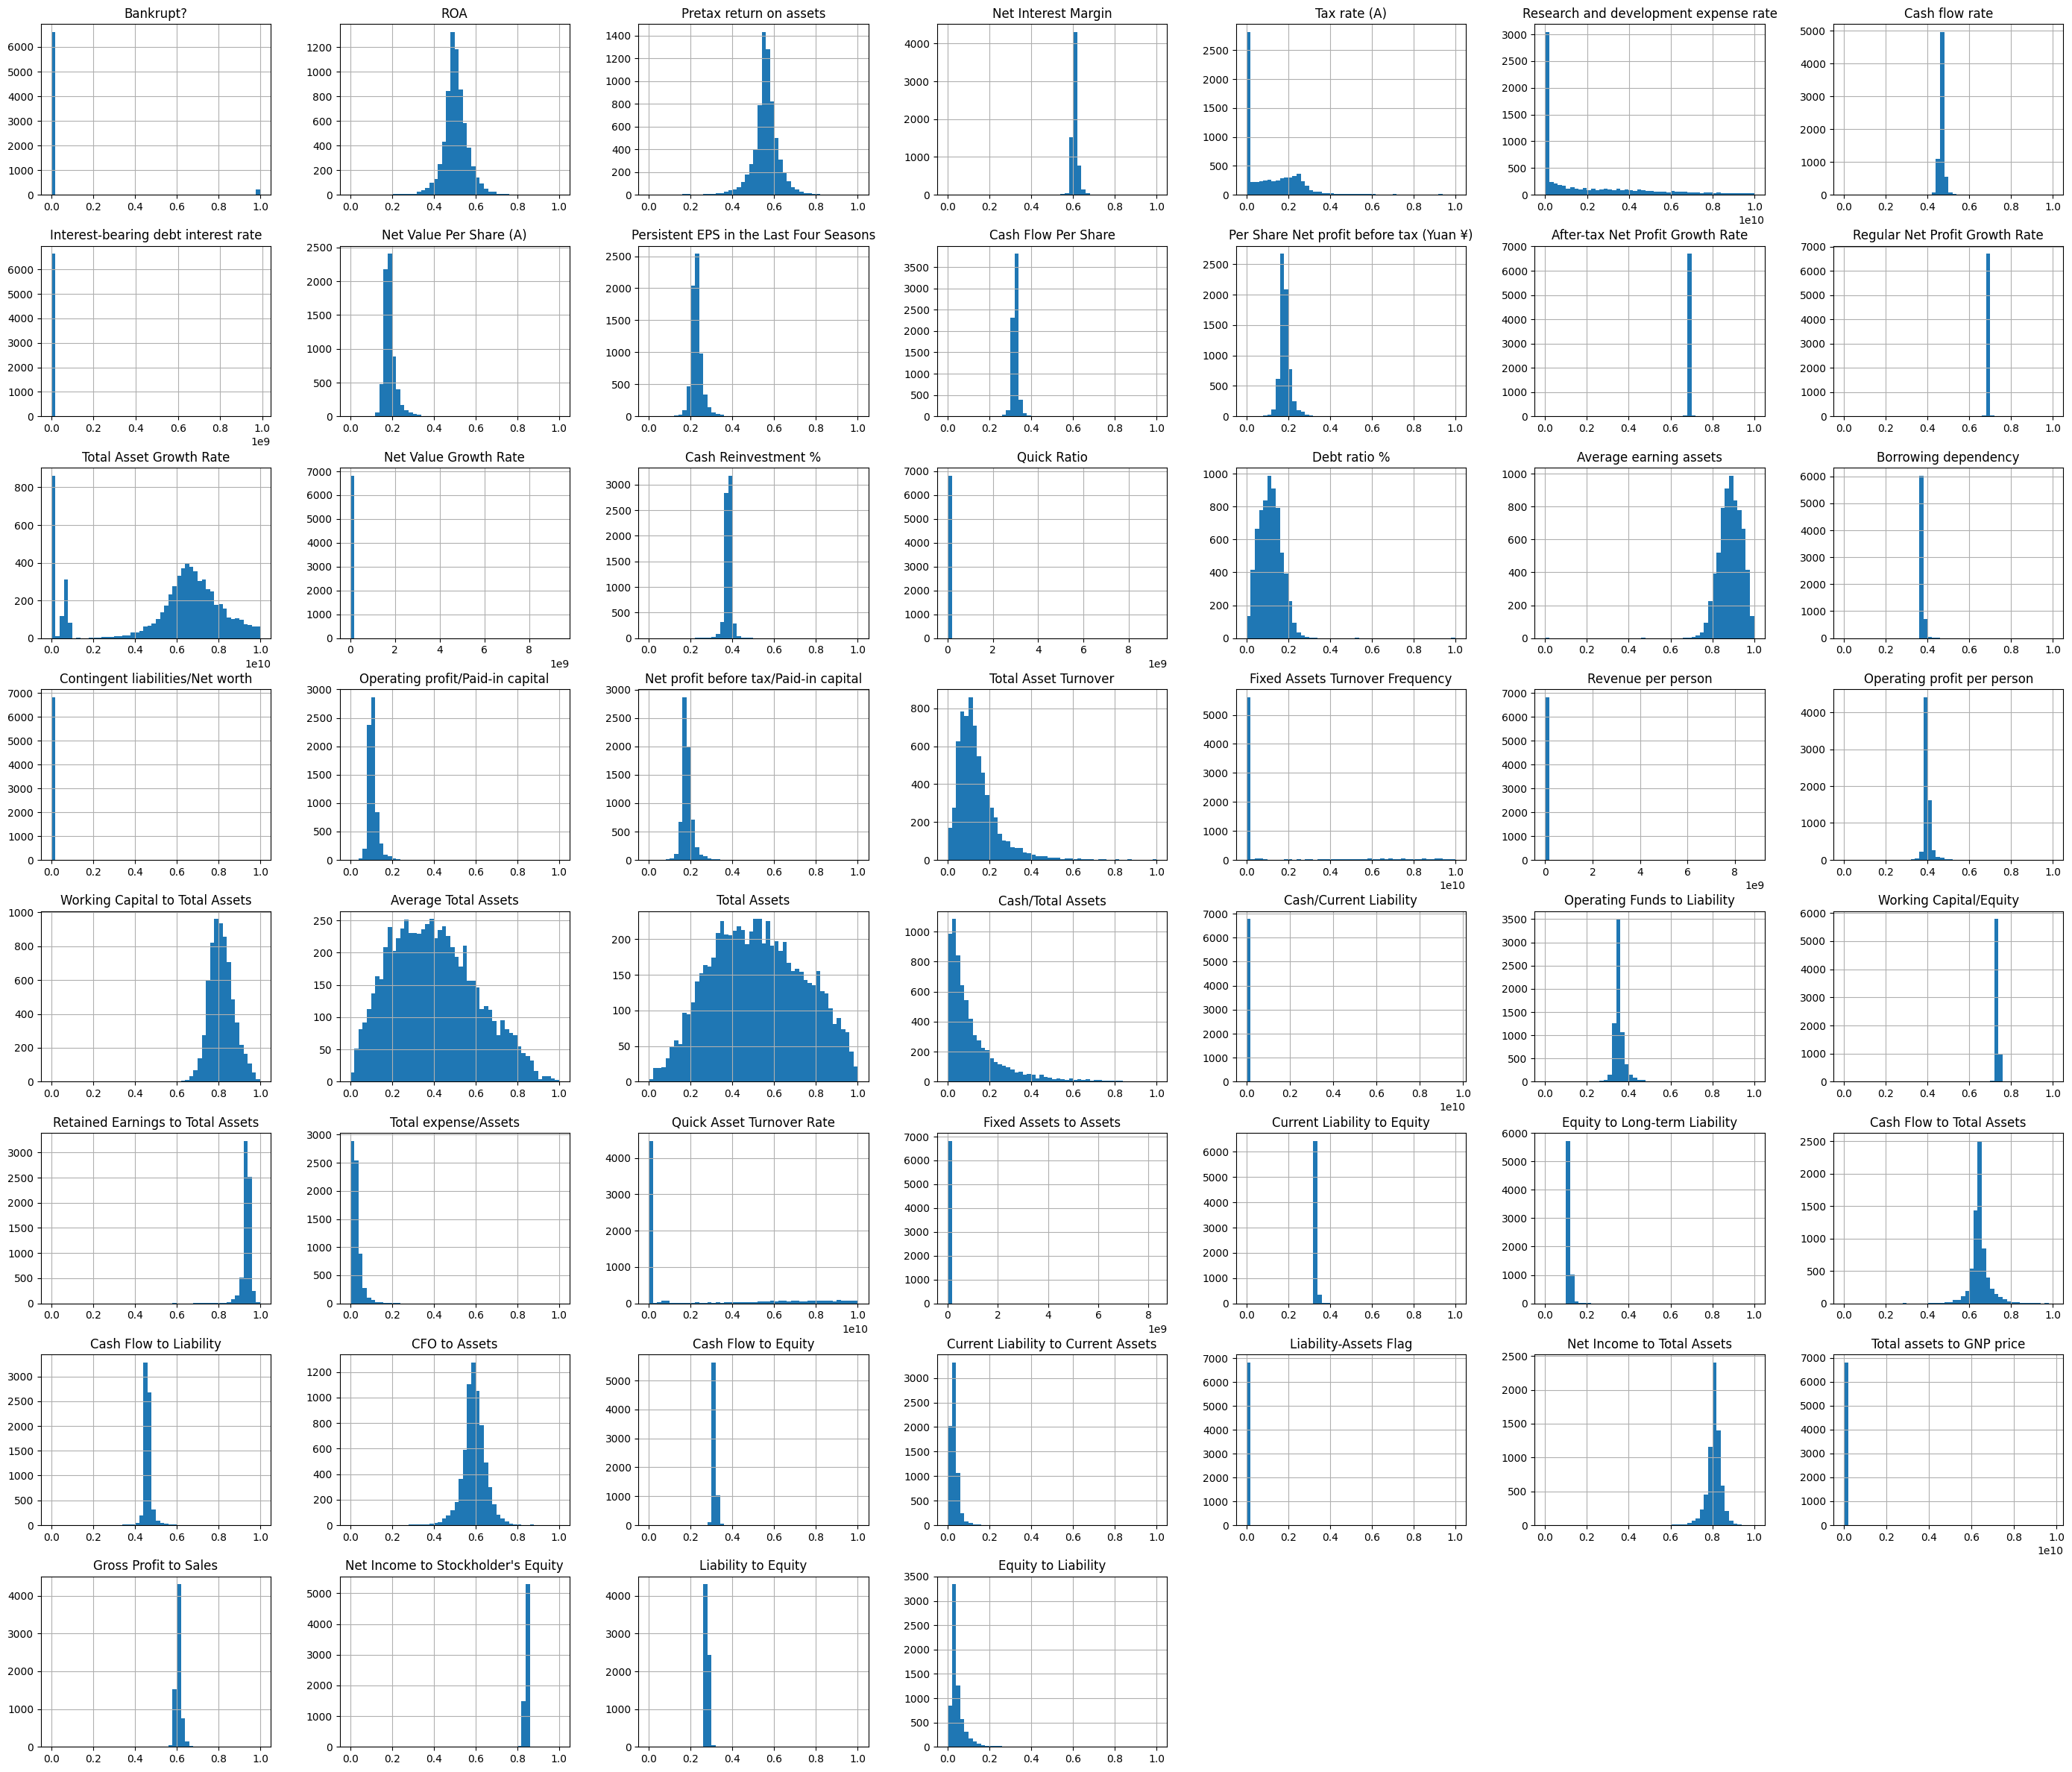

In [ ]:
# Looking at the histograms of numerical data

bank_data.hist(figsize = (35,30), bins = 50)
plt.show()


In [ ]:
from sklearn import preprocessing

In [ ]:
x = bank_data.values #returns a numpy array
print(x)

[[1.         0.37059426 0.42438945 ... 0.82789021 0.29020189 0.01646874]
 [1.         0.46429094 0.53821413 ... 0.83996927 0.28384598 0.02079431]
 [1.         0.42607127 0.49901875 ... 0.83677431 0.29018853 0.01647411]
 ...
 [0.         0.47272461 0.533744   ... 0.84013826 0.27578866 0.09764874]
 [0.         0.50626432 0.5599106  ... 0.84108361 0.27754718 0.04400945]
 [0.         0.49305319 0.57010467 ... 0.84101855 0.27511408 0.23390224]]


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_data = pd.DataFrame(x_scaled)

In [ ]:
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.0,0.370594,0.424389,0.601457,0.0,0.000000,0.458143,7.323970e-13,0.147950,0.169141,...,0.520382,0.312905,0.118250,0.0,0.716845,9.388432e-13,0.601453,0.827890,0.290202,0.016469
1,1.0,0.464291,0.538214,0.610235,0.0,0.000000,0.461867,6.536010e-13,0.182251,0.208944,...,0.567101,0.314163,0.047775,0.0,0.795297,8.475868e-13,0.610237,0.839969,0.283846,0.020794
2,1.0,0.426071,0.499019,0.601450,0.0,0.002555,0.458521,7.980596e-13,0.177911,0.180581,...,0.538491,0.314515,0.025346,0.0,0.774670,4.073610e-12,0.601449,0.836774,0.290189,0.016474
3,1.0,0.399844,0.451265,0.583541,0.0,0.000000,0.465705,4.535808e-13,0.154187,0.193722,...,0.604105,0.302382,0.067250,0.0,0.739555,3.312093e-13,0.583538,0.834697,0.281721,0.023982
4,1.0,0.465022,0.538432,0.598783,0.0,0.000000,0.462746,6.929990e-13,0.167502,0.212537,...,0.578469,0.311567,0.047725,0.0,0.795016,3.948638e-13,0.598782,0.839973,0.278514,0.035490


In [ ]:
correlation_matrix = normalized_data.corr().abs()

In [ ]:
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.000000,0.260807,0.282941,0.100043,0.109706,0.024232,0.072356,0.023063,0.165465,0.219560,...,0.115383,0.058563,0.171306,0.139212,0.315457,0.035104,0.100044,0.180987,0.166812,0.083048
1,0.260807,1.000000,0.940124,0.334719,0.250761,0.106461,0.323482,0.048882,0.505407,0.775006,...,0.504311,0.129002,0.160725,0.109272,0.887670,0.071725,0.334721,0.274287,0.143629,0.052416
2,0.282941,0.940124,1.000000,0.326969,0.225897,0.084334,0.288440,0.050362,0.531790,0.764828,...,0.443017,0.112929,0.195673,0.156890,0.961552,0.098900,0.326971,0.291744,0.141039,0.057887
3,0.100043,0.334719,0.326969,1.000000,0.067970,0.016976,0.341188,0.017198,0.145031,0.256722,...,0.226990,0.030672,0.132650,0.032930,0.300143,0.022672,1.000000,0.075304,0.085434,0.120029
4,0.109706,0.250761,0.225897,0.067970,1.000000,0.019201,0.049835,0.010080,0.130495,0.169345,...,0.103101,0.021563,0.053579,0.028425,0.231210,0.023643,0.067971,0.077920,0.030002,0.053148
5,0.024232,0.106461,0.084334,0.016976,0.019201,1.000000,0.030918,0.000656,0.087500,0.076486,...,0.073629,0.008972,0.065204,0.009960,0.079169,0.020166,0.016975,0.021490,0.035363,0.045244
6,0.072356,0.323482,0.288440,0.341188,0.049835,0.030918,1.000000,0.011986,0.158520,0.197705,...,0.603305,0.097761,0.126473,0.013501,0.281309,0.052766,0.341186,0.057933,0.080773,0.331710
7,0.023063,0.048882,0.050362,0.017198,0.010080,0.000656,0.011986,1.000000,0.050345,0.059506,...,0.011482,0.006995,0.000022,0.033571,0.048735,0.007519,0.017198,0.010950,0.003423,0.028945
8,0.165465,0.505407,0.531790,0.145031,0.130495,0.087500,0.158520,0.050345,1.000000,0.755409,...,0.230629,0.073000,0.165083,0.096506,0.493803,0.059780,0.145032,0.148872,0.111797,0.098721
9,0.219560,0.775006,0.764828,0.256722,0.169345,0.076486,0.197705,0.059506,0.755409,1.000000,...,0.333636,0.129661,0.154690,0.105522,0.691152,0.033509,0.256723,0.222961,0.114114,0.036722


In [ ]:
import seaborn as sn

<Axes: >

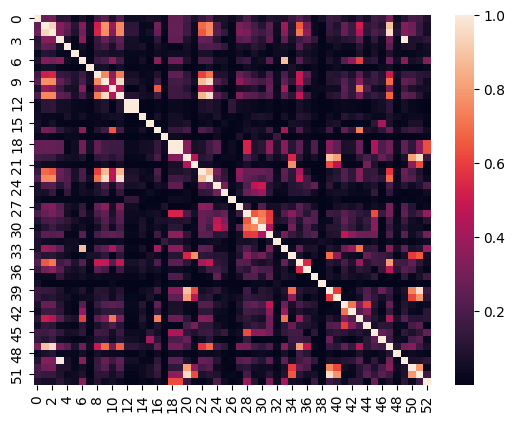

In [ ]:
sn.heatmap(data = correlation_matrix)

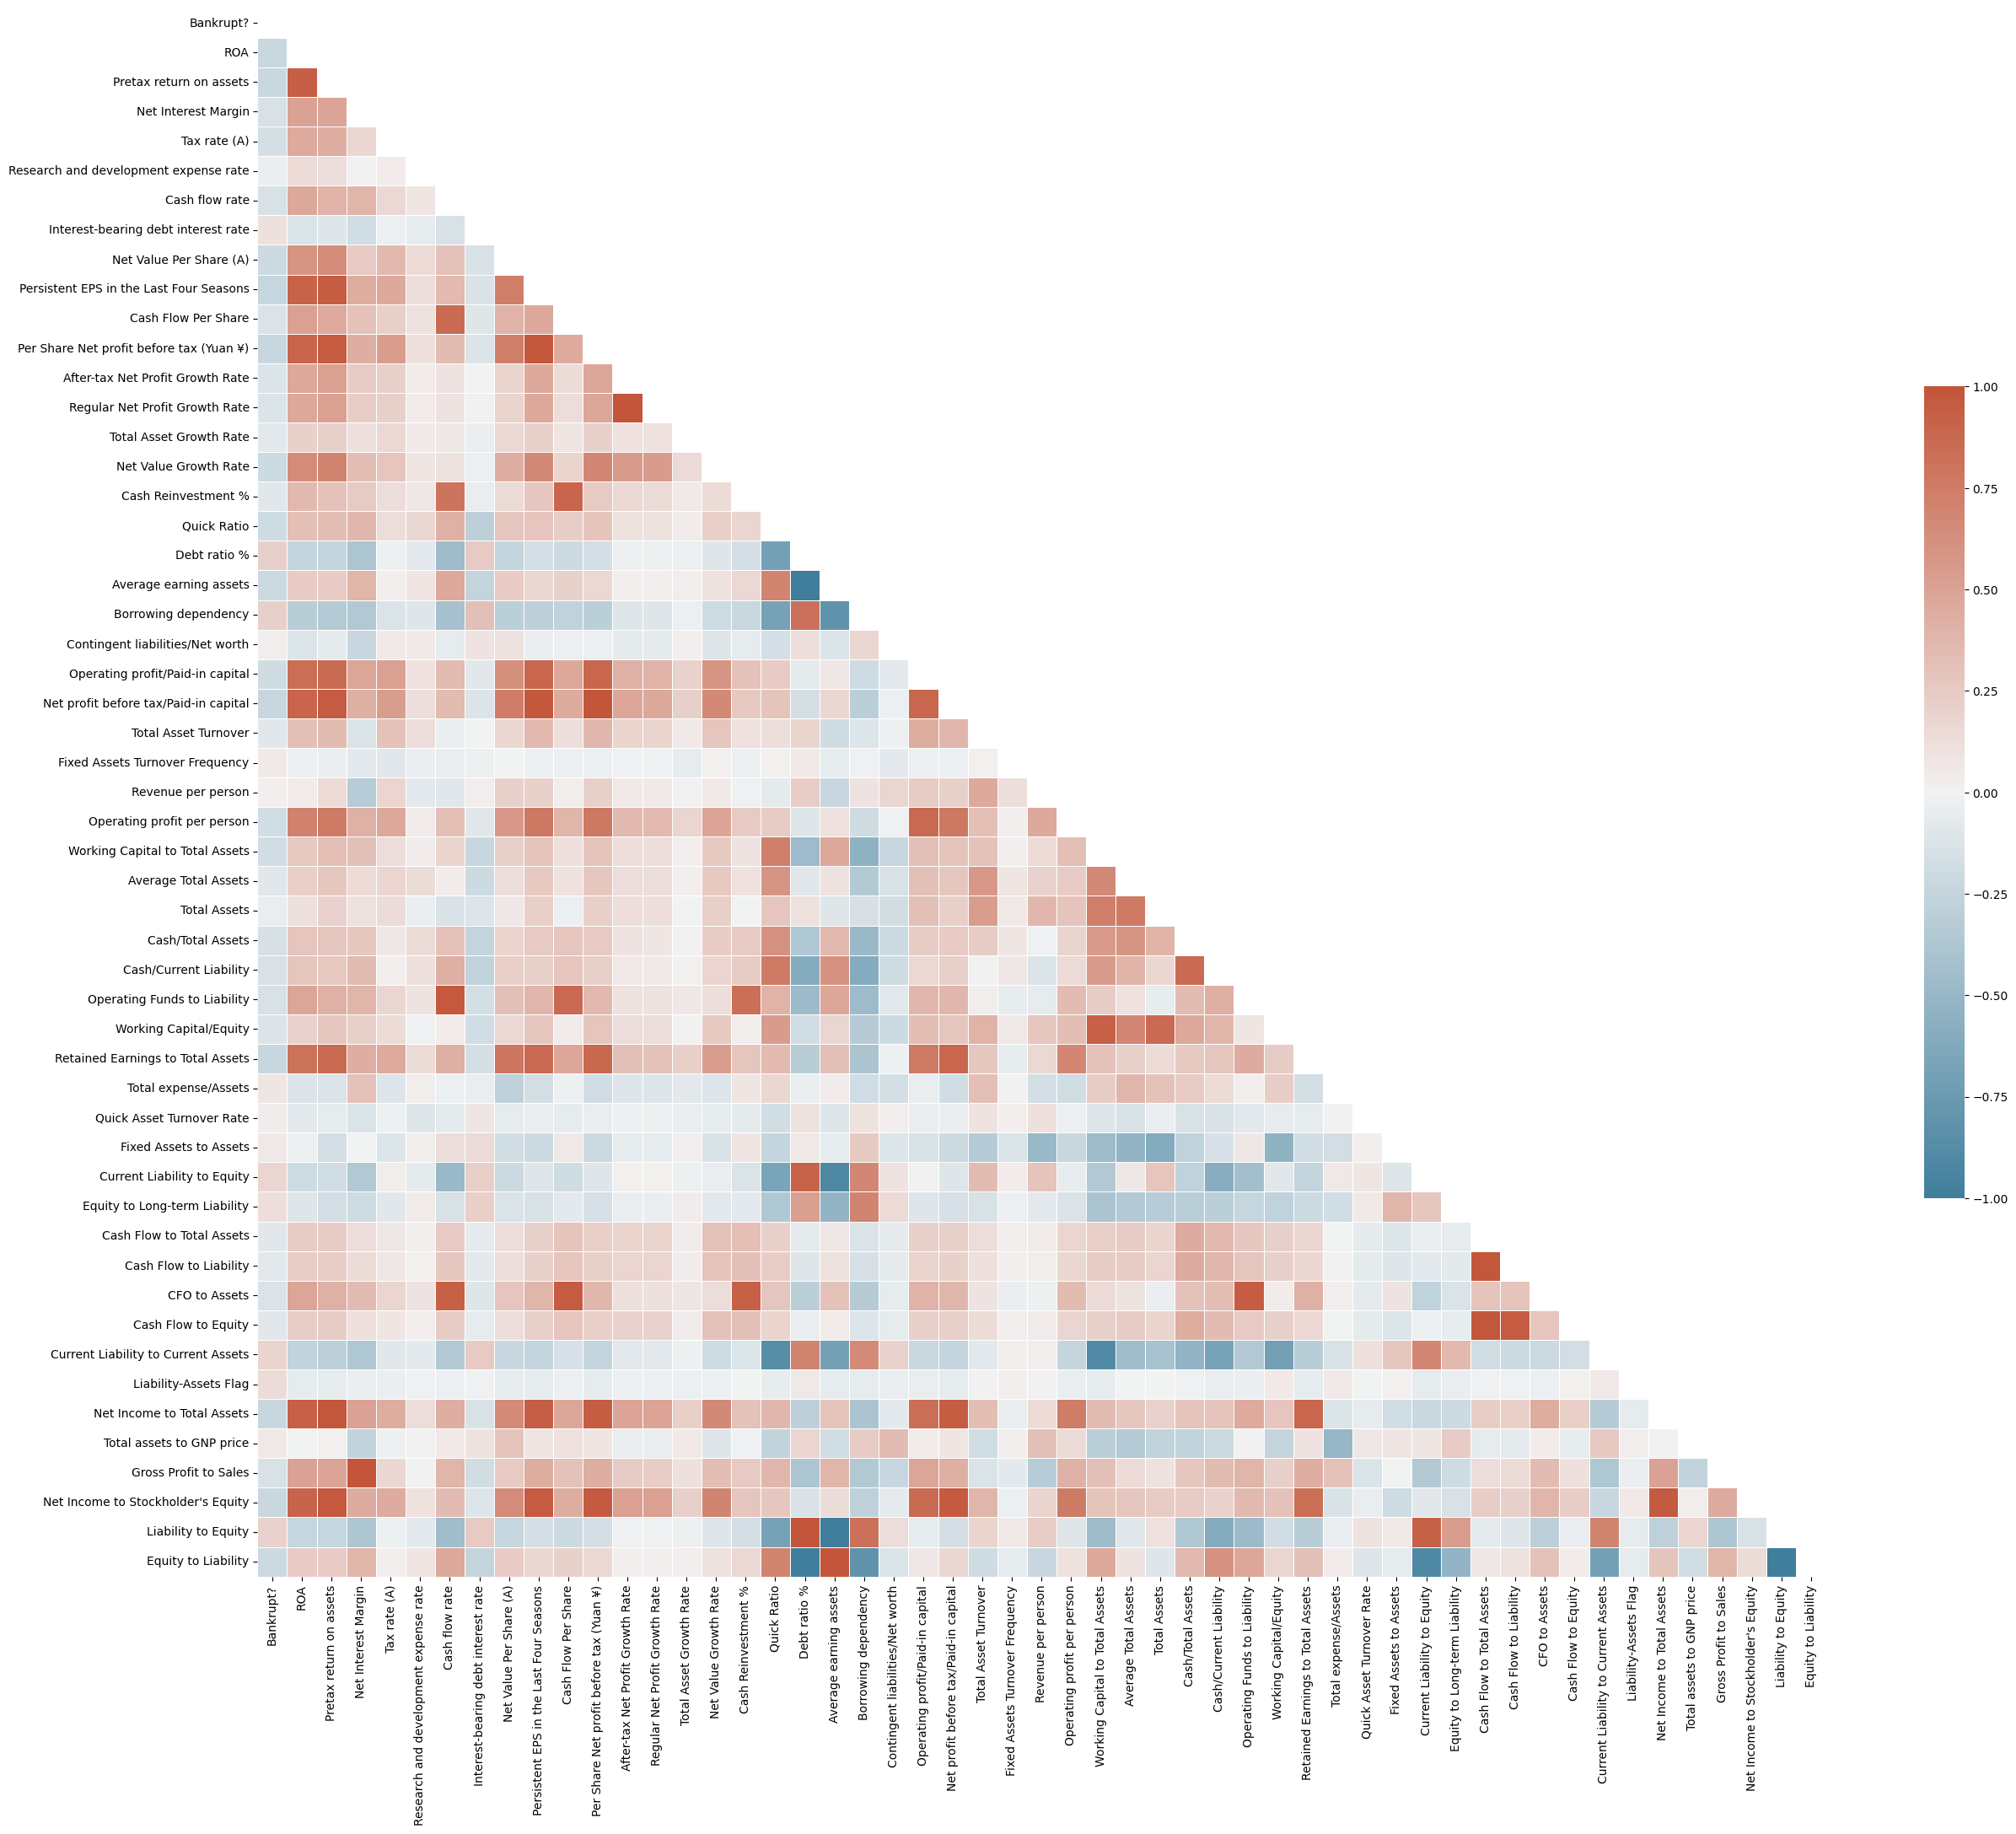

In [ ]:
f, ax = plt.subplots(figsize=(30, 25))
mat = bank_data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# identify highly correlated features
corr_matrix = bank_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
# drop the highly correlated features
bank_data = bank_data.drop(to_drop, axis=1)


In [ ]:
bank_data.head()

,Bankrupt?,ROA,Net Interest Margin,Tax rate (A),Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (A),Cash Flow Per Share,After-tax Net Profit Growth Rate,...,Cash/Current Liability,Total expense/Assets,Quick Asset Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Equity to Liability
0,1,0.370594,0.601457,0.0,0.0,0.458143,0.000725,0.147950,0.311664,0.688979,...,1.473360e-04,0.064856,6.550000e+09,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.016469
1,1,0.464291,0.610235,0.0,0.0,0.461867,0.000647,0.182251,0.318137,0.689693,...,1.383910e-03,0.025516,7.700000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.020794
2,1,0.426071,0.601450,0.0,25500000.0,0.458521,0.000790,0.177911,0.307102,0.689463,...,5.340000e+09,0.021387,1.022676e-03,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.016474
3,1,0.399844,0.583541,0.0,0.0,0.465705,0.000449,0.154187,0.321674,0.689110,...,1.010646e-03,0.024161,6.050000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.023982
4,1,0.465022,0.598783,0.0,0.0,0.462746,0.000686,0.167502,0.319162,0.689697,...,6.804640e-04,0.026385,5.050000e+09,0.309555,0.622374,0.311567,0.047725,0,0.003878,0.035490


In [ ]:
df = bank_data
df.head()
df.to_csv('out.csv')

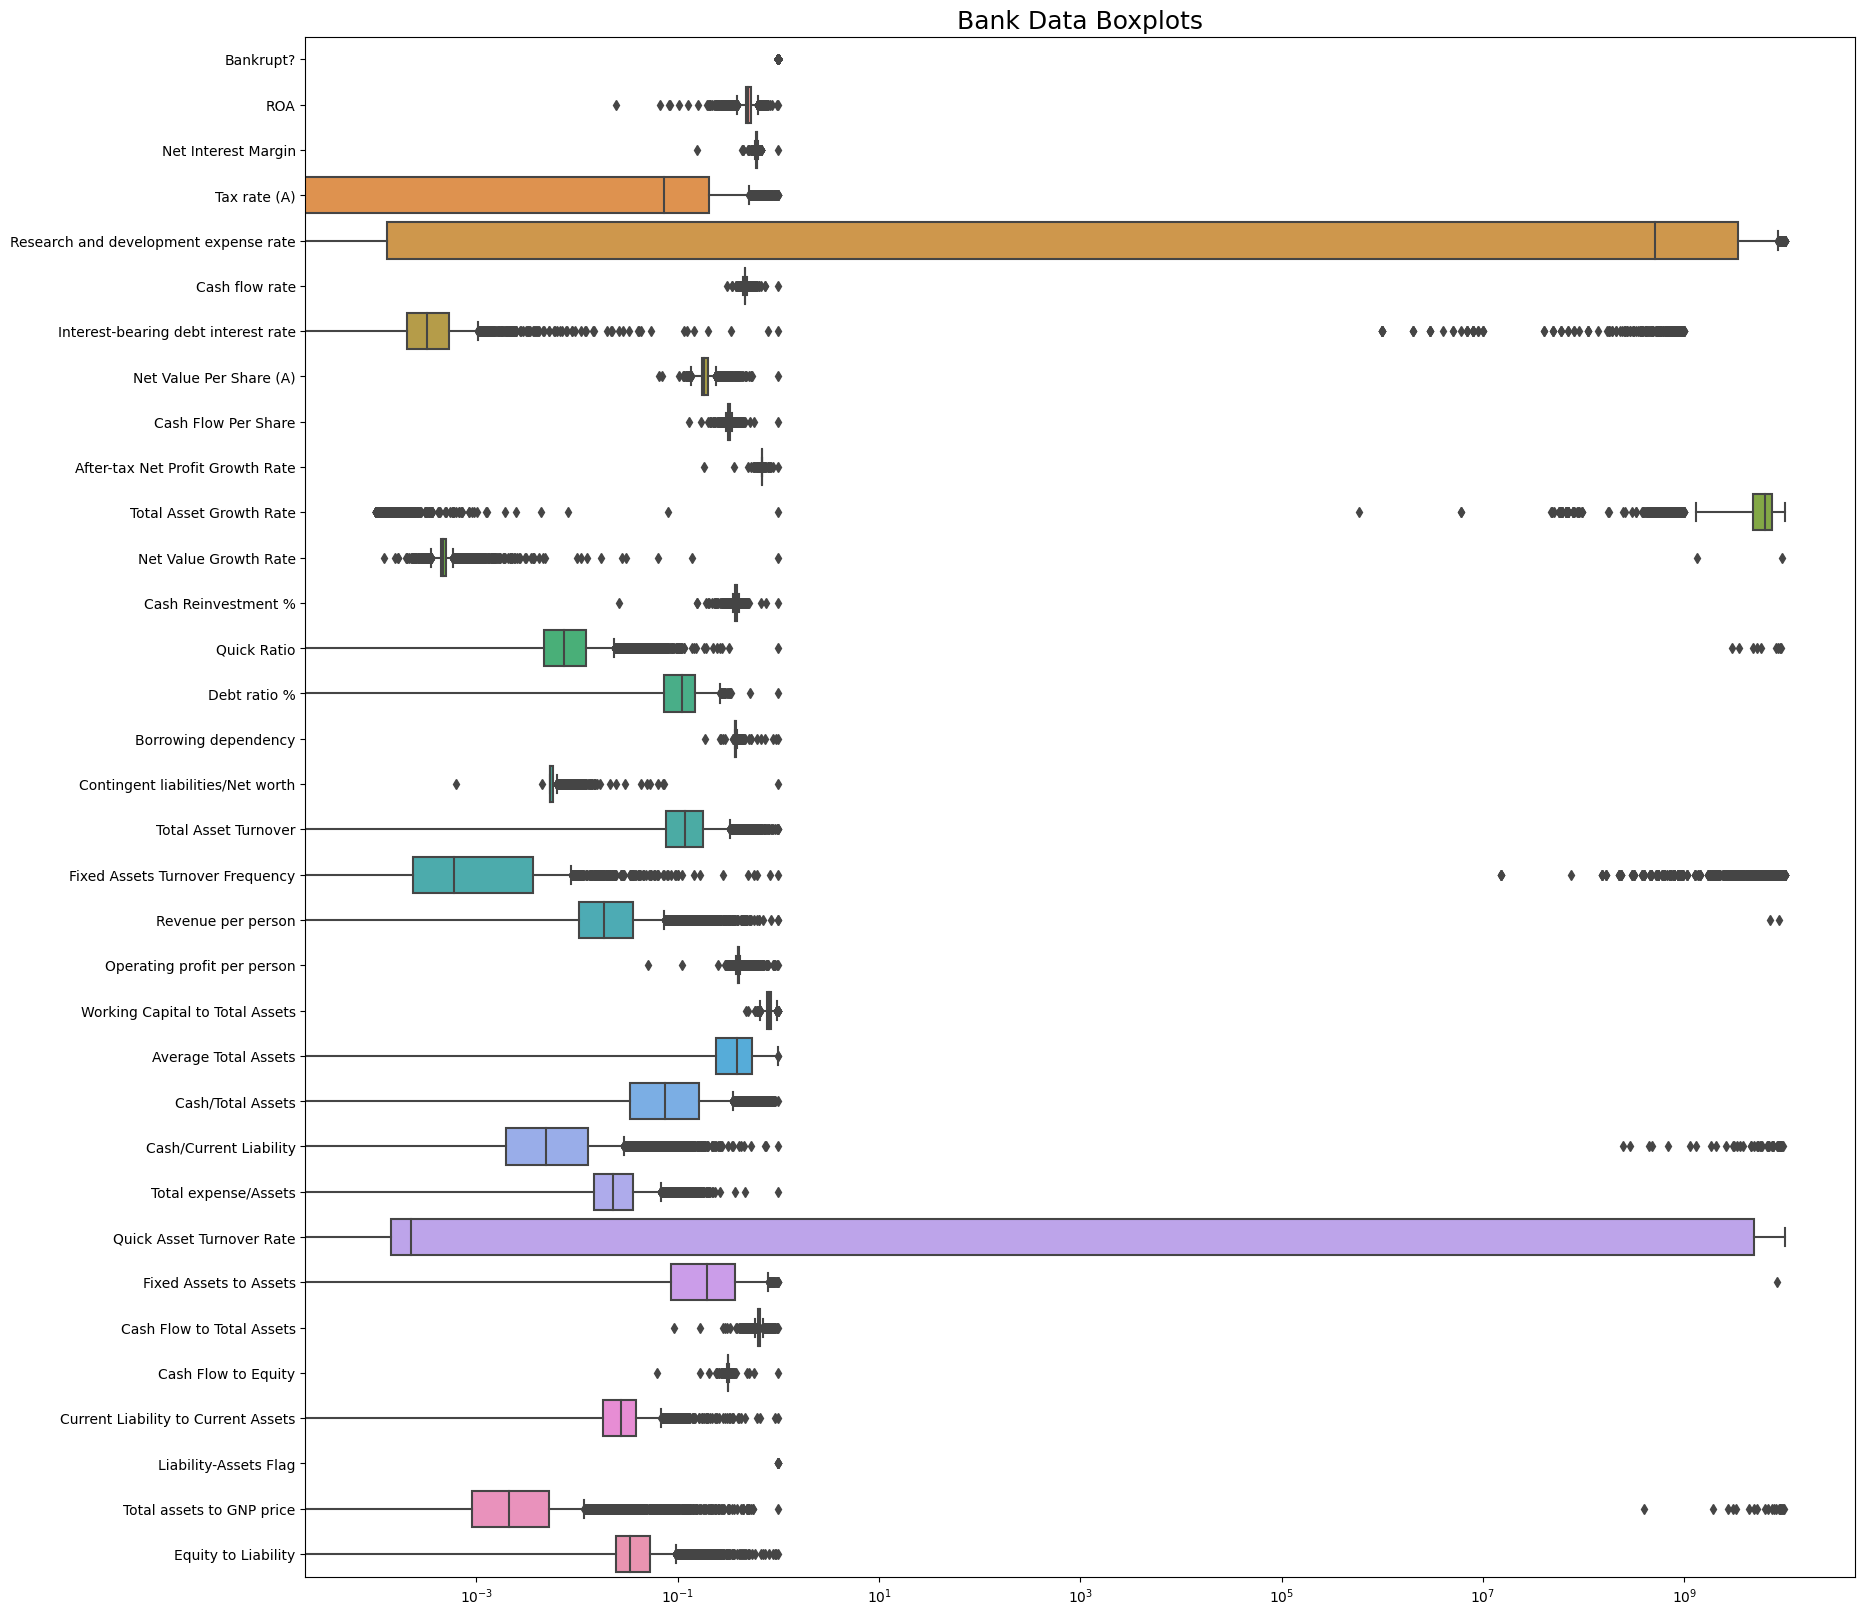

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = bank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

[Text(0.5, 1.0, 'Equity to Liability')]

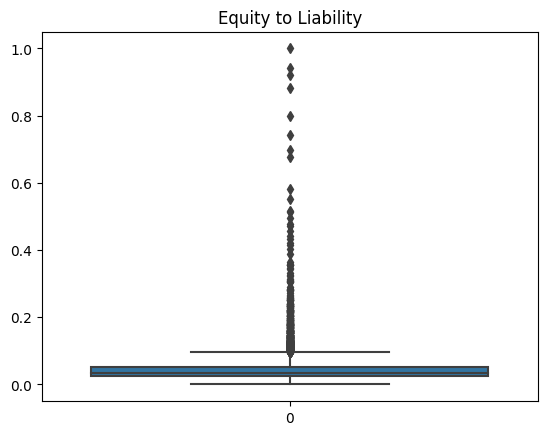

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Equity to Liability']).set(title='Equity to Liability')

[Text(0.5, 1.0, 'Total assets to GNP price')]

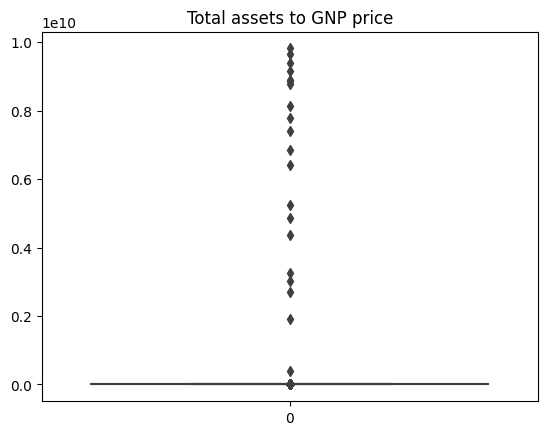

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Total assets to GNP price']).set(title='Total assets to GNP price')

[Text(0.5, 1.0, 'Liability-Assets Flag')]

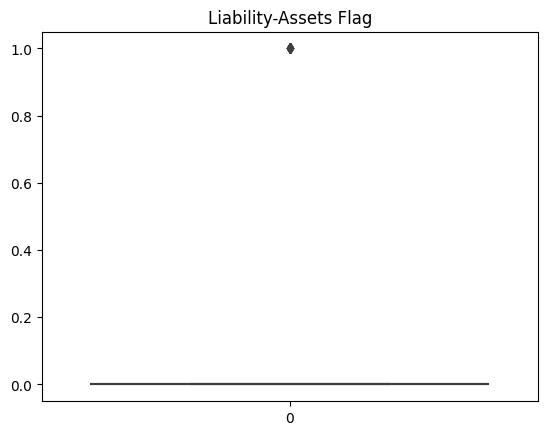

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Liability-Assets Flag']).set(title='Liability-Assets Flag')

[Text(0.5, 1.0, 'Current Liability to Current Assets')]

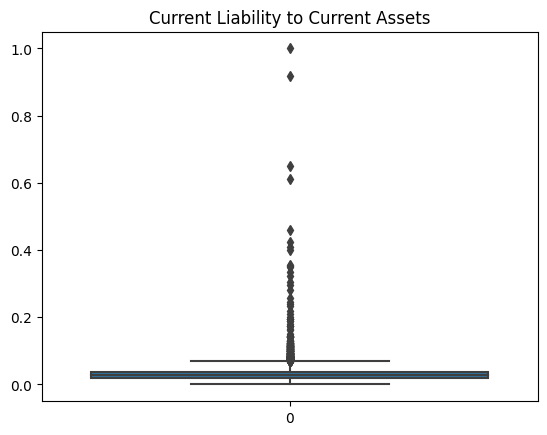

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Current Liability to Current Assets']).set(title='Current Liability to Current Assets')

[Text(0.5, 1.0, 'Cash Flow to Equity')]

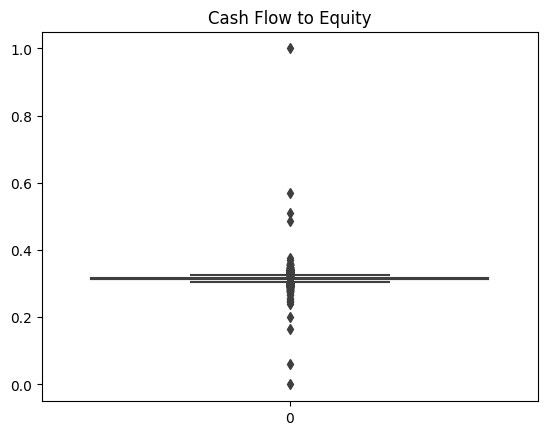

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Cash Flow to Equity']).set(title='Cash Flow to Equity')

[Text(0.5, 1.0, 'Cash Flow to Total Assets')]

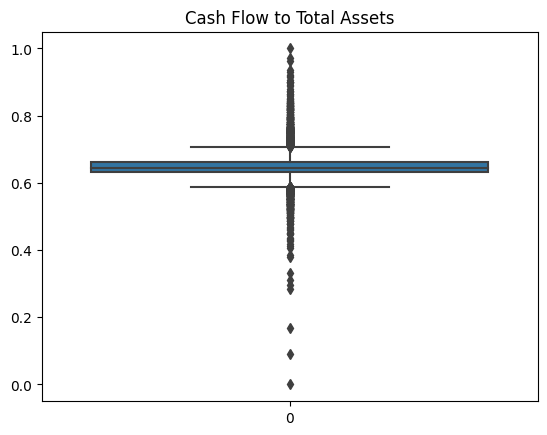

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Cash Flow to Total Assets']).set(title='Cash Flow to Total Assets')

[Text(0.5, 1.0, 'Fixed Assets to Assets')]

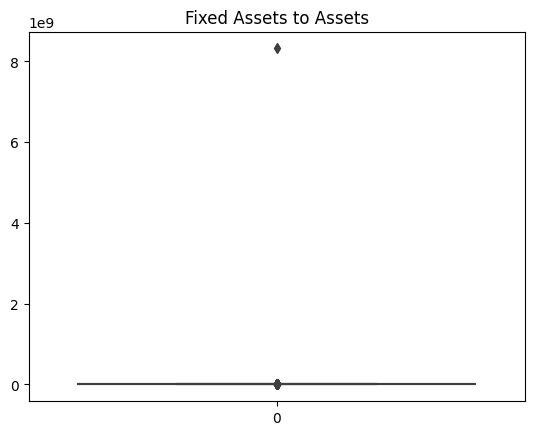

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Fixed Assets to Assets']).set(title='Fixed Assets to Assets')

[Text(0.5, 1.0, 'Quick Asset Turnover Rate')]

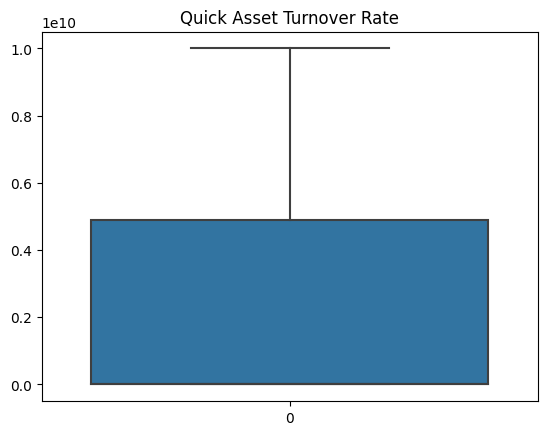

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Quick Asset Turnover Rate']).set(title='Quick Asset Turnover Rate')

[Text(0.5, 1.0, 'Total expense/Assets')]

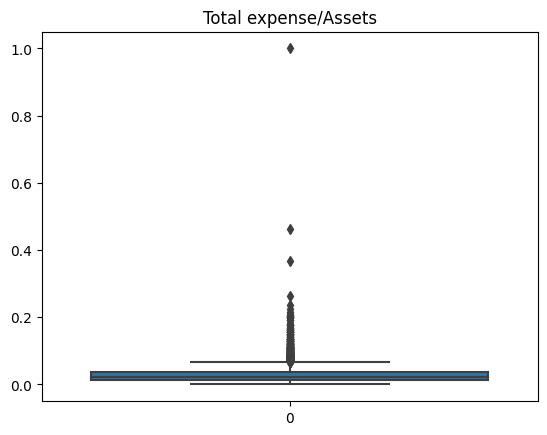

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Total expense/Assets']).set(title='Total expense/Assets')

[Text(0.5, 1.0, 'Cash/Current Liability')]

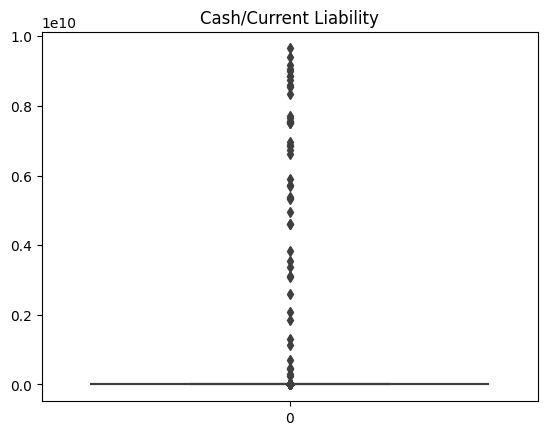

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Cash/Current Liability']).set(title='Cash/Current Liability')

[Text(0.5, 1.0, 'Cash/Total Assets')]

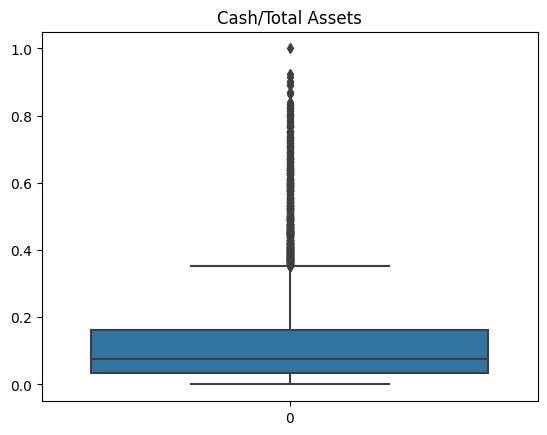

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Cash/Total Assets']).set(title='Cash/Total Assets')

[Text(0.5, 1.0, 'Average Total Assets')]

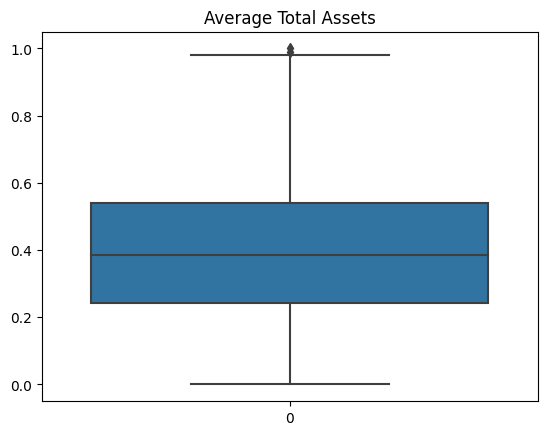

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Average Total Assets']).set(title='Average Total Assets')

[Text(0.5, 1.0, 'Working Capital to Total Assets')]

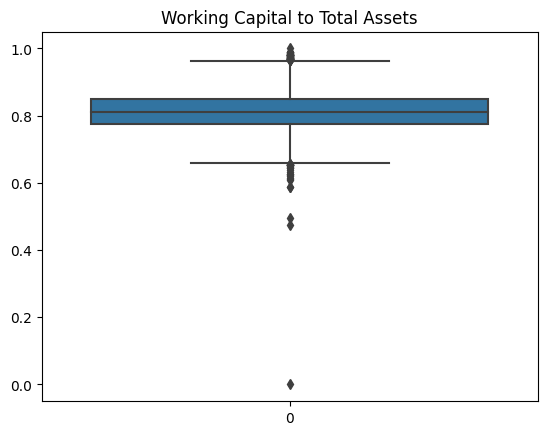

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Working Capital to Total Assets']).set(title='Working Capital to Total Assets')

[Text(0.5, 1.0, 'Operating profit per person')]

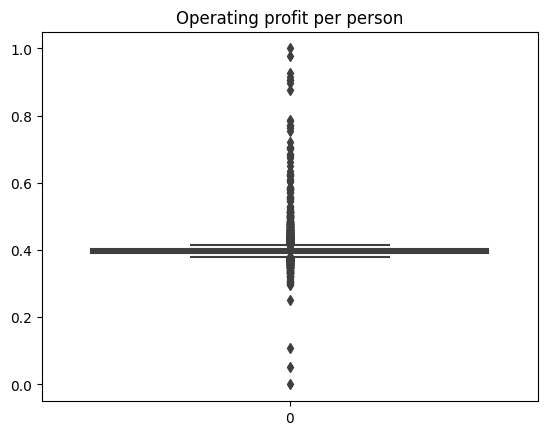

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Operating profit per person']).set(title='Operating profit per person')

[Text(0.5, 1.0, 'Revenue per person')]

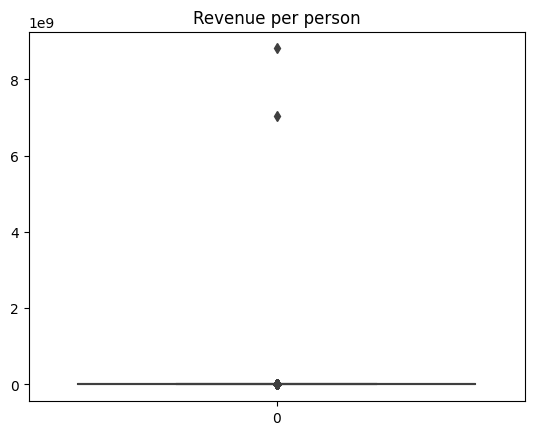

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Revenue per person']).set(title='Revenue per person')

[Text(0.5, 1.0, 'Fixed Assets Turnover Frequency')]

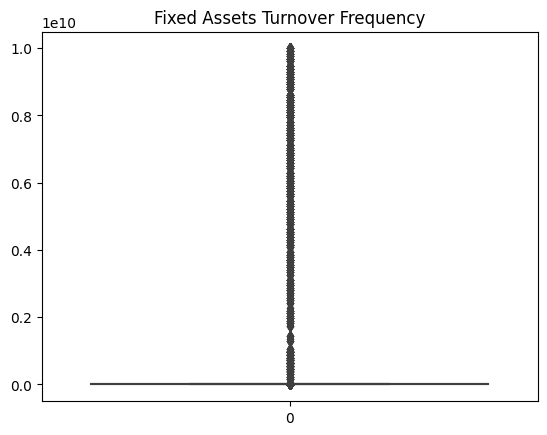

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Fixed Assets Turnover Frequency']).set(title='Fixed Assets Turnover Frequency')

[Text(0.5, 1.0, 'Total Asset Turnover')]

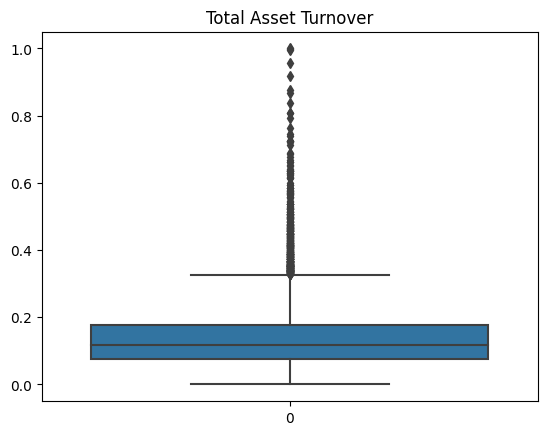

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Total Asset Turnover']).set(title='Total Asset Turnover')

[Text(0.5, 1.0, 'Contingent liabilities/Net worth')]

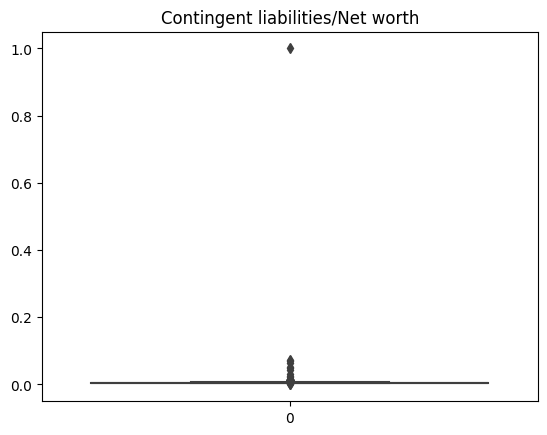

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Contingent liabilities/Net worth']).set(title='Contingent liabilities/Net worth')

[Text(0.5, 1.0, 'Borrowing dependency')]

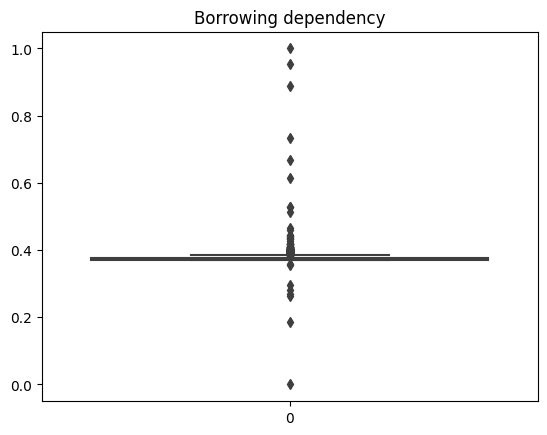

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Borrowing dependency']).set(title='Borrowing dependency')

[Text(0.5, 1.0, 'Debt ratio %')]

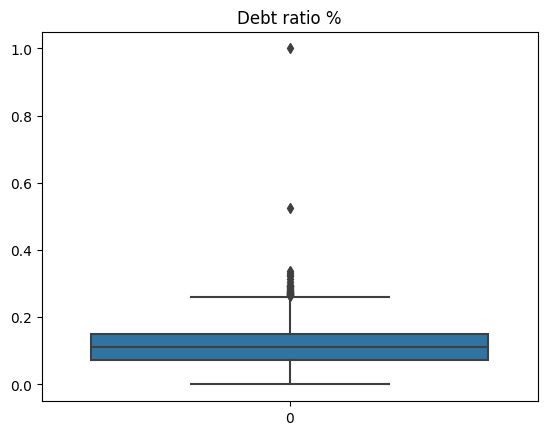

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Debt ratio %']).set(title='Debt ratio %')

[Text(0.5, 1.0, 'Quick Ratio')]

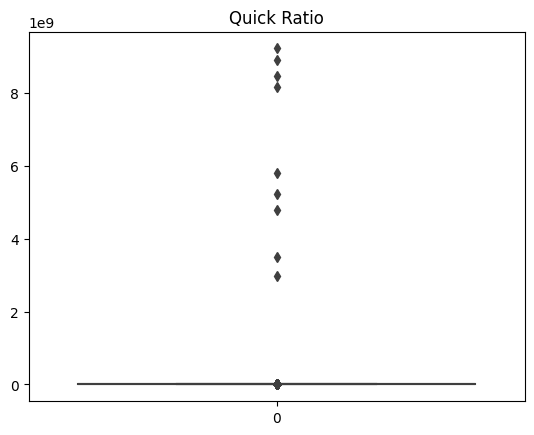

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Quick Ratio']).set(title='Quick Ratio')

[Text(0.5, 1.0, 'Tax Rate')]

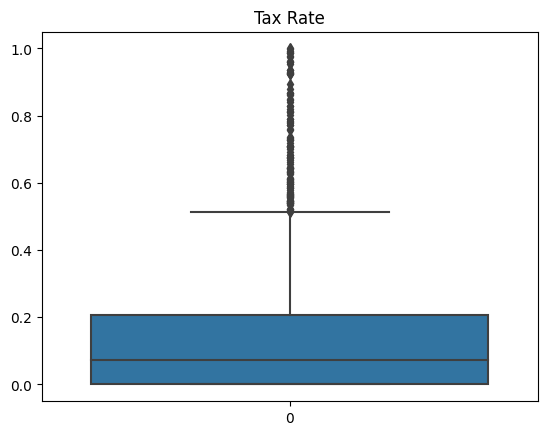

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Tax rate (A)']).set(title='Tax Rate')

[Text(0.5, 1.0, 'Research and Developement')]

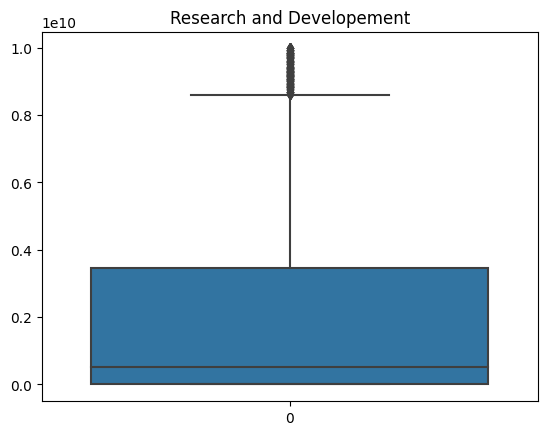

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Research and development expense rate']).set(title='Research and Developement')

[Text(0.5, 1.0, 'Interest-bearing debt interest rate')]

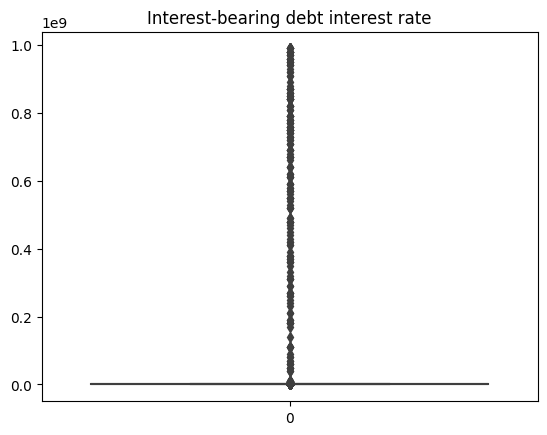

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['Interest-bearing debt interest rate']).set(title='Interest-bearing debt interest rate')

[Text(0.5, 1.0, 'ROA')]

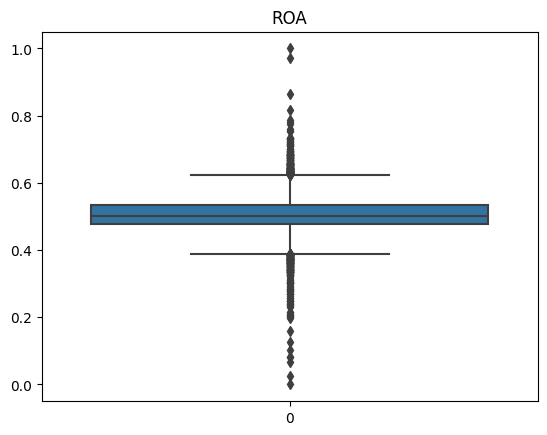

In [ ]:
import seaborn as sns
sns.boxplot(bank_data['ROA']).set(title='ROA')

[Text(0.5, 1.0, 'Cash Flow rate')]

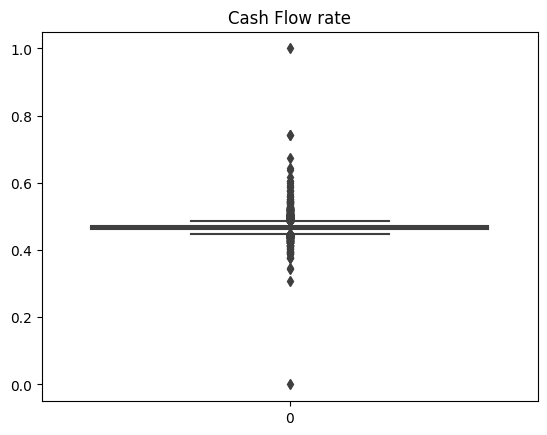

In [ ]:
sns.boxplot(bank_data['Cash flow rate']).set(title='Cash Flow rate')

[Text(0.5, 1.0, 'Net Value Per Share (A)')]

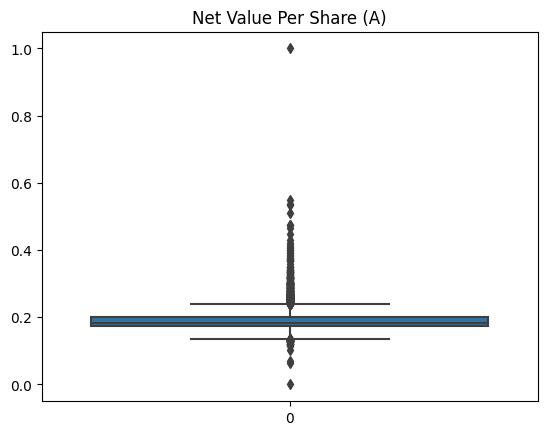

In [ ]:
sns.boxplot(bank_data['Net Value Per Share (A)']).set(title='Net Value Per Share (A)')

[Text(0.5, 1.0, 'Cash Flow per share')]

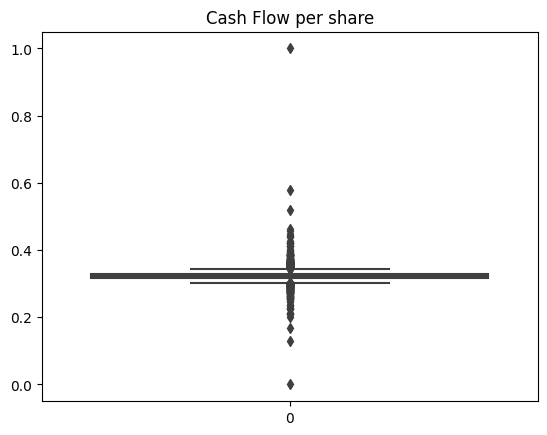

In [ ]:
sns.boxplot(bank_data['Cash Flow Per Share']).set(title='Cash Flow per share')

[Text(0.5, 1.0, 'After-tax Net Profit Growth Rate')]

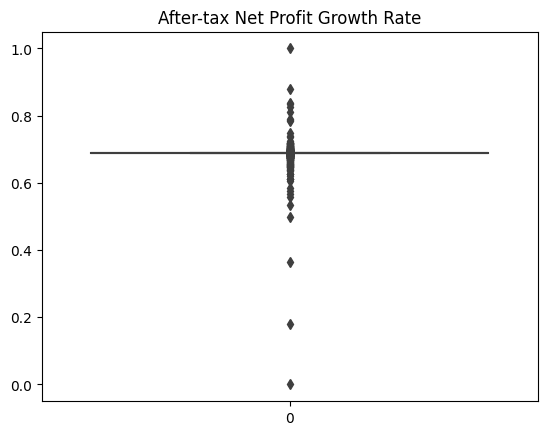

In [ ]:
sns.boxplot(bank_data['After-tax Net Profit Growth Rate']).set(title='After-tax Net Profit Growth Rate')

[Text(0.5, 1.0, 'Total Asset Growth Rate')]

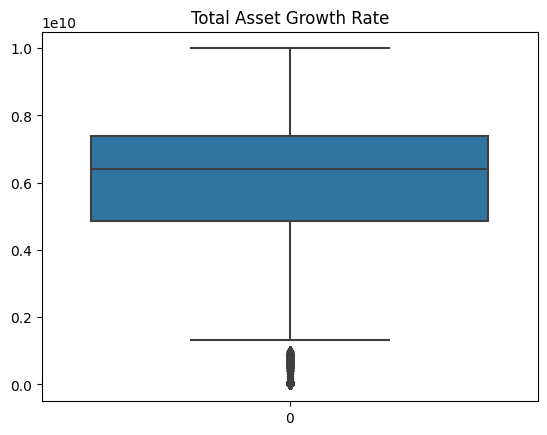

In [ ]:
sns.boxplot(bank_data['Total Asset Growth Rate']).set(title='Total Asset Growth Rate')

[Text(0.5, 1.0, 'Net Value Growth Rate')]

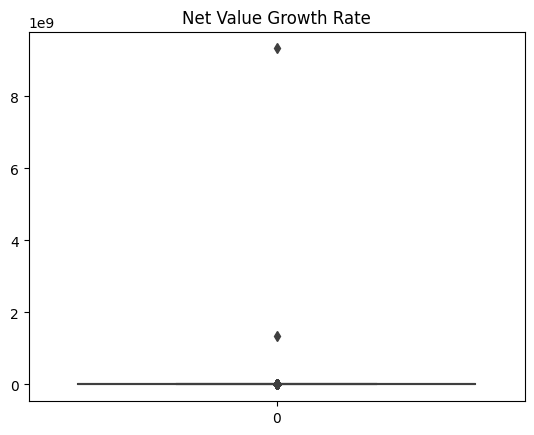

In [ ]:
sns.boxplot(bank_data['Net Value Growth Rate']).set(title='Net Value Growth Rate')

[Text(0.5, 1.0, 'Cash Reinvestment %')]

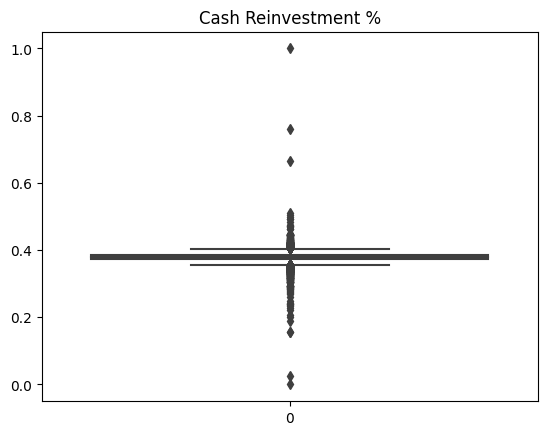

In [ ]:
sns.boxplot(bank_data['Cash Reinvestment %']).set(title='Cash Reinvestment %')

[Text(0.5, 1.0, 'Net Interest Margin')]

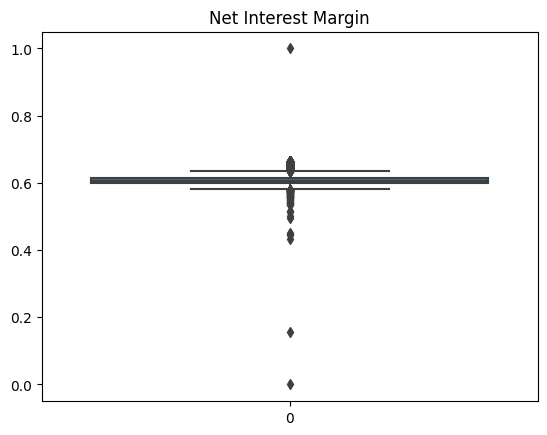

In [ ]:
sns.boxplot(bank_data['Net Interest Margin']).set(title='Net Interest Margin')

In [ ]:
# Removing the outliers
set_l = {}
def remove_outliers(df, col_name):
    l = []
    q3 = np.quantile(df[col_name], 0.75)
    q1 = np.quantile(df[col_name], 0.25)
    iqr = q3 - q1
    print(f"IQR value for column {col_name} is: {iqr:.4f}")

    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr

    print(f"{lower_range:.4f}, {upper_range:.4f}\n")

    outlier_free_list = [data_point for data_point in df[col_name]
                                if ((data_point > lower_range) & (data_point <= upper_range))
                        ]
    filtered_data = df.loc[df[col_name].isin(outlier_free_list)]
    print(len(filtered_data))

    for index, data_point in enumerate(df[col_name]):
        if data_point not in outlier_free_list:
            l.append(index)
    set_l = set(l)
    print(set(l))
    print(len(l))

for i in bank_data.columns[1:2]:
  remove_outliers(bank_data, i)

IQR value for column ROA is: 0.0590
0.3880, 0.6241

6428
{0, 4114, 4132, 2088, 2099, 56, 4166, 2123, 6221, 4185, 4191, 6241, 2147, 4201, 119, 4217, 2173, 4223, 6280, 4240, 2198, 4256, 4272, 2242, 4294, 4295, 6346, 4311, 4314, 2271, 4320, 4327, 232, 235, 2290, 2293, 2295, 4366, 4367, 6420, 6421, 4376, 6425, 2339, 4387, 6437, 6442, 305, 4402, 6454, 4415, 2369, 6467, 4422, 6473, 2392, 6491, 6492, 4446, 6498, 6499, 6513, 4466, 6514, 6517, 4472, 4480, 4481, 4482, 2435, 2441, 4492, 6553, 6558, 6561, 6565, 2474, 427, 4530, 4532, 4533, 6585, 448, 2497, 6599, 2506, 6604, 2509, 6610, 4564, 6613, 2518, 4571, 6633, 6640, 6641, 6642, 2553, 4618, 2572, 2573, 4621, 4626, 4636, 4639, 4641, 4642, 2597, 6700, 4657, 2610, 4658, 4669, 2630, 4680, 2635, 2640, 595, 599, 6751, 6756, 4717, 4721, 6769, 4725, 4726, 4731, 6781, 4734, 4736, 6789, 2694, 6795, 664, 4763, 4766, 4777, 4786, 2742, 4795, 712, 2770, 4824, 750, 4849, 4853, 759, 2809, 4858, 4869, 4870, 781, 4877, 4882, 4908, 2868, 4918, 2878, 838, 4955, 4

In [ ]:
# Removing the outliers
set_l = {}
def remove_outliers(df, col_name):
    l = []
    q3 = np.quantile(df[col_name], 0.75)
    q1 = np.quantile(df[col_name], 0.25)
    iqr = q3 - q1
    print(f"IQR value for column {col_name} is: {iqr:.4f}")

    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr

    print(f"{lower_range:.4f}, {upper_range:.4f}\n")

    outlier_free_list = [data_point for data_point in df[col_name]
                                if ((data_point > lower_range) & (data_point <= upper_range))
                        ]
    filtered_data = df.loc[df[col_name].isin(outlier_free_list)]
    print(len(filtered_data))

    for index, data_point in enumerate(df[col_name]):
        if data_point not in outlier_free_list:
            l.append(index)
    set_l = set(l)
    print(set(l))
    print(len(l))

for i in bank_data.columns[21:22]:
  remove_outliers(bank_data, i)

# Removing the outliers
set_l1 = {}
def remove_outliers1(df, col_name):
    l1 = []
    q3 = np.quantile(df[col_name], 0.75)
    q1 = np.quantile(df[col_name], 0.25)
    iqr = q3 - q1
    print(f"IQR value for column {col_name} is: {iqr:.4f}")

    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr

    print(f"{lower_range:.4f}, {upper_range:.4f}\n")

    outlier_free_list = [data_point for data_point in df[col_name]
                                if ((data_point > lower_range) & (data_point <= upper_range))
                        ]
    filtered_data = df.loc[df[col_name].isin(outlier_free_list)]
    print(len(filtered_data))

    for index, data_point in enumerate(df[col_name]):
        if data_point not in outlier_free_list:
            l1.append(index)
    set_l1 = set(l1)
    print(set_l1)
    print(len(l1))

for i in bank_data.columns[22:23]:
  remove_outliers1(bank_data, i)


IQR value for column Working Capital to Total Assets is: 0.0761
0.6602, 0.9645

6744
{1026, 3842, 3974, 3079, 2440, 3722, 3850, 3978, 4618, 3985, 1557, 6422, 2200, 3865, 1435, 3487, 3365, 2470, 2855, 3495, 3881, 4008, 4777, 4908, 2605, 2734, 2735, 5033, 5298, 3254, 2871, 3510, 5302, 4541, 3646, 4669, 2370, 3908, 1093, 3653, 1865, 3530, 3831, 3404, 3661, 3790, 6608, 2001, 6611, 2004, 3669, 6229, 6613, 4824, 6362, 2523, 4571, 3550, 3680, 5219, 3812, 1381, 3173, 3820, 2669, 4717, 2927, 3824, 2418, 2802, 3827, 1526, 3830, 1659, 2943}
75
IQR value for column Average Total Assets is: 0.2986
-0.2060, 0.9885

6817
{2858, 6422}
2


In [ ]:
a = {0, 4114, 4132, 2088, 2099, 56, 4166, 2123, 6221, 4185, 4191, 6241, 2147, 4201, 119, 4217, 2173, 4223, 6280, 4240, 2198, 4256, 4272, 2242, 4294, 4295, 6346, 4311, 4314, 2271, 4320, 4327, 232, 235, 2290, 2293, 2295, 4366, 4367, 6420, 6421, 4376, 6425, 2339, 4387, 6437, 6442, 305, 4402, 6454, 4415, 2369, 6467, 4422, 6473, 2392, 6491, 6492, 4446, 6498, 6499, 6513, 4466, 6514, 6517, 4472, 4480, 4481, 4482, 2435, 2441, 4492, 6553, 6558, 6561, 6565, 2474, 427, 4530, 4532, 4533, 6585, 448, 2497, 6599, 2506, 6604, 2509, 6610, 4564, 6613, 2518, 4571, 6633, 6640, 6641, 6642, 2553, 4618, 2572, 2573, 4621, 4626, 4636, 4639, 4641, 4642, 2597, 6700, 4657, 2610, 4658, 4669, 2630, 4680, 2635, 2640, 595, 599, 6751, 6756, 4717, 4721, 6769, 4725, 4726, 4731, 6781, 4734, 4736, 6789, 2694, 6795, 664, 4763, 4766, 4777, 4786, 2742, 4795, 712, 2770, 4824, 750, 4849, 4853, 759, 2809, 4858, 4869, 4870, 781, 4877, 4882, 4908, 2868, 4918, 2878, 838, 4955, 4958, 865, 4961, 2930, 4990, 5010, 2965, 5017, 5019, 5033, 957, 5060, 3020, 5069, 5070, 5096, 3055, 5103, 5109, 5110, 5115, 3074, 3076, 1035, 3083, 3087, 1052, 3112, 5163, 3122, 3138, 1103, 5199, 5201, 3166, 3171, 3176, 3178, 1134, 3185, 3206, 3207, 3222, 3223, 3224, 1179, 1190, 3239, 3244, 3245, 3259, 3264, 5319, 3273, 3285, 3303, 3327, 5381, 3334, 3337, 5393, 5402, 3363, 3365, 3370, 5418, 3374, 3377, 3381, 3384, 3385, 3392, 3393, 3394, 3404, 1358, 3418, 3419, 1382, 3431, 3433, 3448, 3450, 5501, 3454, 1410, 5507, 1419, 3472, 1425, 1426, 1427, 1429, 1431, 1440, 1443, 3492, 3493, 3510, 3517, 3521, 3522, 3527, 5576, 1481, 3529, 3530, 3532, 5582, 3540, 1500, 3550, 5609, 3564, 1517, 3565, 1520, 3568, 3571, 1526, 3579, 3595, 3597, 5650, 3604, 3612, 5662, 3615, 1568, 1574, 3622, 1577, 5674, 1581, 1595, 5701, 5703, 3667, 3671, 1624, 3674, 1630, 3684, 3686, 3687, 3690, 3695, 3696, 1661, 3721, 3726, 1679, 5778, 1684, 1686, 3734, 1688, 1695, 3749, 3755, 5805, 3763, 3789, 3790, 1751, 3800, 1753, 1754, 1755, 1757, 1777, 3830, 5878, 3836, 3840, 3845, 3848, 1801, 3849, 1803, 5898, 1805, 1807, 3855, 5904, 1818, 3874, 1829, 1832, 1833, 3880, 1836, 1846, 3906, 1860, 1861, 1865, 1870, 1871, 3922, 3931, 1886, 6003, 1908, 6010, 3969, 6018, 1929, 1932, 1938, 3988, 3993, 3995, 1949, 1951, 4005, 6060, 1967, 1969, 1973, 6071, 1977, 4026, 2000, 2004, 2009, 6106, 4071, 2024, 6121, 2026}
b = {4114, 19, 44, 2092, 2101, 6199, 71, 6235, 95, 2146, 2150, 4198, 4240, 2193, 2196, 2209, 2212, 2244, 2257, 2292, 2295, 6391, 6421, 6422, 6425, 6426, 6430, 6431, 6433, 6435, 2342, 6442, 6447, 6462, 6463, 6464, 6465, 6467, 6468, 6471, 6472, 6474, 6475, 6479, 6486, 2393, 6491, 6498, 2411, 6508, 6509, 6510, 6513, 4466, 6514, 6517, 6518, 6521, 6522, 379, 6533, 6538, 2448, 6552, 6553, 6554, 2459, 6557, 6558, 6561, 6562, 6565, 2471, 6567, 2473, 6568, 6570, 2476, 4524, 6571, 4530, 6579, 2487, 6584, 2490, 4538, 448, 2496, 2497, 2499, 2502, 6598, 6599, 6600, 6603, 6604, 6606, 6607, 2513, 2514, 6610, 2517, 2518, 6615, 6613, 6616, 6618, 2523, 2524, 2525, 2526, 6619, 2528, 2530, 6627, 2532, 2533, 2534, 6632, 6647, 2552, 6660, 4618, 2571, 6666, 6668, 527, 2575, 2583, 2585, 2586, 4636, 6691, 2630, 2635, 2636, 2646, 6759, 4717, 6772, 6776, 2681, 4734, 2694, 2699, 2711, 4778, 2758, 712, 2760, 2765, 2770, 2775, 4824, 2778, 2825, 2827, 4877, 2832, 4882, 2837, 2843, 2846, 2894, 2896, 2901, 2906, 4955, 2918, 2966, 5017, 2972, 5028, 5033, 5054, 5061, 3016, 5069, 5088, 3060, 3063, 5115, 3076, 3080, 3082, 3085, 3086, 3087, 3092, 3095, 3104, 3108, 3109, 3112, 3115, 3117, 3118, 5166, 3130, 3132, 3136, 3137, 3143, 5194, 3158, 3162, 3163, 5213, 3172, 3173, 5227, 5231, 3209, 3221, 3224, 3244, 3249, 3254, 3258, 3268, 3272, 3290, 3329, 3373, 3393, 3418, 1373, 1378, 3426, 3448, 1407, 1410, 1412, 1417, 3472, 3474, 1427, 1436, 1460, 1465, 3518, 1500, 1502, 1507, 3564, 1517, 3572, 1547, 1550, 1554, 1574, 3624, 1577, 1578, 5674, 1605, 1608, 1610, 3668, 1630, 1631, 1651, 1667, 3720, 1679, 1684, 1687, 1688, 1698, 3765, 1718, 1720, 1725, 3775, 1738, 1751, 3814, 1769, 3819, 1785, 3842, 3845, 1798, 3847, 1803, 1805, 1807, 3879, 1835, 3908, 3924, 1882, 3931, 3933, 3944, 1902, 1910, 6010, 3972, 1928, 3977, 1948, 3999, 4005, 1960, 1971, 1973, 4021, 1975, 1977, 4027, 1985, 6082, 4037, 1992, 4042, 2001, 4049, 2013, 2034}
c = {3584, 2051, 6148, 1547, 530, 3099, 2076, 5152, 5664, 37, 1066, 1588, 4150, 6710, 3129, 3647, 1092, 6726, 6728, 6224, 5209, 2141, 96, 2144, 610, 2658, 3175, 2153, 618, 2155, 4204, 1143, 640, 6282, 654, 4758, 2212, 6309, 2216, 4267, 1708, 685, 3764, 4277, 1719, 1210, 5308, 5309, 1727, 711, 4809, 2252, 2253, 2254, 1238, 5338, 6364, 2788, 3816, 3305, 1773, 2287, 1266, 1781, 1270, 6408, 266, 4374, 4379, 1821, 801, 802, 4389, 2342, 2860, 6448, 306, 3890, 3897, 3900, 3905, 2370, 5441, 1868, 5965, 334, 2899, 2388, 6484, 5974, 346, 2398, 1891, 5987, 6501, 1900, 365, 6511, 2931, 6029, 5007, 2448, 2457, 922, 926, 2469, 423, 1968, 2485, 5045, 440, 5048, 1979, 4042, 6602, 983, 2007, 6615, 480, 5627}
d = {5121, 6146, 4618, 2572, 1044, 6676, 6168, 4127, 3105, 3617, 5670, 6185, 4140, 5165, 4143, 6192, 3125, 4663, 4664, 3644, 1093, 6213, 3655, 4680, 5192, 3661, 3664, 4176, 4691, 597, 4190, 1631, 5729, 4194, 3687, 619, 1643, 6260, 6782, 1664, 3712, 4234, 2699, 3211, 3724, 4748, 5259, 5263, 5269, 3734, 4254, 1695, 4767, 5281, 6302, 5285, 4271, 689, 5298, 1723, 5310, 3266, 2245, 710, 3270, 3787, 4822, 3287, 5846, 2781, 3806, 3296, 1762, 3811, 4323, 5349, 5353, 747, 2796, 4848, 4344, 4345, 3836, 3841, 4865, 1795, 1803, 781, 4365, 4877, 1808, 4368, 4882, 6422, 791, 5400, 1825, 5923, 5927, 4909, 1845, 4405, 3895, 4408, 828, 4415, 6464, 4418, 844, 4429, 4432, 4433, 4944, 4953, 5979, 1886, 4446, 3427, 3433, 4969, 4459, 4460, 4971, 6000, 3953, 882, 4466, 1915, 3966, 4492, 6032, 5522, 3987, 1943, 5527, 410, 1435, 5533, 5026, 933, 3493, 935, 4006, 5541, 6566, 1452, 1968, 947, 3507, 4535, 3001, 5568, 6593, 4548, 6084, 6596, 3015, 3527, 6601, 5580, 6094, 5071, 2000, 5585, 6096, 473, 5085, 5095, 5098, 6125, 6127, 3568, 5104, 6639, 5107, 6132, 1013, 3064, 6650, 3579, 6653, 5631}
e = {5121, 6146, 4618, 2572, 1044, 6676, 6168, 4127, 3105, 3617, 5670, 6185, 4140, 5165, 4143, 6192, 3125, 4663, 4664, 3644, 1093, 6213, 3655, 4680, 5192, 3661, 3664, 4176, 4691, 597, 4190, 1631, 5729, 4194, 3687, 619, 1643, 6260, 6782, 1664, 3712, 4234, 2699, 3211, 3724, 4748, 5259, 5263, 5269, 3734, 4254, 1695, 4767, 5281, 6302, 5285, 4271, 689, 5298, 1723, 5310, 3266, 2245, 710, 3270, 3787, 4822, 3287, 5846, 2781, 3806, 3296, 1762, 3811, 4323, 5349, 5353, 747, 2796, 4848, 4344, 4345, 3836, 3841, 4865, 1795, 1803, 781, 4365, 4877, 1808, 4368, 4882, 6422, 791, 5400, 1825, 5923, 5927, 4909, 1845, 4405, 3895, 4408, 828, 4415, 6464, 4418, 844, 4429, 4432, 4433, 4944, 4953, 5979, 1886, 4446, 3427, 3433, 4969, 4459, 4460, 4971, 6000, 3953, 882, 4466, 1915, 3966, 4492, 6032, 5522, 3987, 1943, 5527, 410, 1435, 5533, 5026, 933, 3493, 935, 4006, 5541, 6566, 1452, 1968, 947, 3507, 4535, 3001, 5568, 6593, 4548, 6084, 6596, 3015, 3527, 6601, 5580, 6094, 5071, 2000, 5585, 6096, 473, 5085, 5095, 5098, 6125, 6127, 3568, 5104, 6639, 5107, 6132, 1013, 3064, 6650, 3579, 6653, 5631}
f = {2048, 2060, 6156, 4114, 20, 27, 6185, 4138, 45, 6194, 2102, 6200, 6215, 72, 79, 2134, 2136, 4190, 6239, 96, 2149, 4198, 4199, 6254, 6266, 124, 2172, 4233, 2186, 4238, 4240, 2193, 6291, 150, 2198, 2199, 2200, 6295, 159, 2219, 2220, 4286, 2247, 2248, 4327, 4341, 6391, 2296, 2297, 4345, 6393, 4349, 6400, 4362, 6421, 2326, 6426, 287, 6431, 2340, 2345, 4397, 4398, 304, 4402, 6459, 6463, 4417, 4420, 6468, 2375, 330, 6475, 2386, 2388, 4437, 6488, 2393, 6491, 350, 6497, 4456, 4459, 2414, 2417, 2418, 4466, 6514, 6517, 376, 377, 6521, 6522, 382, 2435, 2436, 6533, 2438, 2439, 2442, 2451, 6553, 2461, 6557, 6558, 6561, 6564, 6565, 6567, 424, 2473, 6568, 4529, 4530, 2483, 6579, 437, 2487, 2490, 2501, 6599, 6603, 6604, 2509, 6606, 2513, 2514, 2517, 6615, 472, 6616, 4571, 2524, 6619, 2528, 2529, 6627, 6629, 486, 6638, 6660, 4615, 4618, 6668, 6672, 6674, 6675, 6679, 537, 538, 539, 540, 6684, 4639, 547, 554, 556, 560, 6708, 2613, 568, 569, 2618, 572, 4669, 2630, 2633, 6744, 2649, 2652, 6751, 612, 2666, 4717, 4720, 2676, 2694, 4748, 4749, 4753, 664, 2713, 6818, 4777, 2742, 4804, 712, 2760, 4824, 2784, 2786, 4838, 2798, 4853, 759, 4856, 4857, 4876, 4877, 4878, 2832, 4881, 786, 4882, 2854, 4908, 4910, 2873, 2878, 4930, 4935, 4941, 4946, 4955, 4956, 4964, 2920, 4968, 4988, 2945, 4995, 4996, 913, 5009, 5010, 2972, 5030, 5031, 2996, 2997, 3001, 957, 5060, 3016, 3020, 3024, 5088, 5095, 3060, 3062, 3063, 5111, 3065, 3067, 5116, 3073, 3078, 3079, 1035, 3083, 3085, 3086, 3087, 5132, 5133, 1047, 3095, 3101, 3103, 5155, 3109, 3112, 3115, 3120, 3122, 5173, 3130, 3133, 3134, 3136, 3138, 5189, 3146, 3148, 5196, 5199, 3164, 5215, 3169, 3171, 3172, 3173, 5219, 3189, 3191, 5240, 3196, 3198, 3201, 5251, 3207, 3208, 3209, 5257, 5258, 1167, 1171, 1172, 3219, 3220, 3223, 3224, 3222, 5278, 3232, 3233, 3238, 3239, 5288, 5291, 3244, 5293, 3249, 3250, 3260, 3273, 3274, 5337, 3297, 5348, 5349, 3302, 3306, 3309, 5368, 3327, 3329, 5381, 3339, 1292, 3342, 3343, 3350, 3365, 3368, 3373, 3381, 3382, 3384, 3392, 3399, 3403, 3404, 3405, 3414, 3418, 1378, 1379, 1381, 3440, 1403, 3451, 3453, 3454, 3461, 3463, 3464, 3468, 3470, 3472, 1425, 3474, 1427, 1429, 5525, 1434, 1435, 1440, 3488, 1443, 3492, 3493, 5541, 3497, 3498, 3510, 5558, 3514, 3517, 3518, 3522, 3527, 3530, 3532, 5581, 1492, 3540, 3545, 1500, 3549, 1509, 1510, 3560, 1515, 3564, 1517, 1518, 3565, 1520, 5616, 3571, 1526, 3578, 3586, 5636, 3603, 3604, 3605, 3618, 1571, 3622, 3624, 1577, 1578, 3627, 3631, 1585, 3634, 5685, 3638, 3639, 1593, 3643, 1596, 3644, 3645, 3648, 3649, 1603, 5702, 5703, 3661, 3667, 3668, 1624, 5720, 5723, 3676, 1629, 1630, 3677, 3679, 3680, 3699, 5748, 3701, 3705, 5759, 3716, 3720, 3721, 3722, 3724, 3726, 1679, 1684, 1685, 3733, 1687, 1688, 3737, 5793, 3752, 1705, 3753, 3754, 3755, 3756, 1710, 3757, 3760, 5800, 3762, 1718, 1721, 3769, 3771, 3773, 3775, 1730, 3779, 3782, 3785, 1738, 3786, 3790, 3791, 1745, 3794, 1747, 3795, 3796, 1751, 3799, 3801, 1754, 3802, 1756, 3812, 3816, 3819, 1774, 3827, 3828, 3830, 5878, 5885, 3840, 3848, 3850, 1804, 1805, 1807, 3856, 3860, 3864, 3865, 3866, 1827, 3879, 3881, 1834, 3882, 3883, 3887, 3892, 3896, 1849, 3900, 3905, 3914, 3915, 5964, 1871, 3919, 3930, 3931, 1885, 3940, 5988, 3944, 3947, 3949, 1907, 1908, 3955, 6012, 6020, 3974, 3977, 6030, 3986, 3988, 3991, 6040, 1949, 3997, 1951, 3998, 4005, 4007, 1973, 6070, 1975, 4023, 4028, 4029, 1982, 4037, 6087, 4041, 6094, 4055, 6112, 4081, 2047}
g = {4096, 4108, 4113, 4114, 2067, 2072, 27, 4123, 4133, 2088, 2089, 4138, 4140, 46, 4145, 4146, 4152, 4165, 6214, 4172, 4176, 6230, 6234, 96, 6243, 4199, 4203, 6255, 4209, 6257, 129, 6276, 6279, 138, 2186, 4234, 4243, 4244, 149, 153, 4255, 2212, 6308, 175, 4273, 4274, 4275, 6326, 189, 4289, 6345, 4302, 6354, 211, 220, 4319, 4325, 4336, 4338, 4339, 4341, 4361, 2321, 6417, 6423, 4381, 4385, 6436, 4393, 2350, 4401, 6457, 6459, 4417, 4424, 6476, 4433, 2398, 4446, 4453, 4456, 6504, 6511, 372, 4468, 6523, 4477, 2438, 6551, 2459, 2460, 6555, 2466, 6564, 4519, 6571, 4547, 6597, 462, 6609, 6611, 2528, 2529, 4585, 4587, 6639, 496, 2545, 4596, 4599, 6656, 515, 6660, 4614, 6662, 521, 2570, 4621, 2586, 2589, 4637, 543, 4639, 6698, 4657, 6708, 566, 6710, 568, 6711, 2618, 2619, 4666, 6712, 2622, 4679, 6730, 2635, 4684, 2637, 4686, 6732, 6734, 4695, 4696, 6744, 4698, 2652, 606, 610, 2662, 6760, 4713, 2666, 6762, 6766, 6770, 2676, 4725, 4726, 6782, 6796, 656, 2707, 4761, 6810, 6818, 679, 4775, 2730, 2731, 686, 2735, 2737, 4792, 698, 2759, 2770, 725, 2774, 4821, 748, 2798, 4853, 4868, 777, 2842, 4892, 4894, 4901, 2873, 4923, 2881, 835, 4937, 2893, 854, 4955, 4981, 2939, 4987, 2942, 2945, 2950, 2951, 2953, 5008, 2965, 2967, 5037, 5051, 5052, 3007, 3010, 969, 3019, 5076, 5077, 3031, 5084, 997, 5095, 3050, 5111, 3072, 5120, 3077, 5136, 1047, 5151, 5154, 3112, 5162, 3120, 3127, 5200, 3162, 5232, 5234, 1140, 5244, 5247, 1154, 1155, 5258, 3212, 5274, 5282, 5284, 3248, 1204, 5314, 5316, 5320, 3279, 5339, 3299, 5348, 5351, 3316, 3318, 3322, 5375, 1283, 5383, 5384, 3338, 1292, 5396, 5402, 5411, 3365, 3371, 5422, 3376, 3388, 5442, 5445, 1369, 3424, 5472, 1382, 5485, 1400, 1410, 3459, 1412, 3463, 1416, 5512, 1419, 1420, 3467, 3471, 1428, 1454, 3503, 1466, 1468, 1469, 1472, 3521, 5571, 5581, 3545, 1515, 1520, 3570, 5639, 3601, 5661, 1568, 5669, 3623, 3631, 1595, 1612, 3662, 1618, 1623, 1624, 3671, 3686, 3701, 1661, 3711, 1664, 1671, 5767, 1673, 3722, 1675, 1678, 1681, 1682, 5777, 5779, 1685, 1687, 1696, 3752, 1718, 3766, 1721, 5825, 1739, 5839, 5861, 1771, 3822, 1788, 1789, 1790, 3836, 1804, 3853, 1807, 3855, 3858, 3860, 5911, 3871, 3874, 1883, 5979, 3933, 3938, 1895, 5992, 6018, 6025, 3979, 3980, 3996, 1949, 1961, 4012, 4013, 1967, 1968, 4016, 1971, 6067, 1975, 4026, 4034, 6087, 6097, 4050, 2004, 6100, 6109, 4062, 4080, 4081, 4086}
h = {4101, 6153, 6184, 6186, 6187, 4144, 4145, 6194, 2099, 56, 6205, 6206, 4163, 6211, 4165, 6212, 4170, 6219, 6221, 4176, 4185, 4217, 6268, 2173, 4227, 6275, 4236, 6288, 6295, 159, 6305, 4262, 6318, 177, 4273, 4275, 4280, 4286, 4287, 4295, 6359, 217, 6362, 6369, 4327, 4338, 2293, 4347, 6408, 4362, 4366, 4373, 4378, 6426, 6428, 6431, 4384, 4386, 2339, 6438, 4391, 4397, 6445, 4406, 6468, 4421, 6475, 4431, 2385, 4433, 6482, 4437, 4439, 6489, 4446, 2406, 2412, 4462, 6513, 6514, 4470, 6522, 2433, 4481, 6529, 2440, 4488, 6536, 4495, 6543, 4508, 6557, 4510, 6558, 2470, 6568, 2474, 427, 6575, 6582, 6589, 2496, 2500, 2506, 6603, 4556, 6604, 6606, 6610, 6613, 6616, 4571, 6623, 6630, 487, 6633, 6640, 6641, 6642, 6643, 4597, 6645, 4599, 511, 4621, 6669, 6680, 4637, 6687, 6689, 6700, 4653, 4654, 562, 4658, 6706, 4669, 6725, 6729, 6731, 2639, 2640, 6738, 4696, 4698, 4707, 6758, 6764, 4720, 6771, 6772, 4725, 6774, 6775, 4731, 6780, 4733, 4734, 4735, 6781, 6782, 4744, 6795, 6796, 2703, 4755, 4761, 4762, 4765, 4766, 6816, 4777, 2735, 4786, 4794, 4796, 4799, 4804, 4805, 4806, 4812, 4815, 4824, 4827, 4832, 4838, 4839, 4842, 4843, 4846, 4849, 4855, 4857, 4863, 4875, 4888, 4893, 4894, 4897, 4898, 4901, 2858, 4908, 4909, 4911, 4916, 4918, 823, 4927, 4930, 4935, 4937, 4943, 4946, 2905, 858, 4955, 860, 4958, 4963, 4970, 4971, 4974, 4975, 2930, 4978, 4987, 4989, 4995, 901, 5001, 5018, 5020, 2975, 5027, 936, 938, 2987, 5039, 5044, 5045, 5048, 5049, 5052, 964, 5060, 5061, 5068, 979, 3027, 5077, 3031, 3036, 5085, 1014, 1016, 5118, 3074, 1035, 5137, 1042, 3091, 5155, 5158, 3115, 5163, 5170, 3124, 5173, 5188, 1094, 3142, 1096, 5198, 3152, 5217, 3171, 5228, 5235, 5237, 5242, 3196, 5251, 3207, 3211, 5259, 5265, 5270, 5280, 3233, 5288, 3241, 3263, 5330, 3327, 3331, 5395, 3348, 3351, 5402, 1368, 1373, 1402, 1403, 5518, 3472, 3476, 3479, 3492, 3493, 3496, 1454, 1457, 1460, 3510, 1477, 3530, 3532, 5582, 5583, 3540, 5590, 3552, 3561, 5610, 1516, 3565, 3568, 3571, 3574, 3579, 1541, 5649, 3611, 3621, 3622, 5670, 3626, 3629, 3643, 3644, 3647, 3654, 5708, 3661, 3666, 3667, 5714, 3670, 3671, 5721, 3682, 3686, 3687, 1645, 5741, 3695, 3708, 3717, 3721, 3724, 5772, 3726, 3729, 5778, 5779, 1684, 3734, 5786, 5788, 5798, 5799, 5806, 3762, 3772, 3773, 3778, 3780, 3795, 3796, 5849, 3805, 1769, 3817, 1771, 3818, 3822, 5870, 5878, 3833, 3836, 3847, 5902, 5904, 5906, 5907, 5911, 3867, 5917, 3873, 3876, 5924, 3880, 3883, 3884, 3885, 5937, 3893, 5943, 5947, 3906, 1861, 1865, 1869, 1870, 3921, 3930, 1883, 3931, 5980, 5981, 3936, 3938, 5988, 5990, 3951, 6000, 3953, 3954, 6001, 3958, 6008, 6016, 6018, 3975, 3976, 3980, 3990, 3993, 3995, 1951, 1961, 6058, 4030, 6079, 6087, 4043, 4046, 4047, 4048, 2001, 6097, 2004, 2005, 4056, 6107, 6110, 6112, 6123, 4081, 6130, 4086, 4087, 4093}
i = {2060, 2061, 4111, 2066, 4114, 4116, 4124, 4126, 6177, 4130, 4131, 2084, 4138, 6186, 2095, 2097, 4145, 2112, 2115, 2119, 2120, 2123, 81, 6226, 2133, 2134, 2136, 2138, 4195, 4202, 4206, 2165, 2167, 2168, 4216, 2173, 2183, 2192, 4240, 6289, 4244, 6295, 6298, 158, 2207, 4256, 2215, 2218, 2219, 4273, 6324, 6326, 2235, 6333, 2241, 6337, 6338, 6346, 6352, 2260, 2261, 6357, 2263, 2266, 2267, 2268, 4320, 2275, 2278, 2279, 4326, 4327, 4329, 2283, 2284, 6374, 2286, 6385, 4338, 4343, 4345, 2304, 2310, 2311, 2312, 6407, 4362, 6408, 2316, 6411, 4367, 2322, 4373, 4375, 6425, 6426, 2334, 4383, 2336, 6431, 2340, 2344, 2348, 4398, 2361, 2364, 2365, 2366, 6467, 2372, 6468, 2374, 4422, 4424, 2377, 2378, 2383, 2386, 4437, 4446, 4448, 4449, 4453, 4455, 2413, 2414, 2415, 2417, 6513, 2419, 6514, 2421, 4472, 2425, 2428, 2431, 2432, 2434, 4482, 2437, 2439, 4488, 4500, 6553, 4508, 6557, 4510, 6558, 4513, 6564, 6565, 6568, 6574, 4529, 4530, 6599, 4552, 6603, 6604, 6606, 4559, 6610, 6616, 4571, 6627, 6632, 4589, 6643, 2569, 4618, 2573, 4624, 6674, 2582, 4630, 4632, 6679, 4635, 4637, 4640, 2593, 6689, 2601, 4655, 4658, 4665, 4669, 2628, 2630, 6731, 4685, 2639, 4688, 6736, 2647, 4696, 2649, 6751, 6753, 6764, 4717, 4725, 4730, 4731, 6781, 4734, 4738, 2692, 4743, 6795, 4748, 4750, 4765, 4767, 6817, 4777, 4796, 705, 4802, 4804, 4805, 2758, 712, 2766, 4815, 2770, 4824, 4832, 738, 4834, 4838, 4850, 4851, 759, 4857, 4868, 4870, 4875, 4876, 781, 4877, 4882, 2847, 2855, 810, 4908, 818, 4927, 4935, 4936, 4946, 2905, 858, 4955, 2912, 4970, 4974, 2927, 4982, 4983, 890, 2938, 2940, 4989, 4990, 901, 5001, 5005, 5009, 914, 2966, 5017, 2975, 936, 5033, 5049, 5060, 966, 5077, 986, 5085, 5103, 1014, 1016, 1017, 5114, 5118, 3074, 5125, 5133, 5155, 3115, 5163, 5188, 1094, 5192, 1103, 5213, 5223, 3176, 3181, 5235, 1145, 5242, 5245, 5251, 3207, 3209, 3211, 5259, 5270, 3223, 3233, 3234, 3238, 3239, 3241, 5290, 1209, 5309, 5315, 5317, 5319, 3273, 3276, 3280, 1240, 3291, 3327, 3329, 3348, 3355, 5404, 5406, 5407, 5408, 5410, 1325, 1329, 3377, 3386, 3392, 1355, 3403, 1367, 5465, 1370, 3419, 1377, 1379, 3428, 1382, 1383, 1391, 3446, 5495, 1402, 1403, 1411, 3469, 1424, 3472, 1427, 1431, 3479, 1435, 3492, 3493, 5543, 3496, 1452, 1459, 1461, 3510, 3512, 3517, 3522, 3524, 1480, 1481, 3530, 5576, 5581, 5583, 1490, 1492, 3540, 5589, 5592, 5594, 5595, 1501, 5602, 5603, 1508, 5605, 1510, 1514, 1515, 1517, 3565, 3571, 1526, 3574, 1530, 3579, 1533, 1539, 3591, 5649, 3603, 3611, 1566, 5663, 1569, 3622, 1575, 5671, 3627, 1581, 3629, 5678, 1595, 3643, 3644, 5692, 1599, 3654, 5703, 5709, 3667, 3671, 3674, 1631, 3686, 3687, 3695, 3708, 3721, 3722, 1675, 3724, 1678, 3726, 1680, 1681, 3734, 1691, 5788, 3747, 1702, 5798, 5801, 3755, 1710, 3762, 1719, 1724, 3773, 1730, 3780, 1733, 1735, 5833, 3795, 3796, 3799, 3800, 3801, 3812, 1766, 3817, 3818, 3822, 5878, 3836, 3842, 5891, 3844, 3845, 3848, 1804, 1810, 3867, 1823, 3880, 3885, 3893, 1846, 3905, 5957, 1870, 3921, 5971, 3924, 1879, 3930, 3931, 5980, 3938, 5990, 5996, 3954, 1907, 6018, 6020, 3975, 3976, 3980, 6040, 3993, 3996, 1949, 1951, 4004, 4005, 1958, 4007, 6060, 1972, 1980, 6079, 6087, 4043, 4046, 4048, 4056, 4059, 6112, 2026, 4081, 4087}
j = {2050, 6146, 2053, 6, 2055, 4103, 2057, 2059, 6156, 6160, 4114, 4116, 4120, 4121, 6168, 6171, 30, 36, 6180, 2087, 6183, 2089, 4137, 2092, 6191, 4144, 6193, 2098, 2099, 4146, 2101, 6195, 6196, 56, 2105, 2106, 4153, 2110, 6208, 4166, 6217, 2123, 6221, 82, 2130, 2132, 85, 2134, 6226, 4184, 6227, 6229, 6234, 6237, 6238, 6239, 2148, 2149, 6245, 6247, 2152, 6250, 4203, 2156, 110, 2160, 2163, 2164, 119, 121, 4218, 123, 4220, 126, 2175, 4222, 4223, 131, 4228, 135, 2186, 139, 6283, 142, 2191, 4239, 6289, 2194, 147, 4247, 152, 4248, 6297, 158, 2206, 2207, 4257, 4259, 4264, 171, 2220, 6315, 4270, 4272, 2229, 2237, 6333, 2241, 194, 2245, 199, 6344, 2249, 4298, 4299, 6346, 205, 2255, 208, 2260, 6358, 2263, 2264, 2266, 4314, 2268, 6362, 2270, 4318, 2272, 2273, 2275, 230, 2279, 232, 2280, 4329, 235, 236, 2283, 238, 239, 2284, 2288, 6377, 6378, 2293, 4341, 2295, 248, 4343, 250, 251, 6396, 2302, 2303, 256, 4354, 2307, 2308, 6411, 6412, 270, 2318, 2320, 273, 6415, 6420, 278, 282, 6432, 2337, 291, 2339, 4388, 4391, 4400, 305, 307, 308, 6454, 6459, 4413, 318, 4415, 4419, 324, 325, 6471, 335, 4432, 2389, 2391, 2392, 6491, 6492, 4446, 4447, 4448, 353, 4449, 6497, 357, 4457, 364, 6509, 2418, 375, 4471, 6520, 379, 382, 6529, 386, 2434, 2435, 389, 6530, 6533, 2440, 2441, 394, 4490, 397, 4493, 4494, 400, 4496, 6541, 403, 6546, 406, 2455, 2456, 4504, 410, 411, 6551, 413, 6555, 6556, 4513, 6564, 2470, 2472, 426, 427, 2476, 2477, 430, 431, 432, 2478, 4524, 435, 4528, 4532, 4533, 6574, 4537, 442, 2490, 444, 2494, 447, 448, 4542, 4543, 455, 456, 2504, 2510, 2511, 6610, 4564, 469, 471, 4568, 2522, 478, 479, 2526, 2529, 4577, 4579, 4580, 6626, 486, 2535, 2536, 489, 490, 491, 4584, 4586, 6633, 6639, 2544, 4593, 6640, 2547, 6641, 501, 2551, 2553, 2555, 2558, 4610, 2563, 4611, 2565, 4613, 4621, 4622, 2577, 2578, 531, 532, 533, 4626, 2583, 4628, 4629, 2586, 4630, 4631, 2589, 4632, 4636, 4637, 545, 2593, 4640, 4642, 6686, 550, 551, 552, 553, 2601, 555, 4647, 557, 6697, 559, 560, 6698, 2610, 6701, 4660, 6707, 4664, 569, 571, 574, 6627, 576, 4672, 4673, 4676, 582, 4678, 2632, 2636, 4684, 2638, 4687, 2640, 2641, 2644, 6741, 2646, 4694, 6746, 6747, 2652, 6749, 607, 2655, 609, 2656, 6751, 6757, 6761, 619, 2668, 622, 6766, 6769, 6770, 6771, 629, 6776, 6779, 4733, 6781, 6783, 4736, 4738, 6789, 4742, 2697, 4748, 4749, 2702, 655, 4754, 6808, 4763, 4764, 2719, 4767, 2721, 6817, 2723, 677, 4778, 684, 4785, 4789, 698, 4795, 4796, 707, 708, 709, 4805, 2767, 720, 2770, 725, 2776, 729, 2778, 2779, 2781, 4831, 2784, 741, 4838, 2791, 747, 2795, 4845, 4848, 4849, 4850, 4851, 756, 757, 4853, 2807, 4857, 4858, 2816, 4865, 4866, 4870, 777, 4875, 780, 4877, 788, 4886, 794, 2843, 4890, 2857, 4906, 4910, 4912, 2865, 819, 821, 4917, 2871, 824, 4918, 4922, 4924, 4929, 837, 838, 2886, 4934, 6680, 842, 4940, 4942, 857, 862, 2910, 2912, 2913, 4961, 869, 4966, 2919, 4967, 873, 2921, 4970, 4972, 2925, 879, 880, 2930, 2932, 4983, 892, 2948, 903, 5001, 2957, 910, 911, 5012, 918, 5015, 2970, 2971, 5018, 5019, 2976, 5025, 2978, 934, 5033, 2987, 5035, 948, 3001, 956, 957, 5053, 5054, 5056, 961, 5065, 974, 975, 3023, 977, 5071, 3029, 5078, 3034, 3036, 5086, 3044, 3046, 5098, 1004, 5106, 3059, 3061, 5117, 1025, 3074, 5121, 3076, 5127, 1033, 1034, 3081, 5131, 5138, 5142, 5147, 3100, 5149, 3106, 5154, 5157, 5164, 5171, 1080, 1084, 1085, 3136, 3137, 5190, 5192, 3145, 3150, 1103, 1106, 3155, 3156, 3159, 3160, 3163, 5211, 5213, 1118, 3167, 3168, 1122, 5218, 5222, 5225, 5226, 1132, 1134, 3182, 3185, 3186, 5234, 3190, 5238, 5240, 1146, 3194, 3195, 5244, 3200, 5249, 3204, 1161, 1165, 3216, 5265, 3218, 3222, 5271, 1176, 5273, 1178, 3228, 3234, 3236, 1190, 3238, 3239, 3240, 1194, 1195, 3241, 3242, 3244, 3248, 1201, 3249, 3250, 5299, 1205, 5302, 3255, 5303, 3258, 1211, 1213, 5310, 3263, 5312, 3265, 3266, 5313, 5315, 5317, 5318, 5323, 3276, 5327, 5331, 1236, 3285, 3291, 3297, 1251, 3299, 3304, 3310, 1264, 5366, 5370, 3324, 5379, 3332, 1285, 3340, 3341, 3358, 5406, 3367, 5415, 1321, 5417, 3371, 3372, 5418, 1326, 1327, 3374, 1329, 3376, 5419, 5422, 5426, 5430, 3383, 3384, 1337, 3385, 5431, 5436, 3390, 1343, 1344, 3392, 5441, 3398, 1358, 3413, 5463, 3420, 3423, 1376, 1378, 3426, 3427, 1382, 1383, 3436, 3439, 1392, 3440, 1394, 5489, 1398, 5494, 5497, 3450, 3451, 3452, 1405, 5501, 1410, 1411, 3460, 1413, 1414, 3462, 1416, 1417, 3464, 1420, 1422, 1423, 1427, 3475, 1429, 3478, 1431, 5524, 5526, 1436, 3485, 1443, 3494, 3503, 3506, 3509, 1468, 3516, 1472, 1473, 1474, 1475, 3524, 5574, 1479, 3527, 1481, 1483, 3532, 3533, 3534, 1487, 3541, 3543, 3545, 3547, 5596, 5598, 3552, 1505, 5601, 5602, 5604, 5605, 5607, 5609, 1514, 5613, 1519, 5619, 1526, 5623, 1530, 3580, 1533, 5630, 1537, 3587, 5638, 3591, 3595, 3597, 1550, 5645, 5646, 1554, 3607, 3609, 3612, 1565, 5662, 3615, 1574, 1575, 1576, 1577, 1578, 5674, 1581, 1582, 5678, 3636, 3638, 1592, 5688, 1594, 1595, 1601, 1602, 3653, 5705, 5706, 3659, 5707, 1614, 5710, 5712, 5713, 1628, 3678, 1631, 5726, 3685, 3686, 1639, 1640, 3687, 3688, 3690, 3694, 1658, 5756, 1661, 1662, 1663, 5762, 1669, 1670, 1671, 3719, 5776, 1695, 3746, 3747, 3749, 1703, 1705, 5808, 3767, 1720, 1721, 1722, 5817, 1725, 1730, 1731, 5827, 5828, 5830, 1735, 1736, 3783, 1741, 1744, 1747, 3799, 3800, 1753, 1754, 1755, 3803, 1757, 1758, 5856, 3811, 3814, 5864, 1772, 3820, 5869, 1777, 3830, 3832, 3841, 1794, 3842, 3845, 3848, 5897, 5898, 1803, 5900, 3853, 1810, 3858, 1818, 1823, 1825, 3874, 5924, 1829, 1831, 1832, 1833, 1838, 3886, 1840, 1841, 1846, 3894, 3895, 1849, 3896, 3898, 3902, 3903, 1856, 3906, 5955, 1860, 1862, 1865, 1870, 1871, 3923, 5972, 3929, 1884, 1885, 1889, 3940, 3950, 3952, 3955, 1911, 1912, 6010, 1916, 3965, 6012, 6015, 6018, 6020, 6021, 3974, 1931, 1933, 1934, 3983, 6032, 1938, 1942, 1944, 3995, 1948, 1951, 4004, 4005, 6054, 4011, 1964, 1966, 1967, 1969, 1971, 1972, 6068, 1974, 1976, 4025, 4026, 1981, 4032, 4033, 1987, 4035, 1991, 4041, 1995, 1997, 2000, 2001, 4050, 6105, 6106, 2012, 6108, 4063, 2020, 4068, 2022, 4070, 2024, 2025, 2026, 2027, 4072, 4077, 2030, 4083, 2036, 6131, 6138, 2043, 2044, 2045}
v = {5, 10, 14, 15, 29, 31, 35, 63, 64, 82, 103, 104, 109, 113, 118, 158, 167, 177, 178, 180, 191, 199, 201, 203, 206, 214, 217, 228, 238, 240, 243, 275, 279, 284, 297, 306, 309, 314, 315, 323, 347, 350, 364, 372, 373, 376, 383, 403, 414, 421, 424, 427, 448, 463, 466, 468, 485, 490, 501, 516, 537, 541, 542, 546, 555, 559, 560, 575, 583, 589, 591, 596, 598, 599, 602, 603, 605, 610, 622, 629, 638, 657, 660, 662, 663, 668, 673, 675, 679, 681, 684, 687, 695, 711, 730, 744, 754, 756, 762, 781, 786, 788, 789, 790, 791, 792, 799, 808, 823, 831, 837, 838, 840, 844, 853, 854, 857, 869, 887, 904, 915, 918, 926, 932, 943, 952, 953, 973, 1001, 1011, 1025, 1038, 1054, 1061, 1067, 1069, 1074, 1077, 1083, 1094, 1098, 1102, 1107, 1118, 1129, 1131, 1147, 1171, 1174, 1196, 1203, 1220, 1261, 1264, 1270, 1278, 1282, 1312, 1323, 1325, 1329, 1333, 1340, 1343, 1349, 1367, 1368, 1370, 1371, 1372, 1373, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1387, 1390, 1391, 1393, 1398, 1400, 1402, 1403, 1406, 1411, 1414, 1415, 1416, 1420, 1424, 1425, 1426, 1427, 1429, 1430, 1431, 1432, 1434, 1435, 1437, 1443, 1451, 1452, 1454, 1456, 1457, 1460, 1461, 1462, 1463, 1465, 1466, 1467, 1468, 1469, 1471, 1477, 1479, 1480, 1481, 1483, 1487, 1489, 1490, 1492, 1495, 1502, 1504, 1506, 1507, 1508, 1510, 1512, 1513, 1514, 1517, 1519, 1520, 1522, 1524, 1525, 1527, 1529, 1530, 1533, 1534, 1541, 1543, 1546, 1549, 1550, 1559, 1560, 1561, 1562, 1563, 1566, 1571, 1574, 1575, 1580, 1581, 1582, 1585, 1594, 1595, 1597, 1609, 1611, 1614, 1615, 1617, 1620, 1634, 1640, 1644, 1645, 1651, 1664, 1667, 1670, 1671, 1673, 1674, 1675, 1676, 1678, 1680, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1692, 1693, 1694, 1702, 1707, 1709, 1710, 1711, 1716, 1718, 1727, 1733, 1735, 1740, 1744, 1745, 1750, 1758, 1766, 1767, 1771, 1772, 1775, 1782, 1785, 1789, 1794, 1797, 1798, 1799, 1803, 1805, 1808, 1810, 1811, 1813, 1818, 1823, 1846, 1853, 1855, 1856, 1880, 1884, 1894, 1896, 1902, 1903, 1904, 1908, 1909, 1910, 1911, 1912, 1922, 1939, 1942, 1952, 1961, 1963, 1966, 1971, 1975, 1979, 1980, 1990, 2001, 2017, 2018, 2019, 2023, 2029, 2032, 2035, 2039, 2062, 2066, 2069, 2083, 2087, 2088, 2089, 2092, 2095, 2118, 2120, 2123, 2138, 2141, 2142, 2143, 2147, 2197, 2204, 2207, 2215, 2218, 2219, 2221, 2227, 2233, 2235, 2236, 2238, 2241, 2242, 2248, 2260, 2263, 2265, 2266, 2267, 2268, 2273, 2279, 2284, 2286, 2290, 2293, 2294, 2310, 2311, 2316, 2322, 2334, 2336, 2337, 2341, 2346, 2347, 2350, 2361, 2363, 2364, 2365, 2370, 2371, 2373, 2382, 2386, 2387, 2413, 2414, 2417, 2424, 2426, 2432, 2434, 2439, 2449, 2450, 2451, 2459, 2462, 2480, 2483, 2485, 2486, 2487, 2493, 2497, 2513, 2535, 2541, 2542, 2543, 2545, 2547, 2550, 2551, 2553, 2569, 2570, 2572, 2573, 2574, 2579, 2586, 2588, 2591, 2598, 2600, 2604, 2605, 2609, 2614, 2619, 2636, 2638, 2639, 2646, 2649, 2652, 2667, 2671, 2673, 2687, 2689, 2695, 2701, 2702, 2709, 2722, 2735, 2748, 2751, 2754, 2766, 2770, 2775, 2778, 2786, 2793, 2796, 2799, 2803, 2804, 2805, 2807, 2808, 2809, 2820, 2821, 2823, 2837, 2847, 2853, 2855, 2856, 2862, 2863, 2865, 2871, 2872, 2873, 2878, 2886, 2890, 2891, 2905, 2906, 2907, 2912, 2913, 2915, 2916, 2920, 2927, 2932, 2937, 2938, 2940, 2941, 2943, 2953, 2966, 2967, 2970, 2973, 2976, 2990, 3001, 3010, 3011, 3013, 3014, 3019, 3043, 3048, 3067, 3069, 3074, 3084, 3093, 3095, 3096, 3113, 3125, 3135, 3136, 3145, 3154, 3159, 3163, 3164, 3167, 3169, 3170, 3171, 3176, 3177, 3178, 3181, 3183, 3196, 3207, 3209, 3217, 3219, 3223, 3230, 3233, 3234, 3238, 3239, 3240, 3241, 3246, 3248, 3249, 3251, 3263, 3264, 3270, 3272, 3275, 3276, 3277, 3279, 3283, 3290, 3291, 3292, 3297, 3309, 3316, 3324, 3334, 3346, 3347, 3348, 3357, 3365, 3371, 3372, 3374, 3376, 3377, 3378, 3380, 3381, 3385, 3386, 3388, 3389, 3390, 3391, 3396, 3397, 3406, 3411, 3419, 3421, 3428, 3433, 3444, 3446, 3464, 3468, 3471, 3477, 3478, 3483, 3492, 3493, 3496, 3503, 3506, 3509, 3510, 3511, 3512, 3513, 3515, 3516, 3517, 3521, 3524, 3526, 3527, 3529, 3530, 3532, 3533, 3534, 3536, 3537, 3538, 3539, 3552, 3558, 3566, 3568, 3571, 3577, 3579, 3581, 3582, 3590, 3591, 3592, 3600, 3608, 3611, 3622, 3635, 3653, 3656, 3666, 3667, 3670, 3671, 3679, 3682, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3696, 3706, 3708, 3709, 3717, 3720, 3724, 3725, 3731, 3740, 3745, 3746, 3778, 3779, 3787, 3790, 3791, 3796, 3812, 3814, 3817, 3822, 3841, 3842, 3845, 3846, 3848, 3849, 3867, 3881, 3893, 3900, 3902, 3912, 3924, 3925, 3939, 3941, 3943, 3952, 3956, 3958, 3965, 3983, 3984, 3992, 3993, 3995, 3996, 4005, 4011, 4016, 4018, 4020, 4021, 4039, 4060, 4070, 4076, 4077, 4079, 4082, 4086, 4087, 4092, 4093, 4094, 4101, 4104, 4109, 4114, 4115, 4116, 4122, 4124, 4126, 4129, 4130, 4131, 4132, 4136, 4138, 4139, 4140, 4141, 4142, 4143, 4146, 4147, 4149, 4151, 4154, 4160, 4164, 4165, 4175, 4176, 4181, 4182, 4185, 4197, 4201, 4203, 4204, 4206, 4212, 4213, 4215, 4217, 4218, 4225, 4235, 4262, 4268, 4275, 4279, 4285, 4310, 4314, 4316, 4323, 4326, 4329, 4330, 4332, 4334, 4339, 4343, 4356, 4366, 4372, 4373, 4378, 4393, 4403, 4408, 4411, 4416, 4421, 4423, 4431, 4433, 4437, 4439, 4441, 4446, 4447, 4462, 4481, 4499, 4509, 4510, 4513, 4516, 4524, 4527, 4528, 4529, 4530, 4532, 4533, 4534, 4536, 4539, 4541, 4543, 4544, 4548, 4549, 4550, 4551, 4552, 4553, 4555, 4557, 4560, 4563, 4568, 4573, 4577, 4579, 4582, 4586, 4598, 4602, 4606, 4607, 4608, 4611, 4618, 4621, 4622, 4624, 4625, 4626, 4627, 4628, 4630, 4632, 4633, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4645, 4647, 4653, 4657, 4658, 4662, 4663, 4665, 4666, 4690, 4691, 4701, 4704, 4707, 4712, 4716, 4718, 4720, 4721, 4723, 4725, 4726, 4727, 4731, 4733, 4734, 4735, 4736, 4738, 4739, 4740, 4743, 4747, 4748, 4749, 4755, 4758, 4762, 4765, 4766, 4768, 4777, 4781, 4784, 4786, 4791, 4794, 4799, 4802, 4809, 4817, 4823, 4826, 4828, 4831, 4832, 4837, 4838, 4840, 4841, 4843, 4849, 4850, 4851, 4853, 4855, 4857, 4858, 4859, 4860, 4862, 4863, 4865, 4867, 4868, 4869, 4870, 4871, 4872, 4875, 4876, 4877, 4878, 4879, 4882, 4888, 4898, 4906, 4911, 4912, 4913, 4925, 4935, 4938, 4958, 4961, 4963, 4967, 4970, 4976, 4980, 4982, 4983, 4984, 4989, 4992, 4993, 4996, 5000, 5001, 5008, 5009, 5012, 5013, 5015, 5018, 5019, 5023, 5025, 5027, 5029, 5033, 5041, 5055, 5056, 5057, 5061, 5062, 5066, 5072, 5076, 5079, 5091, 5093, 5106, 5109, 5111, 5113, 5125, 5128, 5132, 5135, 5137, 5141, 5161, 5163, 5176, 5180, 5183, 5184, 5186, 5187, 5189, 5192, 5194, 5199, 5217, 5222, 5237, 5239, 5240, 5259, 5267, 5269, 5271, 5273, 5276, 5277, 5288, 5300, 5302, 5314, 5315, 5317, 5330, 5331, 5338, 5339, 5342, 5349, 5353, 5357, 5360, 5362, 5365, 5366, 5371, 5373, 5375, 5380, 5390, 5393, 5395, 5398, 5400, 5402, 5406, 5407, 5408, 5410, 5411, 5415, 5416, 5420, 5423, 5430, 5431, 5445, 5446, 5447, 5452, 5459, 5466, 5472, 5473, 5474, 5478, 5479, 5489, 5491, 5503, 5505, 5506, 5516, 5517, 5521, 5534, 5552, 5555, 5556, 5572, 5574, 5576, 5581, 5582, 5587, 5589, 5595, 5596, 5598, 5601, 5602, 5603, 5604, 5605, 5607, 5609, 5611, 5631, 5632, 5641, 5642, 5649, 5650, 5652, 5663, 5666, 5669, 5671, 5679, 5689, 5692, 5693, 5698, 5701, 5707, 5721, 5725, 5735, 5738, 5741, 5753, 5761, 5773, 5778, 5788, 5790, 5796, 5797, 5798, 5799, 5802, 5804, 5805, 5807, 5809, 5828, 5830, 5831, 5840, 5860, 5865, 5875, 5878, 5891, 5899, 5900, 5902, 5904, 5906, 5910, 5911, 5952, 5968, 5993, 5996, 6003, 6009, 6010, 6012, 6015, 6016, 6017, 6018, 6020, 6021, 6043, 6054, 6055, 6060, 6074, 6079, 6083, 6089, 6090, 6097, 6101, 6109, 6111, 6121, 6133, 6136, 6137, 6139, 6141, 6164, 6173, 6175, 6186, 6193, 6214, 6218, 6221, 6222, 6223, 6226, 6227, 6230, 6232, 6242, 6254, 6259, 6264, 6272, 6280, 6282, 6292, 6299, 6318, 6333, 6337, 6344, 6349, 6358, 6359, 6363, 6364, 6371, 6373, 6377, 6391, 6392, 6397, 6406, 6410, 6433, 6434, 6439, 6459, 6466, 6467, 6470, 6471, 6488, 6495, 6498, 6500, 6514, 6515, 6517, 6521, 6523, 6542, 6556, 6565, 6567, 6574, 6578, 6582, 6584, 6609, 6610, 6612, 6613, 6614, 6617, 6621, 6622, 6626, 6627, 6632, 6634, 6639, 6641, 6643, 6655, 6656, 6674, 6685, 6687, 6688, 6690, 6691, 6692, 6694, 6695, 6697, 6699, 6716, 6717, 6720, 6722, 6724, 6727, 6734, 6736, 6738, 6743, 6749, 6753, 6766, 6775, 6776, 6781, 6787, 6795, 6800, 6807, 6809, 6810}
k = {0, 4100, 5, 6, 4101, 4104, 4105, 4109, 4110, 4113, 4114, 4115, 4116, 2069, 2073, 4130, 4131, 4133, 2087, 2088, 2089, 4135, 4136, 2092, 4138, 4139, 4140, 4141, 4142, 4146, 2099, 4147, 6196, 4151, 56, 57, 6214, 2123, 6221, 4176, 6227, 6228, 4182, 4185, 2141, 2142, 2143, 4191, 2149, 4203, 4204, 4213, 4216, 4217, 4218, 2173, 4227, 6280, 4262, 4264, 4272, 6337, 2242, 6341, 4295, 6346, 6348, 4301, 2255, 4310, 6358, 217, 4314, 6362, 2268, 2273, 4323, 232, 4328, 4329, 235, 4330, 2290, 4338, 2293, 2295, 4366, 275, 6420, 4373, 4376, 284, 6428, 6431, 6433, 2339, 6437, 6442, 305, 6454, 4408, 2363, 2369, 2370, 2371, 6467, 6470, 4423, 4427, 4431, 4433, 2386, 2387, 4434, 4437, 4439, 4441, 4444, 4446, 4447, 4449, 6498, 6499, 4453, 2417, 6514, 4481, 2435, 4485, 2440, 2441, 4488, 4492, 4509, 4510, 416, 6564, 6565, 2470, 427, 4528, 4529, 4530, 4531, 6578, 4533, 4534, 6582, 4536, 4537, 6585, 4539, 6586, 4543, 448, 2496, 4544, 6591, 4550, 4551, 2504, 4557, 2510, 4559, 2513, 6610, 6612, 4567, 6622, 4577, 2530, 4579, 2534, 2535, 6633, 4586, 6639, 6640, 497, 6641, 6642, 6643, 2550, 2551, 2553, 2562, 520, 4618, 524, 525, 2573, 4621, 4622, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4632, 4633, 2586, 4634, 4635, 4636, 4637, 4639, 4640, 2593, 6687, 6690, 6692, 6693, 4647, 2600, 2601, 4650, 6695, 6697, 4653, 6700, 2610, 4658, 4660, 4670, 576, 6720, 2630, 4678, 4679, 4680, 2636, 2638, 2639, 592, 2640, 4691, 2646, 2649, 602, 2652, 606, 609, 610, 4707, 612, 6753, 6766, 4720, 4725, 635, 4731, 4733, 638, 4734, 4735, 6781, 642, 4738, 644, 4739, 4740, 6787, 4747, 6795, 6797, 2702, 2703, 4750, 4755, 4756, 4761, 6810, 668, 4766, 4768, 4769, 4778, 2735, 4786, 699, 4795, 2751, 4799, 715, 4817, 2770, 2777, 2778, 4826, 4828, 4830, 4838, 4840, 4842, 2796, 753, 754, 2802, 756, 4849, 4850, 4851, 4853, 4855, 762, 4857, 4858, 4859, 4862, 4863, 4867, 2820, 4868, 4869, 4870, 4871, 4875, 4877, 4879, 4882, 4895, 4898, 4907, 6674, 4911, 816, 4912, 4918, 823, 837, 838, 2906, 2913, 4961, 4963, 2920, 2930, 4984, 4989, 4990, 4992, 4996, 5001, 5008, 5009, 5012, 5019, 5022, 5025, 5029, 943, 5041, 3001, 3014, 5069, 5070, 987, 3043, 5096, 5109, 5110, 5111, 5113, 5115, 5116, 3071, 5119, 1026, 3074, 3077, 1035, 3093, 3095, 1050, 3104, 3114, 5163, 5169, 5180, 1093, 5189, 5191, 5192, 1103, 5199, 3155, 3159, 3162, 3163, 3164, 3167, 3169, 3170, 3174, 3176, 3177, 3178, 5228, 3181, 5240, 3196, 3207, 3217, 5271, 1179, 5276, 3230, 3233, 3234, 3238, 3239, 5288, 3241, 1198, 3246, 3249, 1209, 3263, 5315, 5317, 3270, 5318, 3272, 3283, 3291, 3301, 3303, 3336, 5393, 5394, 3347, 5395, 5397, 3354, 3355, 5406, 5407, 5409, 5410, 5411, 3365, 5415, 3371, 3372, 3374, 3376, 1329, 3377, 3380, 5429, 5430, 1337, 3385, 3386, 3389, 3390, 3391, 3392, 1358, 3406, 3411, 5461, 1367, 1368, 1370, 3420, 1373, 1374, 1376, 1377, 1379, 1380, 1381, 1382, 1383, 3428, 3433, 5477, 5478, 1390, 1391, 1394, 1400, 3448, 1402, 1403, 5570, 5501, 1406, 5503, 5505, 1411, 1414, 1416, 5516, 1424, 1426, 1427, 1429, 1432, 1433, 1434, 1435, 3483, 1437, 1443, 3492, 1445, 3493, 5544, 1451, 1454, 3503, 1456, 1457, 5553, 1459, 1460, 5582, 1462, 3510, 1464, 1465, 1466, 1467, 3511, 3512, 1470, 1471, 3516, 3517, 3520, 3521, 3522, 1477, 3525, 3526, 3527, 1481, 3530, 1483, 1484, 3531, 3532, 1487, 1488, 1489, 3533, 3534, 1492, 3536, 3537, 3539, 3540, 3541, 5587, 5589, 5594, 5596, 1502, 5598, 1504, 3552, 1506, 1507, 5601, 5602, 1510, 3558, 5604, 5605, 5609, 5610, 5611, 1519, 1520, 3568, 1522, 3571, 1524, 1525, 1527, 1530, 3578, 3579, 1533, 1534, 3581, 5632, 3585, 5636, 3595, 3597, 5649, 1560, 1561, 1562, 5662, 5663, 1568, 1570, 1573, 1574, 1575, 3621, 1577, 1581, 5680, 3635, 5684, 1595, 5701, 1606, 3654, 3656, 1609, 3657, 3659, 5708, 3666, 3667, 3670, 3671, 5721, 3674, 3679, 3681, 3682, 5729, 1637, 3685, 3686, 1640, 3687, 3688, 3690, 3691, 3692, 3694, 3695, 3696, 5749, 3706, 1670, 1671, 1673, 1674, 1675, 1676, 3722, 1678, 1679, 1680, 1681, 3725, 3727, 1684, 1685, 1686, 3735, 1688, 5778, 1690, 1693, 5790, 1695, 5792, 3749, 5797, 5798, 5799, 5801, 5802, 5804, 5805, 1710, 5809, 3763, 3765, 1727, 3778, 5828, 1735, 3787, 1745, 3793, 1750, 1753, 1755, 3811, 5862, 3817, 1770, 1772, 3826, 3830, 5878, 1789, 3841, 1794, 3843, 5891, 3845, 1798, 1799, 3846, 3847, 3848, 1803, 5902, 5904, 1810, 1811, 1814, 1819, 1829, 1833, 5952, 3906, 1861, 1865, 1869, 1870, 5966, 5968, 1873, 1886, 3941, 1894, 5996, 1903, 1904, 3951, 6003, 1908, 3958, 1911, 1912, 6009, 6010, 1915, 6012, 6015, 6016, 6018, 6019, 1924, 6020, 6021, 1932, 3983, 1938, 3992, 3993, 3995, 1948, 1949, 3996, 1951, 3999, 4000, 1955, 4005, 4011, 1967, 4016, 1969, 1973, 6079, 6083, 2000, 2001, 6096, 6097, 2004, 2005, 6101, 2009, 6106, 6109, 4069, 6117, 4071, 2024, 2028, 4076, 4086, 2039, 4088, 4093}
l = {2060, 2061, 4111, 2064, 6159, 2066, 4114, 2068, 4116, 4121, 4124, 4126, 2080, 6177, 4130, 2083, 2084, 4131, 2088, 4138, 2095, 2096, 2097, 6195, 2100, 4149, 56, 2108, 2112, 2115, 2117, 2118, 2119, 2120, 6215, 2123, 6223, 81, 6226, 2132, 2133, 2134, 4182, 2136, 4184, 2138, 2139, 4191, 4195, 2149, 4202, 4206, 2160, 4210, 2165, 2167, 2168, 6266, 4223, 2178, 4226, 2180, 2183, 4232, 2192, 2193, 2194, 6289, 4244, 2198, 2199, 2200, 4248, 6298, 158, 2207, 2215, 4263, 2217, 2218, 2219, 2220, 4273, 6323, 2230, 2231, 2232, 2233, 6326, 2235, 6329, 2237, 2238, 6333, 2240, 2241, 6334, 6337, 4292, 6338, 2250, 6346, 4301, 6352, 4305, 2260, 2261, 6357, 2263, 2264, 2265, 2266, 2267, 2268, 6358, 2271, 4320, 2275, 2278, 2279, 4326, 4329, 2282, 2283, 2284, 2285, 2286, 6374, 2288, 2289, 4337, 4338, 6381, 6383, 6385, 2295, 4343, 4344, 6388, 6393, 4350, 2304, 4356, 2310, 2311, 2312, 6407, 2314, 6408, 2316, 6409, 6410, 6411, 2322, 4375, 2328, 6425, 2332, 2334, 4383, 2336, 2344, 2348, 2351, 4402, 4403, 6454, 2359, 2361, 2364, 2365, 2366, 2369, 6467, 2374, 4424, 2377, 2378, 6476, 2383, 4432, 2386, 2388, 4446, 2399, 4448, 4449, 6494, 2404, 6500, 2408, 4457, 4459, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 4465, 2421, 2425, 2428, 2429, 2431, 2432, 2434, 2435, 4483, 2437, 6533, 2439, 6538, 6545, 6546, 2451, 2459, 6564, 6565, 6574, 4529, 4530, 6584, 6586, 4552, 6610, 6611, 6616, 6622, 6627, 6632, 6635, 6636, 6638, 6640, 6641, 6642, 6643, 2554, 6665, 4618, 2573, 4624, 6674, 2582, 4630, 4632, 6679, 4635, 4638, 4640, 2593, 4641, 6696, 6700, 4655, 6704, 6705, 4658, 569, 576, 2628, 2630, 2632, 2633, 2647, 2649, 604, 6748, 6750, 6753, 6756, 6764, 4721, 4730, 4736, 6785, 4738, 2692, 2694, 4743, 4748, 2711, 664, 4765, 4767, 4773, 2730, 2735, 2753, 4802, 2758, 712, 715, 2766, 2767, 2770, 2779, 2781, 4832, 738, 4834, 4838, 4847, 752, 4850, 4851, 4857, 4862, 4870, 4872, 4875, 4876, 4877, 786, 4882, 2847, 2855, 4905, 815, 819, 4918, 2871, 4946, 4956, 2912, 2913, 2916, 870, 2930, 4983, 2938, 4990, 896, 5001, 5005, 5009, 914, 2966, 5017, 5033, 2986, 5034, 5050, 966, 3053, 5114, 3067, 3074, 5125, 1035, 3083, 5133, 5146, 5163, 1076, 1090, 3138, 5187, 5188, 1103, 5203, 5209, 3171, 5223, 5228, 1145, 3207, 3209, 3222, 3223, 3224, 5270, 3232, 3234, 3238, 3239, 3241, 5290, 3245, 3246, 5293, 1209, 5309, 3280, 1233, 1236, 1240, 3291, 3303, 5366, 1277, 5381, 5383, 5385, 3348, 3355, 1309, 3358, 3359, 5406, 5407, 5408, 3363, 5410, 3365, 3371, 3374, 3376, 3386, 3388, 3391, 3392, 3394, 6376, 5465, 1370, 1379, 1382, 1383, 5479, 1391, 3445, 3446, 1399, 1402, 5504, 1411, 1419, 1424, 1425, 1427, 1428, 1431, 1434, 1435, 1443, 1444, 5543, 3496, 1452, 3500, 1459, 1461, 1468, 3517, 5567, 3522, 3524, 1480, 3530, 3537, 1490, 1492, 3540, 5589, 5592, 5594, 5595, 5596, 1501, 5603, 1508, 1509, 1510, 5605, 1514, 1515, 5612, 1517, 1520, 1522, 3571, 1526, 1532, 1533, 3580, 1539, 3591, 3595, 1562, 5662, 3615, 1568, 1569, 1571, 1573, 1574, 1575, 1577, 3627, 1581, 1593, 1595, 1599, 1615, 1624, 3674, 3675, 3676, 1629, 1630, 5727, 3681, 3687, 1640, 3695, 1656, 1661, 1664, 1675, 5773, 1678, 1679, 1680, 1681, 3728, 1684, 1685, 3735, 1688, 3737, 1691, 5788, 3746, 3747, 1702, 5801, 1709, 1710, 1719, 1724, 1726, 1730, 1733, 1735, 5833, 3793, 3799, 3800, 1753, 1756, 1766, 1774, 3830, 3833, 1786, 3839, 3842, 5891, 3844, 3845, 1799, 3847, 3848, 1805, 1807, 1810, 1823, 1824, 1827, 1831, 1844, 1846, 3905, 3906, 1861, 1865, 1869, 1870, 5971, 3925, 1879, 1886, 3940, 3947, 1902, 1916, 6012, 3968, 3969, 6020, 1932, 6030, 6040, 3996, 1949, 1950, 1951, 3998, 1953, 4005, 1958, 4007, 4010, 1963, 6060, 1967, 1970, 1972, 1973, 6071, 1978, 1980, 6090, 2000, 2002, 4059, 4068, 4070, 4071, 2026, 4074, 2035, 4094, 2047}
m = {4101, 4115, 4127, 6178, 2089, 6186, 6194, 2119, 4185, 6234, 4190, 2143, 6239, 2146, 2147, 4198, 4199, 6254, 6266, 124, 4233, 4240, 2193, 150, 2198, 2200, 6295, 165, 2221, 2226, 4287, 2242, 2247, 2248, 4295, 2257, 4309, 2270, 6373, 4341, 2296, 6393, 6400, 2306, 4361, 6417, 6421, 6422, 6430, 6431, 2336, 6434, 6435, 2345, 6444, 4398, 6447, 304, 2355, 6453, 6459, 6463, 6464, 2370, 4420, 6474, 6475, 4431, 6479, 4433, 4437, 4440, 2393, 6488, 6491, 6497, 2406, 4456, 2409, 6505, 4459, 6509, 6510, 6513, 2418, 4466, 6514, 6515, 6516, 6517, 376, 6521, 4474, 6522, 4476, 382, 6526, 2436, 6533, 2438, 6535, 399, 6553, 6554, 2461, 6558, 6560, 6561, 6563, 6567, 6568, 4522, 6570, 6571, 430, 4530, 6579, 437, 6581, 2487, 6584, 2490, 6590, 6599, 6604, 6605, 6606, 4560, 6608, 2514, 6612, 6615, 472, 6618, 4571, 6619, 479, 2529, 4578, 6629, 486, 488, 496, 503, 2557, 6660, 4615, 4618, 530, 537, 2586, 539, 543, 4639, 6687, 547, 6691, 554, 556, 2607, 6711, 568, 569, 572, 4669, 4676, 587, 595, 6744, 2649, 2652, 2654, 6754, 4717, 2671, 4720, 6771, 6774, 4737, 6789, 4749, 656, 664, 2717, 6816, 6818, 4777, 2737, 710, 2774, 4824, 4827, 2784, 4833, 4842, 2804, 4853, 2809, 4863, 4871, 4878, 4900, 4908, 2873, 2878, 4930, 2901, 2906, 4955, 2920, 2939, 2945, 4995, 4996, 5010, 5011, 2972, 5030, 2983, 5031, 2987, 2996, 5051, 3010, 5060, 3023, 3024, 3027, 5095, 3062, 5111, 3064, 3065, 3067, 3079, 5132, 3085, 3086, 3087, 3092, 1047, 3095, 3109, 3111, 3117, 3120, 3122, 5173, 3133, 3136, 3139, 3142, 3145, 3146, 5193, 5199, 3154, 5205, 3159, 3161, 3164, 5212, 5215, 3169, 5219, 3172, 3173, 3180, 5240, 5243, 3196, 3198, 3201, 3202, 1155, 5251, 3208, 3209, 5258, 3214, 1171, 1172, 3220, 3222, 3223, 3224, 3225, 5271, 3232, 3233, 5284, 3239, 5287, 5288, 5291, 5295, 3249, 5298, 5302, 3258, 3260, 3262, 3268, 3284, 5337, 3297, 3302, 5353, 3306, 3309, 3316, 3322, 3329, 3331, 3337, 3339, 3342, 3343, 3350, 3365, 3368, 3369, 3373, 3379, 3381, 3382, 3384, 3395, 3403, 3404, 3405, 5451, 3407, 3414, 5464, 3418, 1371, 1373, 3424, 1381, 1387, 1393, 1403, 3454, 3461, 3464, 3468, 3472, 3474, 1427, 1429, 5525, 3482, 1435, 3487, 1440, 3488, 5536, 3492, 3493, 3494, 3495, 5541, 1460, 3510, 3514, 3518, 3522, 3527, 3530, 3532, 5581, 1493, 3545, 1502, 3550, 3551, 3553, 3564, 1520, 3570, 1528, 3578, 1547, 1557, 1560, 1561, 3616, 3617, 3618, 3622, 3623, 3624, 1578, 3632, 1585, 3634, 3635, 3637, 3639, 3643, 1596, 3644, 3645, 3646, 1601, 1603, 1605, 3653, 3661, 3665, 1618, 3667, 3668, 3669, 1622, 1624, 3676, 3677, 1630, 3679, 3680, 3682, 5732, 3696, 1651, 5748, 3701, 3706, 3709, 5759, 1667, 3715, 3719, 3720, 3722, 3730, 3732, 1685, 3733, 3734, 1688, 1690, 3752, 5800, 3756, 3760, 5809, 1718, 1720, 3768, 3769, 5816, 3775, 3778, 3782, 3785, 3786, 1739, 3788, 3789, 3790, 3791, 5836, 1745, 3794, 3795, 3796, 3797, 5845, 3799, 3802, 3809, 5859, 3812, 3816, 1769, 3818, 3819, 3820, 1774, 3823, 3824, 3826, 3827, 3830, 3831, 5878, 1785, 3834, 5884, 3850, 3851, 1807, 1809, 5906, 3860, 3865, 3866, 3868, 3870, 3874, 5923, 3877, 3878, 3879, 3881, 1834, 1835, 3889, 3892, 3893, 1849, 3900, 3902, 1855, 3903, 5952, 5962, 3915, 3916, 5964, 3919, 5970, 3927, 1882, 3930, 3932, 1885, 3936, 3940, 3941, 5988, 3944, 5993, 3946, 3949, 3952, 3953, 3954, 3955, 3957, 1911, 3960, 6011, 3967, 6020, 3974, 1927, 3976, 3977, 3978, 6025, 3981, 6030, 3985, 3986, 3988, 3989, 3992, 3997, 6045, 1960, 4008, 4018, 4021, 1975, 4023, 1979, 4028, 1982, 4031, 1984, 1985, 4033, 6079, 4037, 6087, 4041, 4044, 4052, 4054, 4055, 2012, 2013, 4063, 6112, 2033, 2034, 4081, 2039}
n = {3842, 4227, 2440, 4116, 1691, 1566, 2470, 427, 2735, 2099, 56, 2496, 1093, 1861, 1865, 1869, 1870, 2640, 2001, 2004, 2005, 6358, 6613, 3695, 3951, 6640, 2930, 4338, 6641, 6642}
o = {0, 2055, 2062, 2068, 23, 24, 29, 30, 2084, 2093, 2094, 2095, 48, 49, 2098, 2099, 6196, 54, 55, 56, 57, 2109, 2116, 75, 6226, 2133, 6229, 2138, 99, 2148, 106, 2158, 2165, 6263, 4227, 2180, 2183, 2197, 2207, 4264, 6313, 2219, 4272, 186, 2235, 6333, 2241, 4292, 6344, 6346, 2255, 6352, 6353, 6357, 6358, 2263, 2265, 6362, 219, 2267, 221, 2275, 228, 2278, 4326, 2281, 234, 235, 4338, 2295, 6394, 2304, 2311, 2312, 6411, 2316, 2325, 2328, 282, 2334, 4383, 2336, 2344, 2349, 4403, 6454, 2359, 2361, 2364, 2365, 2374, 2378, 2385, 2386, 2397, 4448, 6500, 4453, 2407, 2409, 2413, 2422, 2426, 379, 2431, 2434, 2440, 2450, 2453, 2456, 416, 2468, 2470, 427, 2478, 432, 2484, 6591, 2496, 2504, 4552, 2510, 6611, 6613, 2523, 2537, 6640, 6641, 6642, 2552, 2556, 2566, 523, 525, 526, 527, 4635, 2593, 574, 576, 2628, 2632, 2640, 2653, 2657, 2669, 2692, 6790, 2696, 2710, 2722, 4778, 2735, 4785, 4787, 2758, 715, 2771, 2776, 4832, 738, 2789, 2825, 2834, 2858, 4907, 4918, 4919, 2890, 2894, 2903, 857, 4961, 4963, 2927, 2930, 4982, 2941, 4990, 2966, 5017, 2973, 5024, 5025, 935, 5033, 2990, 966, 5067, 5070, 3030, 3059, 1013, 5113, 3071, 1025, 1026, 3078, 5138, 1044, 1050, 5148, 1074, 3126, 1093, 1103, 1132, 3182, 1145, 1178, 1197, 1199, 1200, 1201, 1203, 1208, 1210, 1211, 1214, 1229, 1234, 1236, 1237, 1238, 1240, 3293, 1245, 1266, 1268, 1269, 1270, 1272, 1293, 1298, 1300, 1302, 1304, 1306, 5404, 1332, 1342, 1344, 3426, 3439, 5499, 5500, 1411, 1416, 3489, 1445, 1475, 1480, 3540, 5592, 1501, 5612, 3572, 1533, 1566, 5662, 1572, 5696, 5697, 1604, 1638, 3692, 3695, 5788, 1695, 1698, 1702, 3765, 1719, 3793, 1750, 1755, 1759, 3811, 3814, 1776, 3842, 3847, 5896, 1815, 1833, 1846, 3906, 3908, 1861, 1862, 1863, 1864, 1865, 1867, 1869, 1870, 1872, 1873, 3924, 5990, 3950, 3951, 3961, 1917, 3969, 6018, 1935, 1948, 1951, 3999, 1955, 1972, 2001, 2004, 2005, 2022, 2024, 2026, 2028, 2044, 2046}
p = {0, 2, 4, 6148, 6, 7, 6150, 2057, 10, 11, 12, 13, 6153, 6154, 6158, 6159, 6165, 25, 6169, 29, 4125, 31, 6174, 6176, 35, 6179, 37, 38, 6183, 40, 6186, 2096, 50, 2099, 6194, 54, 55, 56, 6199, 58, 6200, 6201, 6203, 62, 2111, 64, 4160, 6206, 6207, 6208, 69, 6209, 4167, 4168, 6211, 6215, 77, 6221, 6224, 6225, 82, 83, 86, 87, 2134, 93, 4189, 6238, 6240, 4197, 6245, 6246, 6247, 6248, 107, 108, 109, 110, 4203, 4207, 113, 6252, 6255, 116, 117, 118, 6256, 120, 6259, 6262, 6267, 6273, 6276, 134, 135, 136, 2184, 4231, 139, 6278, 6279, 142, 143, 144, 6281, 6283, 6285, 148, 6286, 6289, 6290, 6296, 6297, 4250, 160, 161, 162, 2211, 6304, 165, 6306, 4263, 168, 169, 4265, 6307, 172, 6310, 174, 4270, 4271, 6314, 6315, 6318, 180, 4276, 4277, 4278, 6320, 185, 2233, 187, 4282, 189, 196, 4292, 198, 6342, 201, 6345, 203, 204, 4301, 2254, 4303, 6353, 6360, 4313, 6361, 6363, 221, 6365, 6367, 6369, 6370, 6371, 6372, 2277, 230, 231, 2280, 4327, 6377, 237, 238, 239, 6382, 244, 2293, 4342, 247, 2295, 6389, 250, 4346, 4348, 6391, 6392, 255, 256, 2303, 258, 4354, 6395, 6408, 4361, 2314, 6409, 6410, 275, 4371, 4374, 2327, 2330, 285, 286, 287, 4382, 6429, 6432, 6434, 292, 4388, 295, 6439, 6440, 2347, 300, 2349, 4395, 303, 2352, 306, 2354, 4403, 4406, 311, 4408, 313, 314, 2363, 4410, 6454, 4414, 4418, 2374, 2376, 4424, 331, 332, 333, 2379, 6476, 6478, 4433, 4434, 339, 6481, 6484, 342, 2395, 4444, 2397, 350, 2400, 353, 2402, 6500, 6503, 360, 361, 4457, 2411, 4461, 4463, 6512, 370, 4469, 2422, 2424, 380, 381, 4476, 387, 390, 4486, 2440, 393, 2442, 2443, 2444, 2445, 398, 401, 4497, 6547, 2452, 2453, 2454, 408, 409, 4505, 4511, 2465, 418, 2467, 2470, 2471, 2472, 2473, 6569, 429, 2477, 2479, 2482, 435, 2483, 6578, 438, 441, 2491, 444, 2493, 446, 449, 2497, 2498, 2499, 6593, 2503, 456, 457, 2505, 2506, 2507, 2508, 2509, 4558, 6602, 4561, 2518, 2520, 475, 476, 478, 2529, 6626, 487, 2537, 4586, 2539, 2542, 495, 6640, 6641, 498, 2547, 6643, 501, 6644, 4599, 4600, 505, 6649, 6651, 2556, 510, 2558, 513, 2561, 6659, 6661, 2566, 529, 2577, 4625, 6674, 6676, 6678, 6681, 538, 2593, 546, 2594, 549, 6693, 552, 556, 2606, 6702, 2608, 561, 4656, 4659, 564, 2612, 6707, 2615, 6709, 6713, 570, 2622, 6722, 6724, 581, 4677, 2632, 585, 6730, 6733, 2640, 6736, 6743, 4698, 4699, 6748, 6752, 2657, 2658, 6757, 4710, 6758, 6762, 619, 6765, 2670, 2672, 4721, 6770, 2676, 4724, 6772, 2679, 6777, 4730, 4731, 6778, 2686, 6783, 645, 2696, 6792, 650, 6796, 2701, 6797, 6799, 4752, 4758, 4761, 4767, 6815, 6817, 2722, 2723, 6818, 4775, 2736, 689, 2738, 4785, 4789, 2742, 2745, 2752, 4801, 4807, 715, 4814, 2767, 4815, 722, 2771, 4820, 728, 4828, 4831, 2789, 4839, 2803, 756, 2805, 2809, 4858, 2812, 765, 4862, 2819, 773, 777, 778, 2828, 2829, 4879, 4890, 4896, 4899, 805, 2855, 2858, 4912, 4915, 4916, 2872, 825, 2874, 4923, 4924, 2881, 4931, 4932, 2886, 840, 2888, 4936, 843, 4938, 849, 850, 2897, 2898, 4946, 855, 4951, 2908, 4958, 4959, 4960, 2913, 4962, 2916, 869, 4971, 2927, 2930, 883, 4978, 2936, 4984, 891, 4990, 896, 2944, 2946, 4994, 903, 905, 2953, 2958, 2960, 914, 2964, 5013, 918, 921, 2969, 2970, 928, 2976, 2977, 2978, 933, 2984, 5036, 5037, 5039, 5041, 948, 5047, 5050, 5055, 961, 5058, 5064, 969, 3017, 3018, 5067, 5068, 974, 3024, 3025, 5073, 980, 981, 983, 3039, 992, 996, 999, 5101, 1006, 1011, 5108, 3061, 1014, 3062, 3069, 3074, 1029, 1039, 5137, 3090, 1045, 3099, 3102, 1058, 1059, 5154, 3116, 3117, 1071, 5170, 1076, 3124, 1079, 3129, 1082, 3131, 5179, 1086, 6322, 5186, 6323, 1094, 6324, 1105, 3153, 3154, 5208, 5210, 1118, 1119, 5216, 1121, 1132, 3185, 5234, 1142, 1145, 3193, 1147, 1152, 5248, 5249, 1157, 1158, 1160, 5257, 3210, 1163, 1165, 5263, 1168, 1170, 1172, 1175, 1177, 1180, 1185, 1190, 5291, 5293, 1198, 5299, 5300, 5309, 1216, 5315, 1221, 5321, 1226, 5326, 5327, 5329, 5330, 1235, 1240, 1248, 1253, 5351, 1258, 3307, 5356, 5358, 3313, 5361, 1267, 5362, 1272, 1280, 3330, 1285, 5382, 1289, 1290, 1291, 1302, 1304, 5401, 5402, 1317, 1320, 1321, 1322, 1331, 1332, 5431, 1337, 5434, 1340, 1341, 5437, 1347, 1348, 1349, 1352, 5452, 5453, 1360, 5463, 1370, 5466, 5467, 5474, 5482, 5489, 3450, 3452, 5500, 5501, 3458, 5509, 5510, 1418, 5514, 5515, 5516, 5517, 3475, 5527, 1441, 5550, 1457, 5554, 1459, 3509, 5564, 1480, 5581, 5590, 5600, 5603, 5626, 5627, 5628, 5630, 5634, 1542, 1544, 5641, 1546, 5649, 5655, 3608, 5663, 5665, 3625, 5676, 1583, 5679, 5686, 5687, 5690, 5698, 5699, 5700, 5705, 5706, 5710, 5711, 5712, 5713, 5723, 5734, 1639, 1640, 1646, 5742, 1648, 5745, 1650, 5746, 5750, 5751, 5760, 1665, 3714, 5766, 1676, 5775, 5786, 5787, 5791, 1696, 5796, 5799, 3759, 3764, 5813, 5820, 3776, 1729, 5827, 5834, 5838, 5841, 5844, 5849, 5855, 5858, 1764, 5860, 1766, 5863, 1768, 5865, 5867, 5869, 5876, 1783, 5879, 5886, 5887, 5890, 5891, 5897, 5901, 5902, 5908, 5909, 5913, 5914, 5915, 5916, 5917, 5919, 3873, 5926, 1833, 5930, 1839, 1842, 1846, 5944, 5947, 5948, 5952, 5953, 3908, 3909, 5959, 1865, 1866, 5963, 3918, 5968, 1877, 5973, 1879, 5974, 1881, 5977, 3934, 1891, 5988, 5989, 5993, 1900, 5998, 1905, 6001, 6002, 6005, 3969, 6021, 6022, 6024, 1933, 6029, 6032, 6036, 6037, 1942, 6038, 6039, 6043, 1951, 6047, 6050, 1955, 6053, 1959, 1961, 6058, 1964, 6064, 1969, 1970, 6067, 6069, 6072, 6074, 6075, 6076, 6078, 6080, 4036, 1989, 6088, 6089, 1996, 6096, 6098, 6099, 2005, 6102, 2009, 6105, 6106, 6107, 6109, 2015, 6114, 2019, 6119, 6120, 2025, 4073, 2027, 2028, 4074, 6121, 6122, 6123, 6125, 6127, 6128, 4084, 6132, 4090, 2043}
q = {4098, 4100, 4103, 9, 4107, 4111, 4116, 2069, 4120, 4124, 2077, 4126, 34, 4133, 2087, 2088, 4135, 61, 4164, 4173, 4178, 6227, 85, 4182, 4187, 94, 2142, 4195, 4200, 4201, 4203, 4212, 4216, 4217, 4226, 2191, 2192, 4239, 4252, 4262, 4263, 6316, 4269, 6317, 6318, 6321, 4274, 6323, 6326, 6328, 6329, 6330, 4283, 6333, 6334, 2240, 6337, 2241, 4288, 4292, 6336, 6338, 6339, 6341, 4297, 6344, 6346, 6347, 6349, 6350, 4305, 6355, 6356, 4310, 6358, 6359, 4313, 6360, 6361, 221, 6365, 6366, 4322, 6372, 4326, 4327, 6374, 4329, 6376, 6378, 6381, 6383, 6384, 2289, 4337, 6385, 6394, 6397, 6399, 6402, 6404, 6409, 6410, 275, 4373, 4374, 4381, 4382, 4385, 4394, 4399, 4403, 6451, 4405, 4416, 323, 4421, 4424, 4427, 4434, 4436, 4448, 4449, 4452, 2415, 4465, 370, 4467, 6531, 2440, 4488, 6541, 6542, 418, 6565, 6577, 6587, 6588, 466, 6625, 6635, 6636, 2542, 2545, 6645, 2550, 2551, 515, 2564, 2569, 2570, 2573, 2574, 6678, 4632, 566, 2623, 6729, 6731, 4684, 4704, 6760, 6768, 2676, 6784, 6810, 675, 2742, 4792, 4802, 2770, 4837, 2809, 4875, 4923, 4933, 2899, 4983, 4996, 5008, 2971, 3030, 5082, 5106, 5110, 5114, 3074, 5125, 5128, 5130, 5137, 1049, 5160, 3113, 5192, 5203, 5223, 5225, 3179, 5239, 1160, 1161, 3234, 3237, 3238, 5308, 3289, 3291, 3300, 3301, 3351, 3354, 1310, 5406, 5412, 3374, 1329, 3385, 3386, 1343, 5452, 1357, 1367, 1370, 1372, 1377, 1382, 3436, 1391, 3445, 3446, 1399, 3447, 1411, 3471, 1424, 3496, 1470, 3524, 1480, 3531, 1488, 1501, 5600, 5605, 1514, 1519, 1533, 3582, 3591, 3592, 3593, 3595, 3596, 5649, 1566, 1570, 3621, 1575, 1591, 3647, 1604, 3659, 1617, 3674, 3681, 1637, 3686, 3687, 3688, 3691, 1648, 1662, 1670, 1671, 1673, 1674, 1680, 1681, 3737, 1691, 5788, 3746, 3747, 3748, 5796, 5801, 1706, 1707, 1709, 1719, 1732, 1735, 3800, 5849, 3813, 1766, 1768, 3825, 3826, 1788, 3836, 1792, 1797, 5893, 1799, 1800, 3848, 3854, 1810, 1814, 1819, 3896, 3905, 3906, 3907, 1870, 1879, 1881, 5990, 1895, 1896, 5998, 3958, 1916, 1920, 3968, 6020, 3983, 1940, 3995, 1949, 1950, 1958, 4011, 4013, 1967, 4016, 1978, 1980, 1994, 6101, 4059, 4068, 4069, 4070, 2028, 4076, 4079, 4080, 4088}
r = {1, 2, 3, 5, 14, 16, 20, 25, 26, 30, 39, 41, 45, 48, 50, 51, 54, 66, 68, 72, 77, 96, 101, 106, 107, 124, 125, 145, 150, 171, 176, 185, 186, 187, 188, 189, 190, 191, 193, 194, 197, 198, 199, 200, 202, 207, 214, 224, 227, 228, 230, 231, 232, 233, 234, 237, 238, 239, 240, 241, 242, 245, 249, 250, 251, 252, 254, 257, 259, 260, 261, 267, 268, 269, 278, 282, 285, 287, 288, 289, 290, 292, 293, 297, 298, 299, 300, 302, 309, 311, 315, 316, 321, 330, 334, 336, 337, 339, 340, 344, 345, 346, 356, 358, 362, 363, 368, 370, 373, 377, 379, 382, 384, 387, 388, 393, 404, 410, 411, 416, 418, 421, 425, 430, 432, 433, 436, 441, 444, 448, 452, 459, 464, 466, 469, 473, 479, 482, 483, 485, 488, 489, 490, 501, 507, 508, 515, 518, 522, 524, 527, 530, 532, 533, 534, 536, 539, 540, 541, 544, 552, 554, 558, 559, 564, 573, 579, 582, 592, 609, 614, 615, 618, 620, 624, 627, 630, 636, 642, 645, 648, 649, 651, 659, 660, 661, 663, 678, 683, 684, 690, 694, 705, 711, 712, 718, 719, 724, 730, 732, 747, 749, 755, 757, 758, 762, 766, 770, 787, 805, 807, 809, 823, 825, 830, 833, 834, 840, 842, 847, 852, 864, 869, 885, 887, 894, 901, 903, 911, 912, 918, 920, 925, 930, 942, 947, 963, 965, 972, 979, 981, 989, 990, 996, 998, 1003, 1008, 1020, 1025, 1035, 1041, 1043, 1050, 1057, 1059, 1067, 1068, 1069, 1076, 1078, 1088, 1090, 1094, 1100, 1104, 1105, 1107, 1110, 1116, 1119, 1121, 1124, 1125, 1128, 1130, 1132, 1133, 1148, 1162, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1176, 1177, 1178, 1179, 1181, 1182, 1183, 1188, 1190, 1197, 1201, 1210, 1211, 1213, 1215, 1217, 1218, 1224, 1238, 1249, 1250, 1251, 1256, 1270, 1279, 1281, 1288, 1302, 1344, 1345, 1346, 1347, 1350, 1351, 1353, 1363, 1371, 1376, 1378, 1380, 1384, 1385, 1386, 1389, 1390, 1395, 1398, 1399, 1406, 1410, 1413, 1415, 1423, 1424, 1427, 1429, 1432, 1433, 1434, 1436, 1440, 1441, 1442, 1443, 1446, 1458, 1463, 1465, 1467, 1474, 1475, 1478, 1479, 1484, 1487, 1488, 1496, 1505, 1513, 1523, 1524, 1525, 1527, 1528, 1532, 1534, 1545, 1547, 1550, 1551, 1554, 1556, 1565, 1571, 1574, 1576, 1578, 1582, 1587, 1590, 1591, 1596, 1603, 1608, 1616, 1623, 1627, 1631, 1632, 1634, 1639, 1649, 1651, 1654, 1655, 1658, 1669, 1676, 1683, 1686, 1687, 1692, 1694, 1698, 1702, 1705, 1706, 1711, 1718, 1721, 1723, 1731, 1732, 1736, 1738, 1742, 1746, 1747, 1749, 1751, 1752, 1757, 1759, 1767, 1769, 1772, 1773, 1774, 1776, 1785, 1787, 1797, 1799, 1802, 1805, 1806, 1811, 1815, 1822, 1823, 1828, 1834, 1836, 1837, 1848, 1856, 1857, 1862, 1880, 1882, 1884, 1885, 1894, 1906, 1908, 1909, 1912, 1917, 1923, 1929, 1937, 1944, 1945, 1948, 1954, 1962, 1966, 1973, 1974, 1984, 1992, 1995, 1999, 2001, 2004, 2022, 2023, 2041, 2043, 2046, 2047, 2066, 2096, 2101, 2120, 2124, 2127, 2147, 2148, 2150, 2166, 2169, 2174, 2177, 2197, 2199, 2202, 2210, 2222, 2226, 2227, 2247, 2248, 2250, 2258, 2268, 2271, 2272, 2275, 2297, 2299, 2315, 2317, 2318, 2321, 2325, 2326, 2344, 2364, 2365, 2375, 2397, 2404, 2412, 2419, 2422, 2423, 2430, 2441, 2442, 2443, 2445, 2446, 2448, 2450, 2453, 2455, 2456, 2457, 2460, 2461, 2463, 2464, 2465, 2467, 2468, 2469, 2470, 2471, 2473, 2475, 2476, 2478, 2484, 2485, 2487, 2489, 2491, 2494, 2495, 2496, 2497, 2501, 2502, 2504, 2510, 2511, 2514, 2516, 2518, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2530, 2531, 2532, 2533, 2535, 2536, 2537, 2538, 2546, 2552, 2557, 2558, 2562, 2565, 2571, 2576, 2577, 2585, 2589, 2590, 2592, 2593, 2595, 2604, 2608, 2610, 2613, 2614, 2617, 2620, 2621, 2626, 2631, 2638, 2648, 2653, 2654, 2656, 2657, 2659, 2668, 2669, 2672, 2674, 2677, 2681, 2684, 2685, 2690, 2695, 2696, 2702, 2705, 2708, 2718, 2719, 2720, 2721, 2722, 2724, 2733, 2734, 2735, 2738, 2740, 2747, 2749, 2750, 2751, 2756, 2761, 2768, 2769, 2771, 2772, 2775, 2785, 2786, 2788, 2789, 2791, 2800, 2801, 2802, 2805, 2807, 2811, 2814, 2816, 2817, 2823, 2828, 2829, 2836, 2838, 2840, 2843, 2852, 2853, 2854, 2855, 2857, 2858, 2860, 2870, 2871, 2874, 2883, 2885, 2886, 2892, 2897, 2898, 2902, 2905, 2909, 2910, 2915, 2924, 2925, 2926, 2927, 2929, 2930, 2932, 2942, 2943, 2946, 2957, 2958, 2964, 2969, 2975, 2976, 2978, 2981, 2983, 2987, 2992, 2996, 3002, 3003, 3016, 3018, 3023, 3024, 3027, 3036, 3061, 3063, 3070, 3071, 3073, 3078, 3085, 3087, 3088, 3089, 3094, 3097, 3101, 3109, 3111, 3112, 3113, 3116, 3123, 3125, 3126, 3128, 3134, 3136, 3138, 3145, 3148, 3149, 3159, 3161, 3162, 3165, 3168, 3169, 3170, 3171, 3172, 3174, 3180, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3199, 3204, 3205, 3213, 3218, 3219, 3221, 3224, 3226, 3229, 3234, 3235, 3236, 3237, 3238, 3243, 3244, 3250, 3253, 3254, 3258, 3266, 3267, 3274, 3276, 3281, 3287, 3290, 3292, 3293, 3294, 3295, 3296, 3302, 3305, 3306, 3307, 3309, 3310, 3311, 3312, 3319, 3324, 3325, 3333, 3338, 3339, 3344, 3352, 3353, 3361, 3367, 3371, 3374, 3375, 3376, 3378, 3382, 3383, 3385, 3386, 3392, 3393, 3395, 3398, 3399, 3402, 3403, 3411, 3419, 3421, 3422, 3426, 3432, 3435, 3438, 3439, 3445, 3448, 3450, 3451, 3456, 3457, 3465, 3469, 3470, 3483, 3484, 3489, 3497, 3498, 3506, 3507, 3512, 3519, 3520, 3521, 3524, 3527, 3528, 3530, 3541, 3545, 3549, 3557, 3565, 3567, 3572, 3578, 3581, 3585, 3591, 3594, 3595, 3596, 3600, 3601, 3606, 3607, 3614, 3615, 3619, 3620, 3628, 3633, 3634, 3636, 3648, 3649, 3656, 3657, 3658, 3659, 3663, 3669, 3670, 3674, 3677, 3678, 3686, 3687, 3690, 3691, 3697, 3701, 3705, 3713, 3721, 3722, 3723, 3724, 3727, 3733, 3736, 3740, 3746, 3751, 3752, 3757, 3758, 3765, 3766, 3770, 3771, 3779, 3784, 3785, 3787, 3792, 3801, 3802, 3807, 3808, 3810, 3814, 3820, 3821, 3825, 3828, 3829, 3836, 3840, 3842, 3845, 3854, 3856, 3860, 3864, 3872, 3880, 3882, 3883, 3886, 3892, 3897, 3899, 3905, 3908, 3910, 3911, 3914, 3916, 3917, 3924, 3925, 3926, 3929, 3937, 3942, 3943, 3945, 3950, 3953, 3959, 3960, 3965, 3966, 3968, 3972, 3979, 3983, 3986, 3987, 3990, 3993, 3997, 3999, 4002, 4013, 4019, 4022, 4023, 4026, 4027, 4035, 4039, 4043, 4045, 4046, 4049, 4055, 4058, 4060, 4062, 4068, 4111, 4144, 4147, 4185, 4187, 4195, 4200, 4212, 4215, 4217, 4239, 4248, 4262, 4263, 4274, 4295, 4297, 4305, 4310, 4322, 4325, 4327, 4343, 4350, 4373, 4381, 4384, 4408, 4416, 4421, 4425, 4437, 4447, 4457, 4465, 4470, 4474, 4476, 4489, 4491, 4493, 4494, 4495, 4499, 4500, 4502, 4503, 4505, 4509, 4514, 4515, 4516, 4517, 4521, 4524, 4525, 4528, 4532, 4534, 4538, 4542, 4545, 4548, 4566, 4569, 4570, 4572, 4573, 4577, 4578, 4581, 4582, 4583, 4584, 4588, 4591, 4592, 4594, 4598, 4603, 4604, 4605, 4606, 4610, 4612, 4616, 4618, 4620, 4622, 4639, 4646, 4668, 4670, 4671, 4677, 4681, 4682, 4683, 4687, 4688, 4690, 4691, 4697, 4702, 4703, 4704, 4705, 4709, 4711, 4715, 4717, 4719, 4721, 4737, 4741, 4743, 4748, 4749, 4754, 4776, 4778, 4779, 4784, 4785, 4787, 4788, 4789, 4791, 4795, 4799, 4804, 4805, 4810, 4811, 4812, 4813, 4819, 4823, 4824, 4826, 4827, 4835, 4840, 4852, 4853, 4855, 4856, 4865, 4875, 4876, 4878, 4881, 4907, 4909, 4910, 4914, 4917, 4919, 4920, 4922, 4923, 4926, 4927, 4930, 4936, 4941, 4942, 4944, 4948, 4950, 4954, 4955, 4956, 4957, 4958, 4969, 4971, 4972, 4984, 4988, 4998, 4999, 5008, 5023, 5024, 5028, 5033, 5038, 5048, 5054, 5059, 5061, 5062, 5066, 5069, 5077, 5083, 5088, 5091, 5094, 5095, 5096, 5099, 5116, 5117, 5155, 5166, 5172, 5173, 5196, 5223, 5235, 5240, 5249, 5251, 5266, 5303, 5312, 5318, 5323, 5350, 5368, 5380, 5409, 5420, 5421, 5424, 5441, 5452, 5476, 5479, 5499, 5506, 5511, 5538, 5556, 5568, 5573, 5597, 5617, 5618, 5621, 5638, 5649, 5673, 5674, 5676, 5696, 5697, 5702, 5712, 5734, 5752, 5759, 5764, 5769, 5793, 5804, 5809, 5810, 5811, 5817, 5818, 5838, 5849, 5873, 5874, 5899, 5900, 5905, 5915, 5936, 5948, 5954, 5961, 5971, 5995, 5999, 6011, 6013, 6014, 6020, 6026, 6027, 6041, 6058, 6082, 6083, 6095, 6109, 6111, 6142, 6154, 6160, 6167, 6201, 6214, 6216, 6217, 6223, 6227, 6234, 6235, 6250, 6256, 6263, 6267, 6291, 6323, 6330, 6333, 6334, 6335, 6337, 6338, 6339, 6348, 6349, 6350, 6360, 6362, 6371, 6373, 6378, 6380, 6381, 6382, 6384, 6385, 6386, 6388, 6394, 6398, 6399, 6400, 6402, 6409, 6410, 6420, 6427, 6430, 6440, 6462, 6469, 6471, 6472, 6473, 6474, 6484, 6488, 6493, 6508, 6515, 6518, 6519, 6521, 6531, 6540, 6552, 6562, 6563, 6567, 6577, 6586, 6598, 6607, 6625, 6634, 6666, 6672, 6675, 6683, 6694, 6708, 6720, 6749, 6752, 6755, 6762, 6767, 6768, 6772, 6774, 6779, 6787, 6809, 6811}
s = {2048, 4098, 2054, 2055, 2058, 6154, 2060, 6155, 2063, 2065, 18, 2066, 2068, 2071, 6167, 2073, 2074, 2079, 2080, 6175, 2082, 6177, 2084, 2085, 4133, 6181, 43, 6190, 2095, 2096, 2097, 4147, 6196, 2102, 2108, 2109, 4156, 2111, 2112, 4158, 2114, 2115, 4159, 2117, 70, 2119, 2120, 4160, 2122, 4162, 4163, 2125, 4169, 2127, 2128, 4171, 4173, 4174, 4178, 2133, 4181, 4182, 2136, 2137, 2138, 2139, 4187, 4188, 94, 6233, 4195, 2149, 4203, 2157, 2158, 4207, 2160, 2161, 114, 115, 2163, 2164, 4212, 2168, 2169, 4216, 2171, 4217, 6267, 6269, 2175, 2178, 2180, 4230, 2183, 4231, 2185, 2187, 140, 141, 2188, 2189, 2191, 4236, 4239, 4241, 4244, 6289, 6293, 6294, 2200, 6298, 2203, 4253, 2206, 159, 2207, 2209, 6303, 6307, 6308, 2213, 166, 167, 168, 2215, 2217, 4262, 2220, 4263, 4266, 4268, 2224, 177, 2226, 4269, 4270, 4272, 4273, 4274, 2232, 2233, 2234, 2235, 4275, 2237, 2238, 4279, 2240, 4281, 4283, 4284, 4288, 4291, 4292, 6334, 6335, 4297, 4298, 2251, 6344, 6345, 2254, 2255, 2256, 2257, 6346, 6348, 2260, 2261, 4310, 2263, 6353, 2265, 2266, 4313, 2268, 2269, 4317, 6359, 6360, 2273, 6361, 2275, 2276, 6365, 4326, 4327, 6368, 2281, 6369, 2283, 2284, 2285, 2286, 6374, 6376, 2289, 6378, 6381, 6382, 6383, 4342, 6384, 6385, 6391, 6392, 4347, 2300, 6394, 4350, 2303, 2304, 4352, 2306, 2307, 4355, 2309, 2310, 6399, 2312, 2313, 6402, 2315, 2316, 4364, 6405, 2319, 6408, 6409, 2322, 2323, 2324, 2325, 2326, 4372, 4373, 4374, 4375, 2331, 4378, 2333, 4380, 2335, 2336, 4381, 4382, 4383, 4384, 2341, 4385, 4386, 4390, 4392, 2346, 4394, 4395, 2349, 4399, 2352, 305, 2353, 2355, 2356, 4403, 2358, 2359, 2361, 4409, 4410, 2364, 2365, 2366, 2368, 4416, 2371, 2372, 4421, 2374, 4424, 2380, 2381, 2382, 2383, 2384, 2385, 4428, 4434, 4436, 4437, 2394, 2396, 2397, 2400, 2401, 2403, 2406, 2407, 4456, 2409, 4457, 2412, 2413, 2414, 4462, 2416, 4465, 2419, 2420, 4467, 2422, 2423, 4470, 379, 2428, 2430, 2431, 2432, 2433, 4479, 4487, 2440, 4488, 4490, 4492, 2449, 2454, 4511, 4516, 2477, 2481, 2482, 2503, 4161, 2508, 2513, 2517, 4164, 6623, 488, 2542, 6204, 2546, 6645, 4600, 6206, 2554, 2561, 2573, 6678, 6212, 2584, 539, 6215, 6702, 2612, 6729, 6730, 6731, 4684, 6223, 2647, 4699, 4704, 6227, 6760, 6762, 6768, 2676, 642, 6792, 2712, 6810, 2742, 4792, 4802, 4807, 4808, 4812, 2772, 2779, 6253, 2809, 2840, 4890, 4899, 4923, 2878, 4933, 4938, 4939, 4943, 2919, 4982, 2950, 2956, 5025, 2984, 2990, 5038, 5041, 3012, 3020, 3024, 5073, 3028, 3030, 5088, 5090, 3049, 3053, 3055, 5110, 6309, 5125, 5128, 3090, 6313, 6314, 5148, 6316, 3113, 1071, 5168, 6319, 6321, 6322, 5188, 3141, 6323, 5192, 6324, 6326, 5205, 6327, 1117, 6328, 6329, 5223, 6330, 1135, 1145, 1146, 1147, 1150, 1151, 5247, 3207, 1160, 1161, 6336, 3211, 6337, 5265, 6338, 5270, 3234, 5291, 5293, 5308, 1214, 5316, 6349, 5324, 6350, 1230, 3289, 3291, 5341, 5343, 6354, 3301, 6356, 5362, 5363, 5367, 3326, 3327, 3331, 3334, 5383, 5385, 6362, 1294, 6363, 3351, 1304, 3354, 6366, 1312, 3362, 1315, 5412, 1319, 1321, 1324, 1326, 3374, 1329, 3378, 6370, 6371, 1337, 3386, 6372, 1343, 5452, 1357, 1359, 1370, 1372, 5474, 5479, 5480, 1391, 3444, 3445, 3446, 5504, 3463, 5512, 3465, 3471, 3472, 3476, 5524, 3479, 5529, 5531, 3493, 1448, 3496, 5550, 5551, 6395, 1457, 1459, 3507, 3508, 5555, 3519, 5571, 3524, 5573, 1480, 5576, 1484, 6403, 3546, 5600, 6410, 1533, 3590, 3591, 1544, 3592, 1546, 3595, 3596, 5649, 3615, 1569, 1570, 3621, 3622, 5671, 3626, 5676, 3629, 5677, 1583, 5681, 5686, 3644, 5692, 3647, 1604, 5700, 3658, 3659, 5708, 5714, 3674, 5725, 5727, 1635, 1637, 3686, 1640, 1648, 1650, 5746, 1652, 5747, 3702, 5749, 1662, 1670, 5767, 5769, 1674, 1675, 1681, 1691, 5788, 3745, 3746, 3747, 5796, 5799, 1719, 5815, 3772, 3773, 5835, 3796, 3800, 5849, 1758, 3810, 1765, 1766, 1768, 5871, 3825, 5876, 5877, 5881, 1788, 1789, 3836, 5886, 1792, 1793, 5892, 5893, 1800, 5903, 1810, 5911, 1819, 5917, 1829, 5925, 5928, 5930, 3894, 5948, 5951, 3904, 3905, 3906, 5952, 1867, 1869, 1870, 1873, 5969, 5971, 3925, 1878, 1879, 5975, 1881, 3930, 3931, 5984, 5990, 1895, 1896, 5998, 6001, 3958, 1916, 6012, 1920, 3968, 1924, 6020, 6024, 1935, 3983, 1940, 3993, 3995, 6044, 1950, 1953, 1955, 1957, 1958, 1959, 6058, 6060, 1967, 1972, 1978, 1980, 1983, 6080, 6085, 6086, 1994, 6090, 6095, 6100, 2005, 6101, 4057, 2011, 6108, 4067, 4068, 4069, 6117, 4071, 4072, 2026, 6123, 2028, 4076, 4080, 6131, 2038, 6134, 6136, 2041, 2042, 2044}
t = {2048, 4098, 2051, 5, 2054, 2055, 2056, 2057, 2058, 2060, 2061, 2063, 2065, 2066, 6164, 2071, 2073, 2074, 2079, 2080, 2081, 2082, 2084, 2085, 43, 2093, 2095, 2097, 6194, 2099, 6196, 2101, 2102, 56, 57, 2106, 6202, 2108, 2109, 4158, 2111, 2112, 4159, 2114, 2115, 4163, 2117, 70, 2119, 2120, 6212, 2122, 2123, 6215, 4173, 2127, 2128, 4175, 6223, 2133, 2134, 4181, 6229, 2138, 2139, 6235, 4191, 2147, 2148, 2149, 2150, 2151, 6245, 6246, 2157, 2158, 4207, 6253, 2161, 114, 2163, 116, 2164, 2166, 6254, 2168, 2169, 4217, 6266, 6267, 6269, 2175, 2178, 4227, 6275, 2183, 2184, 6280, 140, 141, 2188, 2189, 4236, 4240, 4241, 2197, 2198, 2199, 2200, 6298, 159, 2207, 2209, 2210, 4255, 2212, 4262, 167, 2215, 4263, 2220, 4268, 4269, 2224, 177, 4272, 4273, 6326, 6327, 2232, 2233, 2234, 2235, 4283, 2237, 2238, 4284, 4288, 6329, 2242, 4291, 2248, 4296, 2251, 4301, 2255, 6351, 2257, 2258, 2260, 2261, 2263, 6359, 2265, 2266, 4313, 2268, 4314, 4317, 6361, 6362, 2273, 2275, 2276, 4327, 2281, 2282, 2283, 2284, 2285, 2286, 2290, 4341, 2295, 2296, 4343, 6391, 4347, 2300, 4350, 2303, 2304, 4351, 2306, 2307, 4352, 2309, 2310, 2312, 6408, 2314, 2315, 2316, 6409, 4366, 4367, 2322, 2323, 6420, 2325, 2326, 4373, 4376, 2329, 2331, 2332, 2333, 2334, 2335, 2336, 4380, 4381, 2339, 4383, 4384, 4390, 6431, 2345, 2346, 4394, 2348, 2349, 4395, 4399, 2352, 2353, 4402, 2355, 2356, 2358, 2359, 6454, 2361, 2363, 2364, 2365, 2366, 2368, 2371, 2372, 4421, 2374, 2375, 6475, 2380, 2381, 2382, 2383, 2384, 2385, 4428, 4437, 2392, 2393, 2396, 2397, 2400, 2401, 2403, 2404, 2406, 2407, 2409, 4458, 2411, 2412, 2413, 2414, 4462, 2416, 4466, 2419, 2420, 2422, 2423, 4470, 6522, 2428, 2430, 2431, 2432, 2433, 4481, 2435, 4482, 2440, 4488, 2442, 4492, 2454, 6558, 4512, 4516, 2470, 6568, 2473, 2474, 4524, 4529, 4530, 4533, 2490, 448, 2496, 2497, 2499, 2500, 2505, 4554, 2508, 2509, 2510, 2513, 6610, 469, 2517, 2520, 4571, 2524, 2528, 6633, 4589, 6642, 6645, 2553, 2554, 4601, 4603, 4607, 515, 6660, 518, 6663, 4618, 2572, 2573, 4621, 527, 2581, 535, 537, 4636, 545, 2593, 550, 2612, 571, 4669, 2628, 4679, 4680, 6731, 4687, 2641, 2644, 6746, 4700, 6748, 2655, 6751, 2657, 4706, 6759, 4717, 4720, 2676, 6780, 2685, 4734, 6781, 642, 2692, 6789, 6792, 6795, 2705, 4754, 2708, 2712, 6810, 4763, 4777, 2742, 4792, 4795, 4796, 4802, 2758, 4808, 2771, 2772, 4819, 2775, 4824, 2779, 733, 2789, 4842, 4849, 4850, 4853, 2809, 4857, 2815, 4863, 2820, 2825, 4877, 4882, 4886, 4890, 2843, 2848, 4898, 2858, 4908, 4917, 4918, 4923, 2878, 2884, 4933, 2887, 2894, 4955, 2910, 2915, 2919, 2920, 4970, 2930, 4982, 4985, 4995, 2950, 2956, 2959, 2961, 2966, 5017, 5033, 2986, 2988, 5041, 5054, 3010, 3012, 5060, 3016, 3020, 5069, 5070, 3024, 5073, 3028, 3030, 3039, 5088, 5090, 3045, 3048, 3053, 3055, 5110, 3065, 5115, 5116, 5125, 3078, 5128, 3081, 1035, 3086, 3087, 5135, 5136, 3090, 3095, 5151, 5155, 5163, 5166, 3120, 3122, 5172, 5174, 3133, 3137, 3138, 5188, 3141, 3146, 5196, 5201, 5205, 3169, 3171, 5223, 1134, 5235, 3189, 3190, 3191, 5240, 5242, 3196, 5245, 3198, 5249, 3202, 5252, 3206, 3207, 3208, 3209, 5257, 3211, 3214, 3215, 5265, 1171, 3221, 3222, 3223, 5273, 5278, 3233, 3234, 5284, 3245, 5293, 3250, 3259, 3260, 3263, 3264, 1217, 3268, 5316, 3271, 3273, 5324, 1230, 3285, 3289, 3290, 3303, 3309, 3310, 3311, 5363, 3318, 3326, 3327, 5376, 1281, 3329, 3331, 3334, 3335, 5383, 1292, 5388, 1294, 3345, 5393, 3348, 3351, 5402, 1313, 1314, 1315, 3362, 3363, 3365, 1319, 3367, 1323, 1324, 1325, 1326, 1327, 3374, 1329, 3376, 3377, 3378, 3381, 1337, 3385, 3388, 1343, 3391, 3392, 3395, 3404, 5452, 3414, 3418, 3425, 1378, 5475, 3428, 3431, 3433, 3444, 5495, 3448, 1403, 5501, 3454, 5504, 3461, 3463, 3464, 5512, 3471, 3472, 1425, 3474, 1429, 3479, 3481, 1440, 1443, 1445, 3493, 3496, 3503, 5551, 1457, 5553, 1459, 3507, 3508, 3510, 3512, 1468, 3516, 3517, 3519, 5564, 3521, 3522, 5571, 3524, 5573, 3526, 5576, 1481, 3530, 3531, 1484, 3540, 1493, 3550, 3551, 5599, 3560, 3564, 1520, 3571, 3574, 3579, 1532, 3590, 3595, 3597, 1550, 5649, 5651, 3604, 3609, 3611, 3613, 3614, 3615, 5662, 3621, 3622, 3624, 5673, 1578, 3626, 3627, 3629, 5674, 3631, 1584, 5681, 3635, 3638, 3644, 5692, 5699, 3654, 1608, 3658, 3659, 3661, 3664, 5714, 3667, 3670, 1623, 1624, 3671, 3673, 3674, 3676, 5725, 1630, 3680, 3682, 1635, 1636, 3686, 3687, 1640, 3695, 5749, 3702, 1658, 3707, 3708, 1661, 5756, 5760, 3716, 5767, 3720, 5769, 3722, 1675, 5772, 3726, 3729, 1684, 3734, 1687, 5786, 5788, 6442, 3745, 1698, 1699, 3747, 5796, 3755, 3758, 3765, 3766, 3773, 3780, 1738, 5835, 3789, 1745, 3793, 3796, 1751, 3800, 1753, 1754, 1755, 5848, 1757, 5849, 5851, 3809, 1765, 1766, 3814, 1768, 3815, 3817, 3820, 3821, 1774, 3822, 1776, 5873, 3830, 5881, 3836, 1789, 3840, 3841, 3842, 5892, 3845, 3847, 1803, 1810, 3861, 5911, 3866, 5915, 1829, 3879, 5930, 3885, 3893, 5949, 1855, 3904, 5951, 3906, 1860, 3908, 5958, 3914, 1867, 1869, 3917, 3919, 5971, 3924, 3930, 3931, 5984, 3938, 3940, 5988, 1896, 5998, 3954, 3958, 6008, 3967, 3972, 3973, 1932, 1935, 3983, 1938, 3991, 3992, 3993, 1948, 6044, 1950, 1951, 1955, 4005, 6057, 6058, 6060, 6071, 4028, 4029, 6086, 1992, 6090, 2000, 2001, 4048, 2004, 2005, 6100, 4056, 6110, 4067, 4069, 4071, 6121, 2026, 4076, 4081, 6131, 6136, 2041, 2042, 2043, 2044, 2045}
u = {1026, 3842, 3974, 3079, 2440, 3722, 3850, 3978, 4618, 3985, 1557, 6422, 2200, 3865, 1435, 3487, 3365, 2470, 2855, 3495, 3881, 4008, 4777, 4908, 2605, 2734, 2735, 5033, 5298, 3254, 2871, 3510, 5302, 4541, 3646, 4669, 2370, 3908, 1093, 3653, 1865, 3530, 3831, 3404, 3661, 3790, 6608, 2001, 6611, 2004, 3669, 6229, 6613, 4824, 6362, 2523, 4571, 3550, 3680, 5219, 3812, 1381, 3173, 3820, 2669, 4717, 2927, 3824, 2418, 2802, 3827, 1526, 3830, 1659, 2943}
z = a.intersection(b)
test_list = [c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u]
aa = z.intersection(c)
ab = z.intersection(d)
ac = z.intersection(e)
ad = z.intersection(f)
ae = z.intersection(g)
af = z.intersection(h)
ag = z.intersection(i)
ah = z.intersection(j)
ai = z.intersection(v)
aj = z.intersection(k)
ak = z.intersection(l)
al = z.intersection(m)
ai = z.intersection(n)
aj = z.intersection(o)
ak = z.intersection(p)
al = z.intersection(q)
am = z.intersection(r)
an = z.intersection(s)
ao = z.intersection(t)
ap = z.intersection(u)
final = set.intersection(*test_list)
print(len(a))
print(len(b))
print(len(z))
print(z)
print(ab)
print(ac)
print(ad)
print(ae)
print(af)
print(ag)
print(ah)
print(ai)
print(aj)
print(ak)
print(al)
print(ai)
print(aj)
print(ak)
print(al)
print(am)
print(an)
print(ao)
print(ap)
print(final)


391
320
73
{1410, 3076, 3845, 2694, 4618, 1803, 4877, 1805, 3087, 4240, 3472, 4114, 1427, 1679, 6421, 1684, 1807, 3224, 6425, 6553, 1688, 4636, 5017, 6558, 6561, 6565, 1574, 4005, 3112, 1577, 6442, 5674, 3244, 5033, 4530, 1973, 1977, 448, 3393, 2497, 6467, 2630, 6599, 712, 2635, 6604, 5069, 6610, 2770, 6613, 2518, 1751, 4824, 3418, 6491, 1500, 4955, 1630, 3931, 6498, 3564, 1517, 4717, 6513, 4466, 6514, 4882, 6517, 2295, 3448, 6010, 5115, 4734}
{4618, 1803, 4877, 4882, 4466}
{4618, 1803, 4877, 4882, 4466}
{2694, 4618, 1805, 4877, 3087, 4240, 3472, 4114, 1427, 1679, 6421, 1684, 1807, 1688, 3224, 6553, 4882, 6558, 6561, 6565, 4005, 3112, 1577, 3244, 4530, 1973, 2630, 6599, 712, 6604, 1751, 4824, 3418, 6491, 1500, 4955, 1630, 3931, 3564, 1517, 4717, 4466, 6514, 6517}
{1410, 3112, 2635, 1807, 4114, 2770, 4955}
{3931, 4734, 6604, 3472, 6513, 6610, 6514, 1684, 6613, 4824, 4955, 6558}
{3845, 4618, 4877, 4240, 3472, 4114, 1427, 4882, 6553, 6425, 5017, 6558, 6565, 4005, 5033, 4530, 6467, 2630, 6

In [ ]:
bank_data.head()

,Bankrupt?,ROA,Net Interest Margin,Tax rate (A),Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (A),Cash Flow Per Share,After-tax Net Profit Growth Rate,...,Cash/Current Liability,Total expense/Assets,Quick Asset Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Equity to Liability
0,1,0.370594,0.601457,0.0,0.0,0.458143,0.000725,0.147950,0.311664,0.688979,...,1.473360e-04,0.064856,6.550000e+09,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.016469
1,1,0.464291,0.610235,0.0,0.0,0.461867,0.000647,0.182251,0.318137,0.689693,...,1.383910e-03,0.025516,7.700000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.020794
2,1,0.426071,0.601450,0.0,25500000.0,0.458521,0.000790,0.177911,0.307102,0.689463,...,5.340000e+09,0.021387,1.022676e-03,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.016474
3,1,0.399844,0.583541,0.0,0.0,0.465705,0.000449,0.154187,0.321674,0.689110,...,1.010646e-03,0.024161,6.050000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.023982
4,1,0.465022,0.598783,0.0,0.0,0.462746,0.000686,0.167502,0.319162,0.689697,...,6.804640e-04,0.026385,5.050000e+09,0.309555,0.622374,0.311567,0.047725,0,0.003878,0.035490


In [ ]:
bank_data.drop(index = 1410)

,Bankrupt?,ROA,Net Interest Margin,Tax rate (A),Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (A),Cash Flow Per Share,After-tax Net Profit Growth Rate,...,Cash/Current Liability,Total expense/Assets,Quick Asset Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Equity to Liability
0,1,0.370594,0.601457,0.000000,0.000000e+00,0.458143,7.250730e-04,0.147950,0.311664,0.688979,...,1.473360e-04,0.064856,6.550000e+09,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.016469
1,1,0.464291,0.610235,0.000000,0.000000e+00,0.461867,6.470650e-04,0.182251,0.318137,0.689693,...,1.383910e-03,0.025516,7.700000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.020794
2,1,0.426071,0.601450,0.000000,2.550000e+07,0.458521,7.900790e-04,0.177911,0.307102,0.689463,...,5.340000e+09,0.021387,1.022676e-03,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.016474
3,1,0.399844,0.583541,0.000000,0.000000e+00,0.465705,4.490450e-04,0.154187,0.321674,0.689110,...,1.010646e-03,0.024161,6.050000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.023982
4,1,0.465022,0.598783,0.000000,0.000000e+00,0.462746,6.860690e-04,0.167502,0.319162,0.689697,...,6.804640e-04,0.026385,5.050000e+09,0.309555,0.622374,0.311567,0.047725,0,0.003878,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.113372,4.500000e+09,0.463734,1.790180e-04,0.175045,0.320966,0.689778,...,5.071548e-03,0.019060,1.244230e-04,0.400338,0.639806,0.314063,0.027951,0,0.000466,0.029890
6815,0,0.475162,0.598308,0.371596,1.440000e+09,0.461978,2.370240e-04,0.181324,0.318278,0.689734,...,4.727181e-03,0.011118,1.173400e-04,0.096136,0.642072,0.314446,0.031470,0,0.001959,0.038284
6816,0,0.472725,0.610444,0.490839,1.039090e-04,0.472189,0.000000e+00,0.269521,0.324857,0.689202,...,8.821248e-02,0.035446,1.749710e-04,0.055509,0.631678,0.313353,0.007542,0,0.002840,0.097649
6817,0,0.506264,0.607850,0.181294,2.510000e+09,0.476123,2.110210e-04,0.213392,0.346573,0.696113,...,7.133218e-03,0.016443,1.351940e-04,0.246805,0.684857,0.320118,0.022916,0,0.002837,0.044009


In [ ]:
print(bank_data.shape)

(6819, 34)


In [ ]:
s = {1410, 3076, 3845, 2694, 4618, 1803, 4877, 1805, 3087, 4240, 3472, 4114, 1427, 1679, 6421, 1684, 1807, 3224, 6425, 6553, 1688, 4636, 5017, 6558, 6561, 6565, 1574, 4005, 3112, 1577, 6442, 5674, 3244, 5033, 4530, 1973, 1977, 448, 3393, 2497, 6467, 2630, 6599, 712, 2635, 6604, 5069, 6610, 2770, 6613, 2518, 1751, 4824, 3418, 6491, 1500, 4955, 1630, 3931, 6498, 3564, 1517, 4717, 6513, 4466, 6514, 4882, 6517, 2295, 3448, 6010, 5115, 4734}
for i in s:
  bank_data = bank_data.drop(index = i)

In [ ]:
# The classes are heavily skewed we need to solve this issue later.

print(bank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable banks: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
print('Financially unstable banks: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

0    6531
1     215
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable banks:  96.81 % of the dataset
Financially unstable banks:  3.19 % of the dataset


In [ ]:
print(bank_data.shape)

(6746, 34)


In [ ]:
bank_data.to_csv('out1.csv')

In [ ]:
bank_data = bank_data.drop(['Interest-bearing debt interest rate'],axis=1)

In [ ]:
print(bank_data.shape)

(6746, 33)


In [ ]:
bank_data = bank_data.drop(['Cash/Current Liability'],axis=1)

In [ ]:
print(bank_data.shape)

(6746, 32)


In [ ]:
bank_data = bank_data.drop(['Total assets to GNP price'],axis=1)

In [ ]:
print(bank_data.shape)

(6746, 31)


In [ ]:
bank_data = bank_data.drop(['Revenue per person'],axis=1)

In [ ]:
bank_data.shape

(6746, 30)

In [ ]:
bank_data = bank_data.drop(['Liability-Assets Flag'],axis=1)

In [ ]:
bank_data.shape

(6746, 29)

In [ ]:
bank_data = bank_data.drop(['Fixed Assets to Assets'],axis=1)

In [ ]:
bank_data.shape

(6746, 28)

**EDA** **after** **feature** **selection** **and** **outlier** **removal**

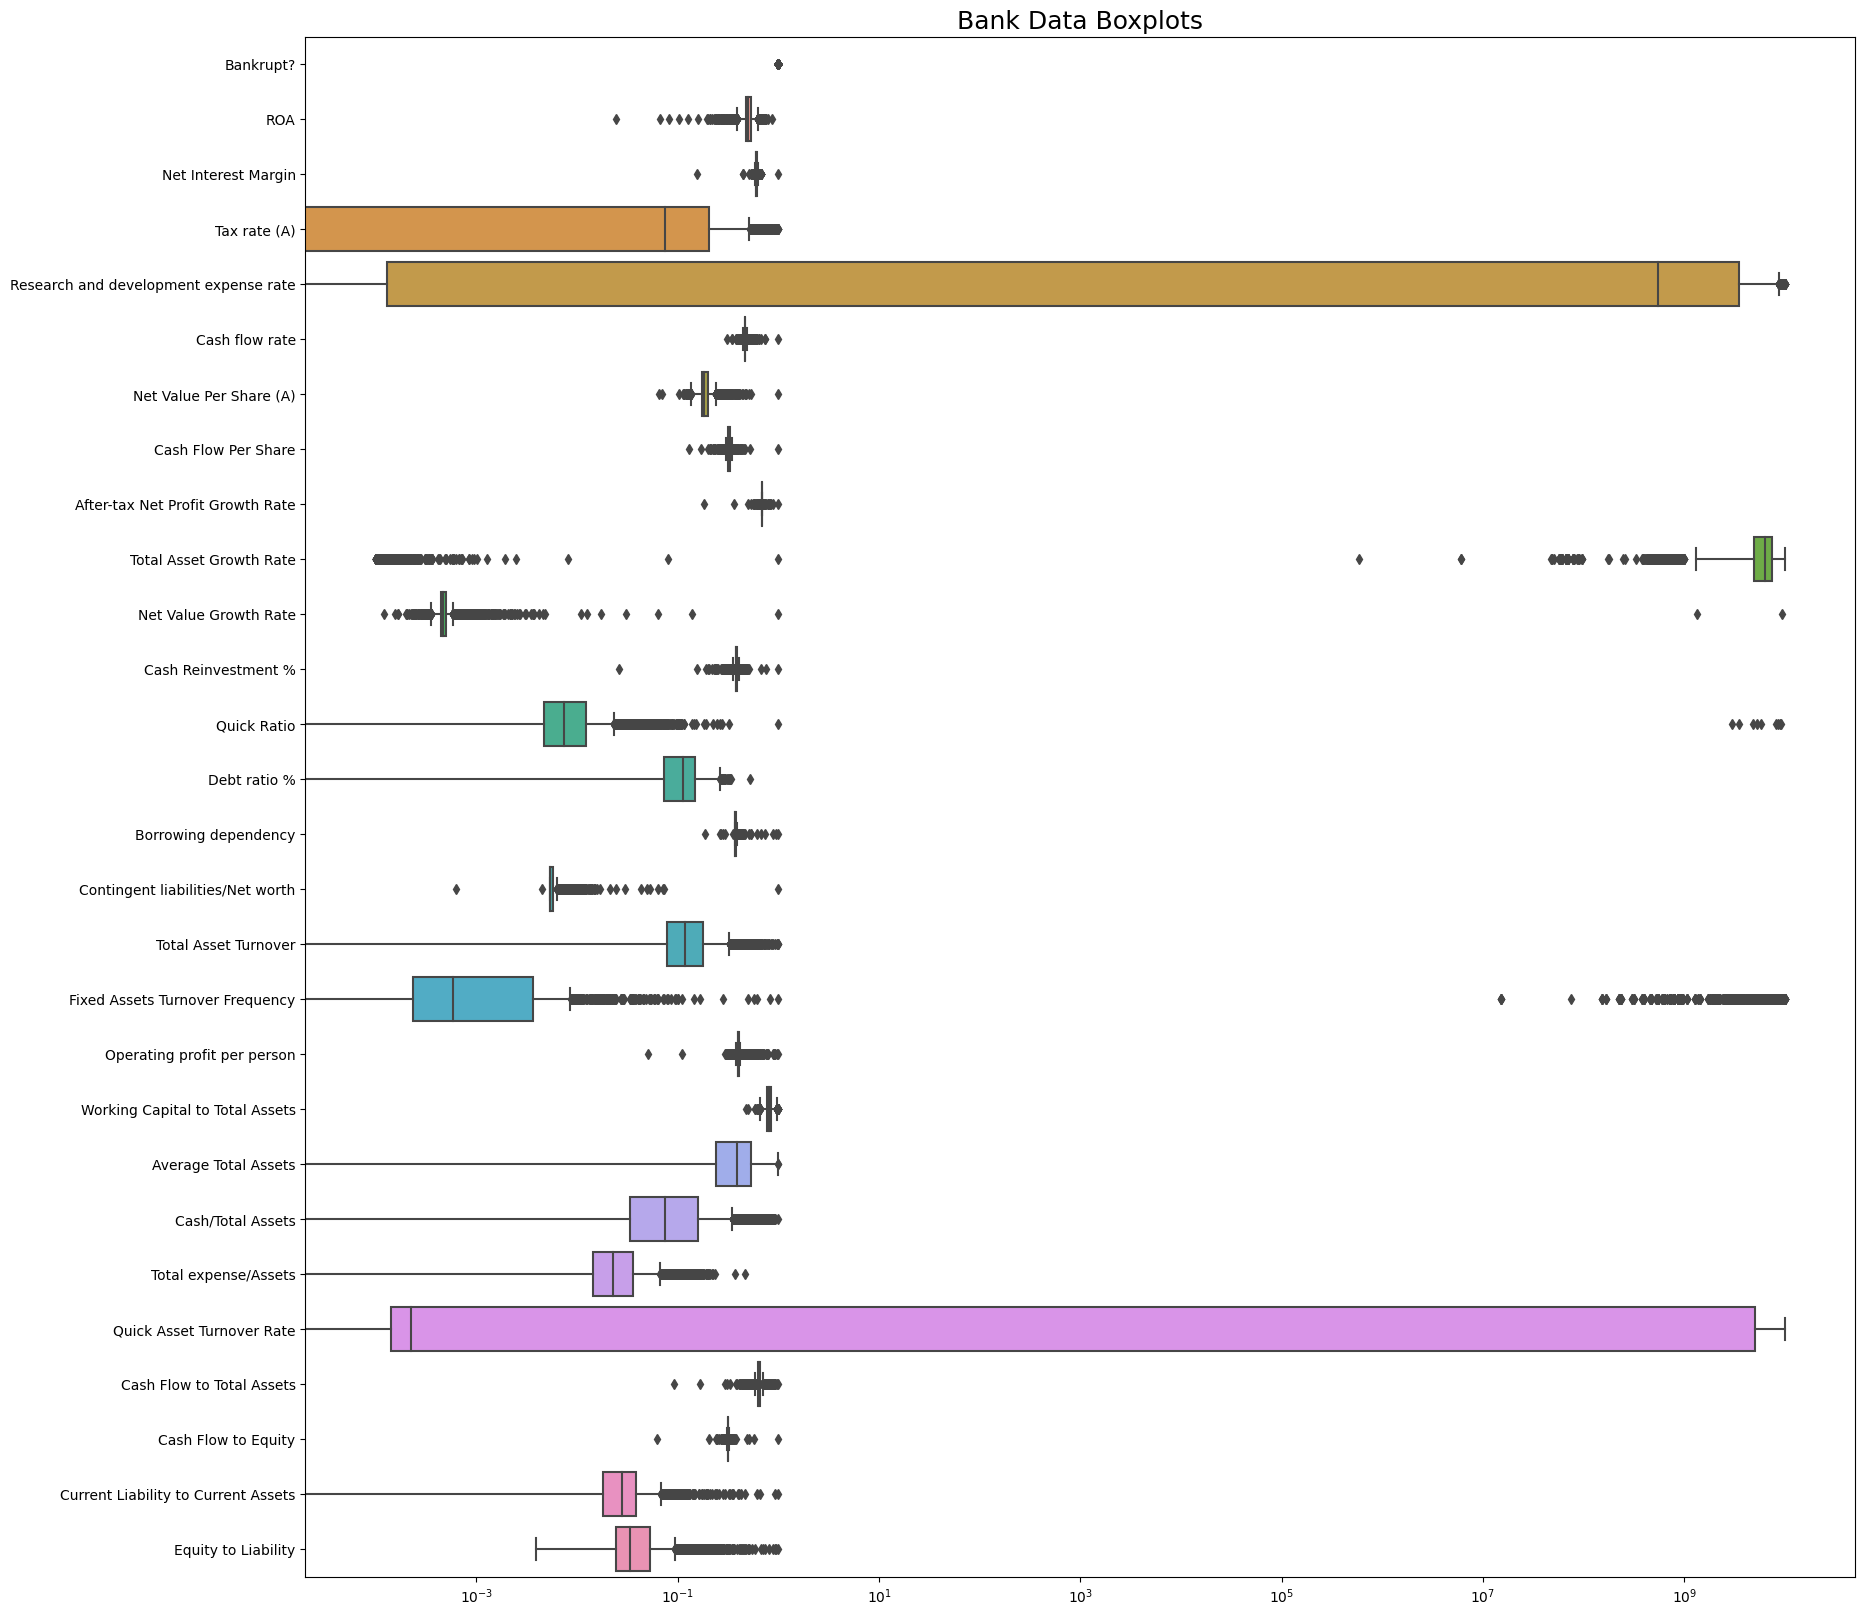

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = bank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

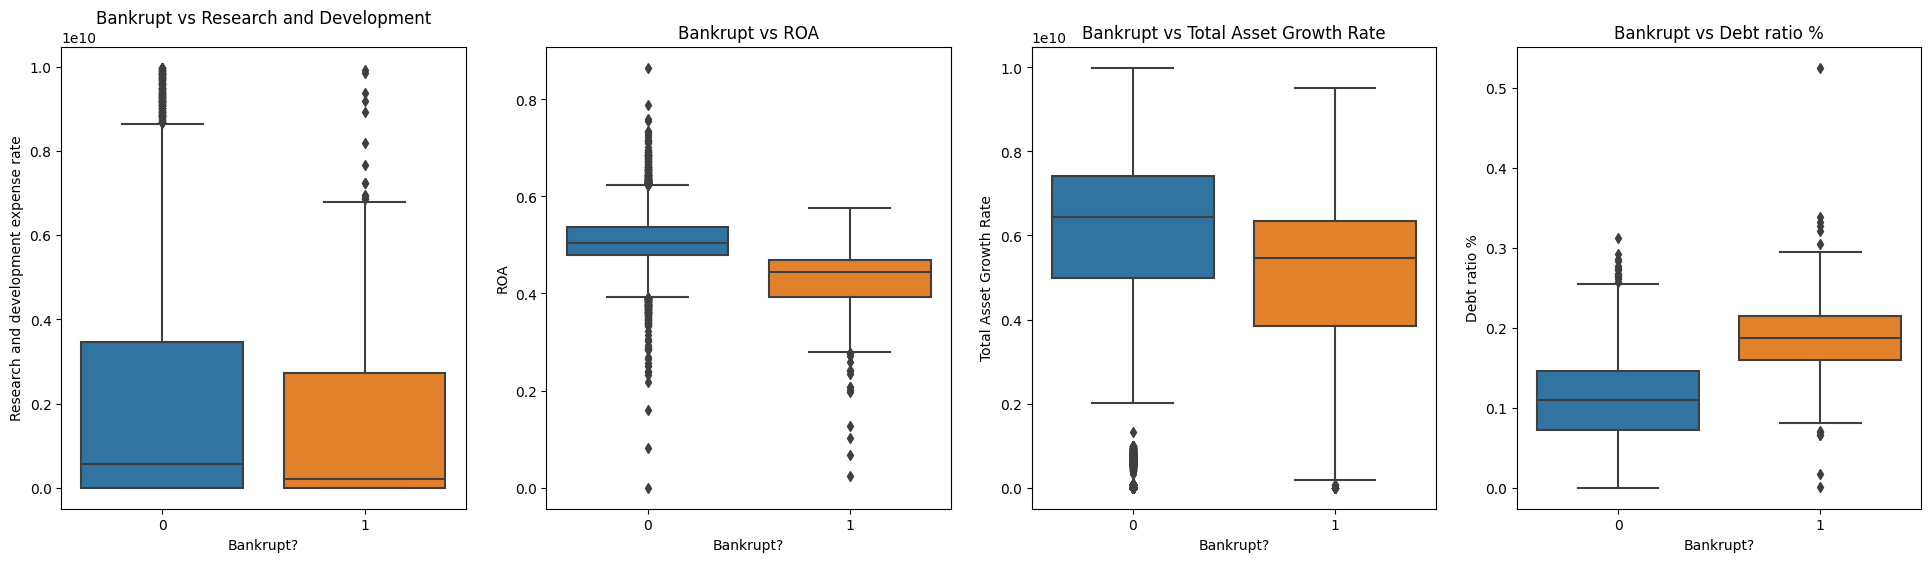

In [ ]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y="Research and development expense rate", data=bank_data, ax=axes[0])
axes[0].set_title('Bankrupt vs Research and Development')

sns.boxplot(x='Bankrupt?', y="ROA", data=bank_data, ax=axes[1])
axes[1].set_title('Bankrupt vs ROA')


sns.boxplot(x='Bankrupt?', y="Total Asset Growth Rate", data=bank_data, ax=axes[2])
axes[2].set_title('Bankrupt vs Total Asset Growth Rate')


sns.boxplot(x='Bankrupt?', y="Debt ratio %", data=bank_data, ax=axes[3])
axes[3].set_title('Bankrupt vs Debt ratio %')

plt.show()

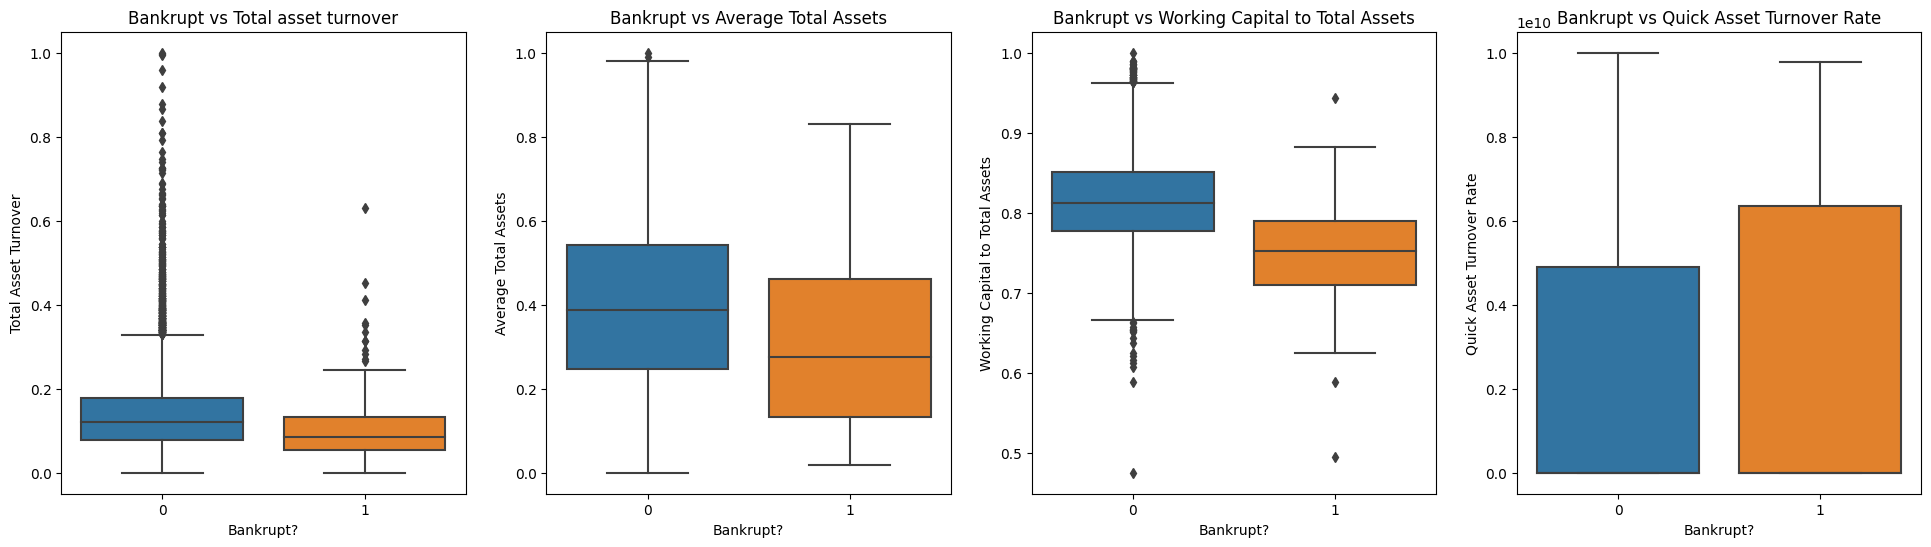

In [ ]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y="Total Asset Turnover", data=bank_data, ax=axes[0])
axes[0].set_title('Bankrupt vs Total asset turnover')

sns.boxplot(x='Bankrupt?', y="Average Total Assets", data=bank_data, ax=axes[1])
axes[1].set_title('Bankrupt vs Average Total Assets')


sns.boxplot(x='Bankrupt?', y="Working Capital to Total Assets", data=bank_data, ax=axes[2])
axes[2].set_title('Bankrupt vs Working Capital to Total Assets')


sns.boxplot(x='Bankrupt?', y="Quick Asset Turnover Rate", data=bank_data, ax=axes[3])
axes[3].set_title('Bankrupt vs Quick Asset Turnover Rate')

plt.show()

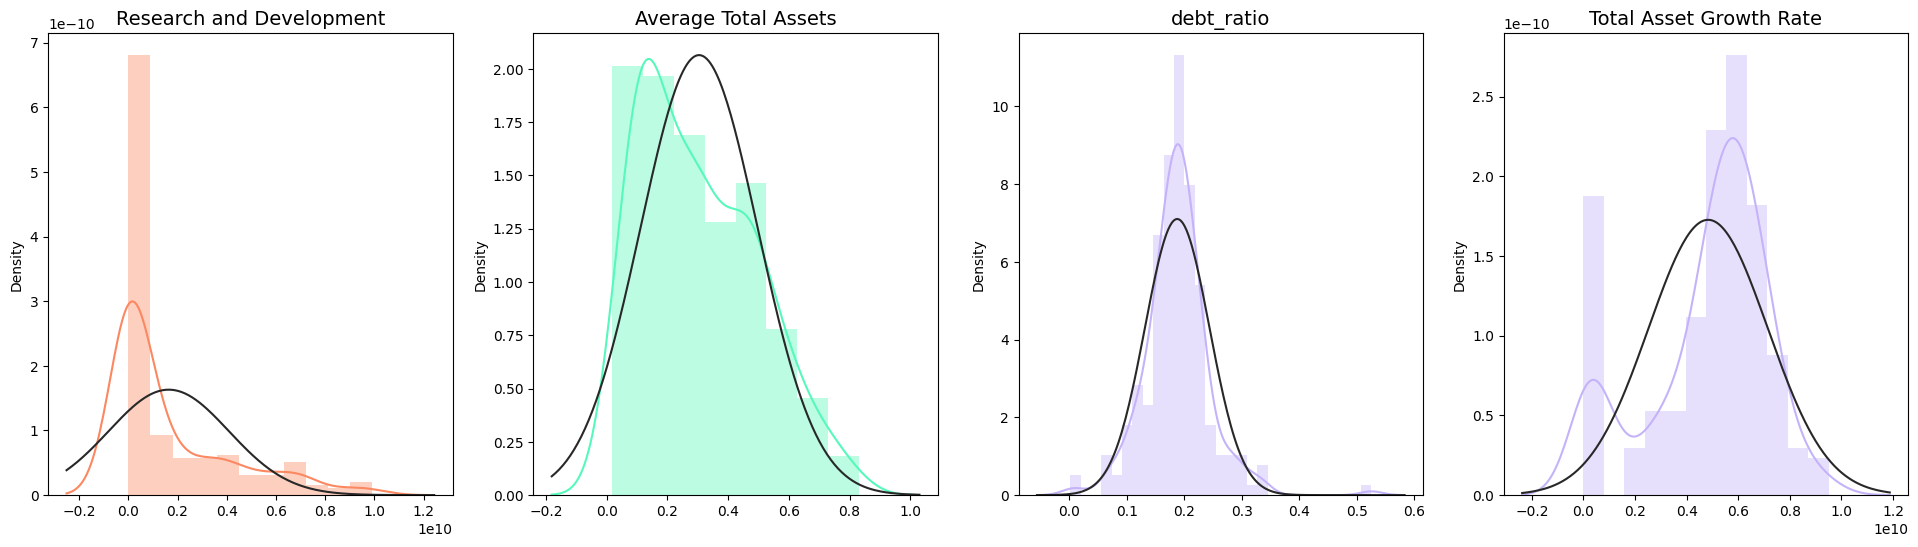

In [ ]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = bank_data['Research and development expense rate'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Research and Development', fontsize=14)

tot_debt_net = bank_data['Average Total Assets'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Average Total Assets', fontsize=14)


debt_ratio = bank_data['Debt ratio %'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio', fontsize=14)

net_worth_assets = bank_data['Total Asset Growth Rate'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Total Asset Growth Rate', fontsize=14)

plt.show()

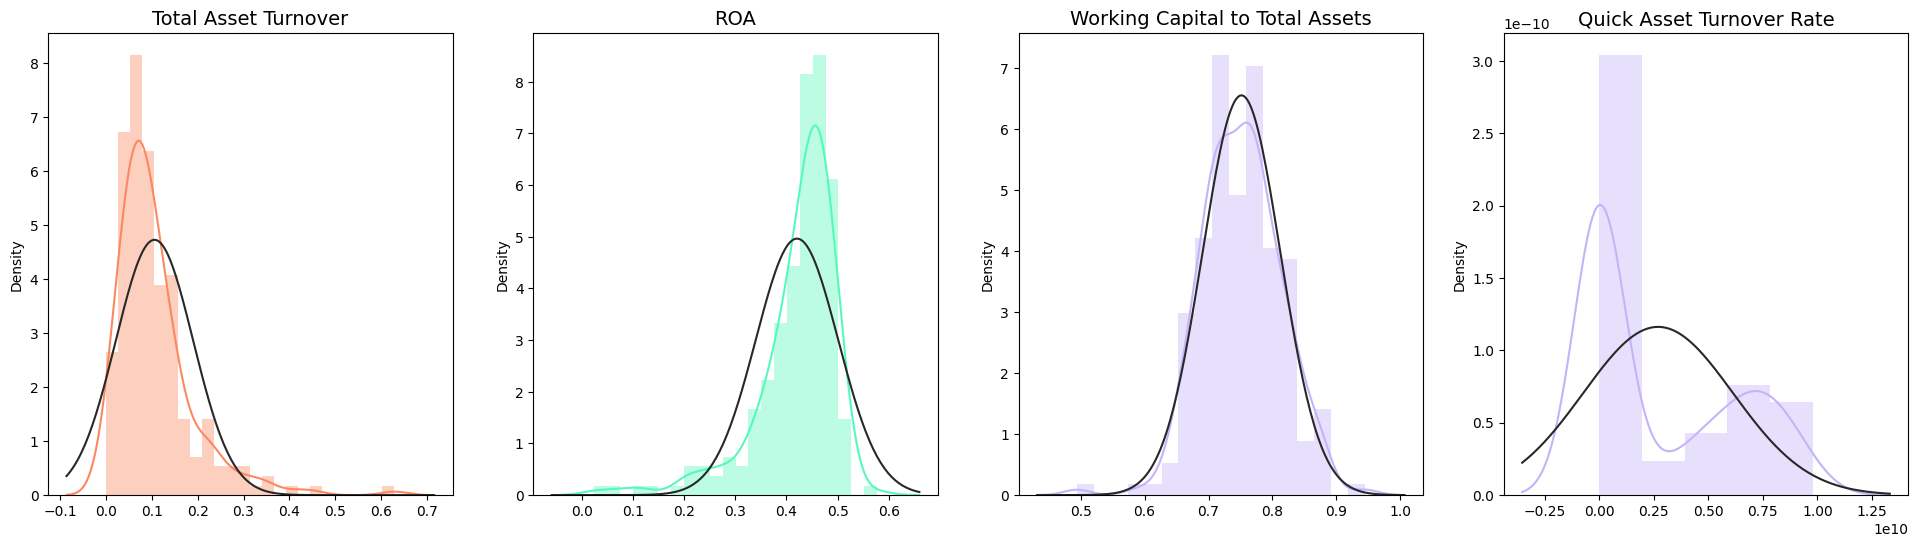

In [ ]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = bank_data['Total Asset Turnover'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Total Asset Turnover', fontsize=14)

tot_debt_net = bank_data['ROA'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('ROA', fontsize=14)


debt_ratio = bank_data['Working Capital to Total Assets'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Working Capital to Total Assets', fontsize=14)

net_worth_assets = bank_data['Quick Asset Turnover Rate'].loc[bank_data['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Quick Asset Turnover Rate', fontsize=14)

plt.show()

In [ ]:
bank_data.shape

(6746, 28)

In [ ]:
# Dividing Data and Labels

labels = bank_data['Bankrupt?']
bank_data = bank_data.drop(['Bankrupt?'], axis = 1)

In [ ]:
labels

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6746, dtype: int64

In [ ]:
def log_trans(data):

    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue

    return data

data_norm = log_trans(bank_data)

In [ ]:
data_norm

,ROA,Net Interest Margin,Tax rate (A),Research and development expense rate,Cash flow rate,Net Value Per Share (A),Cash Flow Per Share,After-tax Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,...,Operating profit per person,Working Capital to Total Assets,Average Total Assets,Cash/Total Assets,Total expense/Assets,Quick Asset Turnover Rate,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Equity to Liability
0,0.315244,0.470914,0.000000,0.000000,0.377164,0.137978,0.271297,0.524124,22.328696,0.000327,...,0.331397,0.672775,0.166673,0.004086,0.062839,22.602731,0.637555,0.272242,0.111765,0.016335
1,0.381371,0.476380,0.000000,0.000000,0.379715,0.167420,0.276219,0.524547,22.533193,0.000443,...,0.330447,0.751111,0.127236,0.014837,0.025196,22.764486,0.641100,0.273200,0.046669,0.020581
2,0.354923,0.470909,0.000000,17.054189,0.377423,0.163742,0.267812,0.524411,22.708397,0.000396,...,0.323508,0.829502,0.340201,0.000990,0.021162,0.001022,0.642765,0.273468,0.025031,0.016340
3,0.336361,0.459664,0.000000,0.000000,0.382337,0.143396,0.278899,0.524201,22.308411,0.000382,...,0.320994,0.725754,0.161575,0.018675,0.023874,22.523324,0.579039,0.264195,0.065085,0.023699
4,0.381870,0.469243,0.000000,0.000000,0.380316,0.154867,0.276997,0.524549,22.429830,0.000439,...,0.332444,0.751822,0.260330,0.014062,0.026043,22.342654,0.622374,0.271223,0.046622,0.034875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.401248,0.472784,0.107393,22.227343,0.380991,0.161307,0.278363,0.524597,22.679126,0.000450,...,0.331170,0.817769,0.312840,0.094838,0.018880,0.000124,0.639806,0.273124,0.027567,0.029452
6815,0.388768,0.468945,0.315975,21.087909,0.379790,0.166636,0.276327,0.524571,22.375763,0.000445,...,0.331908,0.793387,0.335085,0.077273,0.011057,0.000117,0.642072,0.273415,0.030985,0.037569
6816,0.387114,0.476510,0.399339,0.000104,0.386750,0.238640,0.281304,0.524256,22.513357,0.000435,...,0.331957,0.866047,0.476747,0.345634,0.034832,0.000175,0.631678,0.272583,0.007514,0.093170
6817,0.409633,0.474898,0.166610,21.643549,0.389419,0.193420,0.297563,0.528339,22.704267,0.000529,...,0.334137,0.832340,0.353624,0.106374,0.016309,0.000135,0.684857,0.277721,0.022658,0.043069


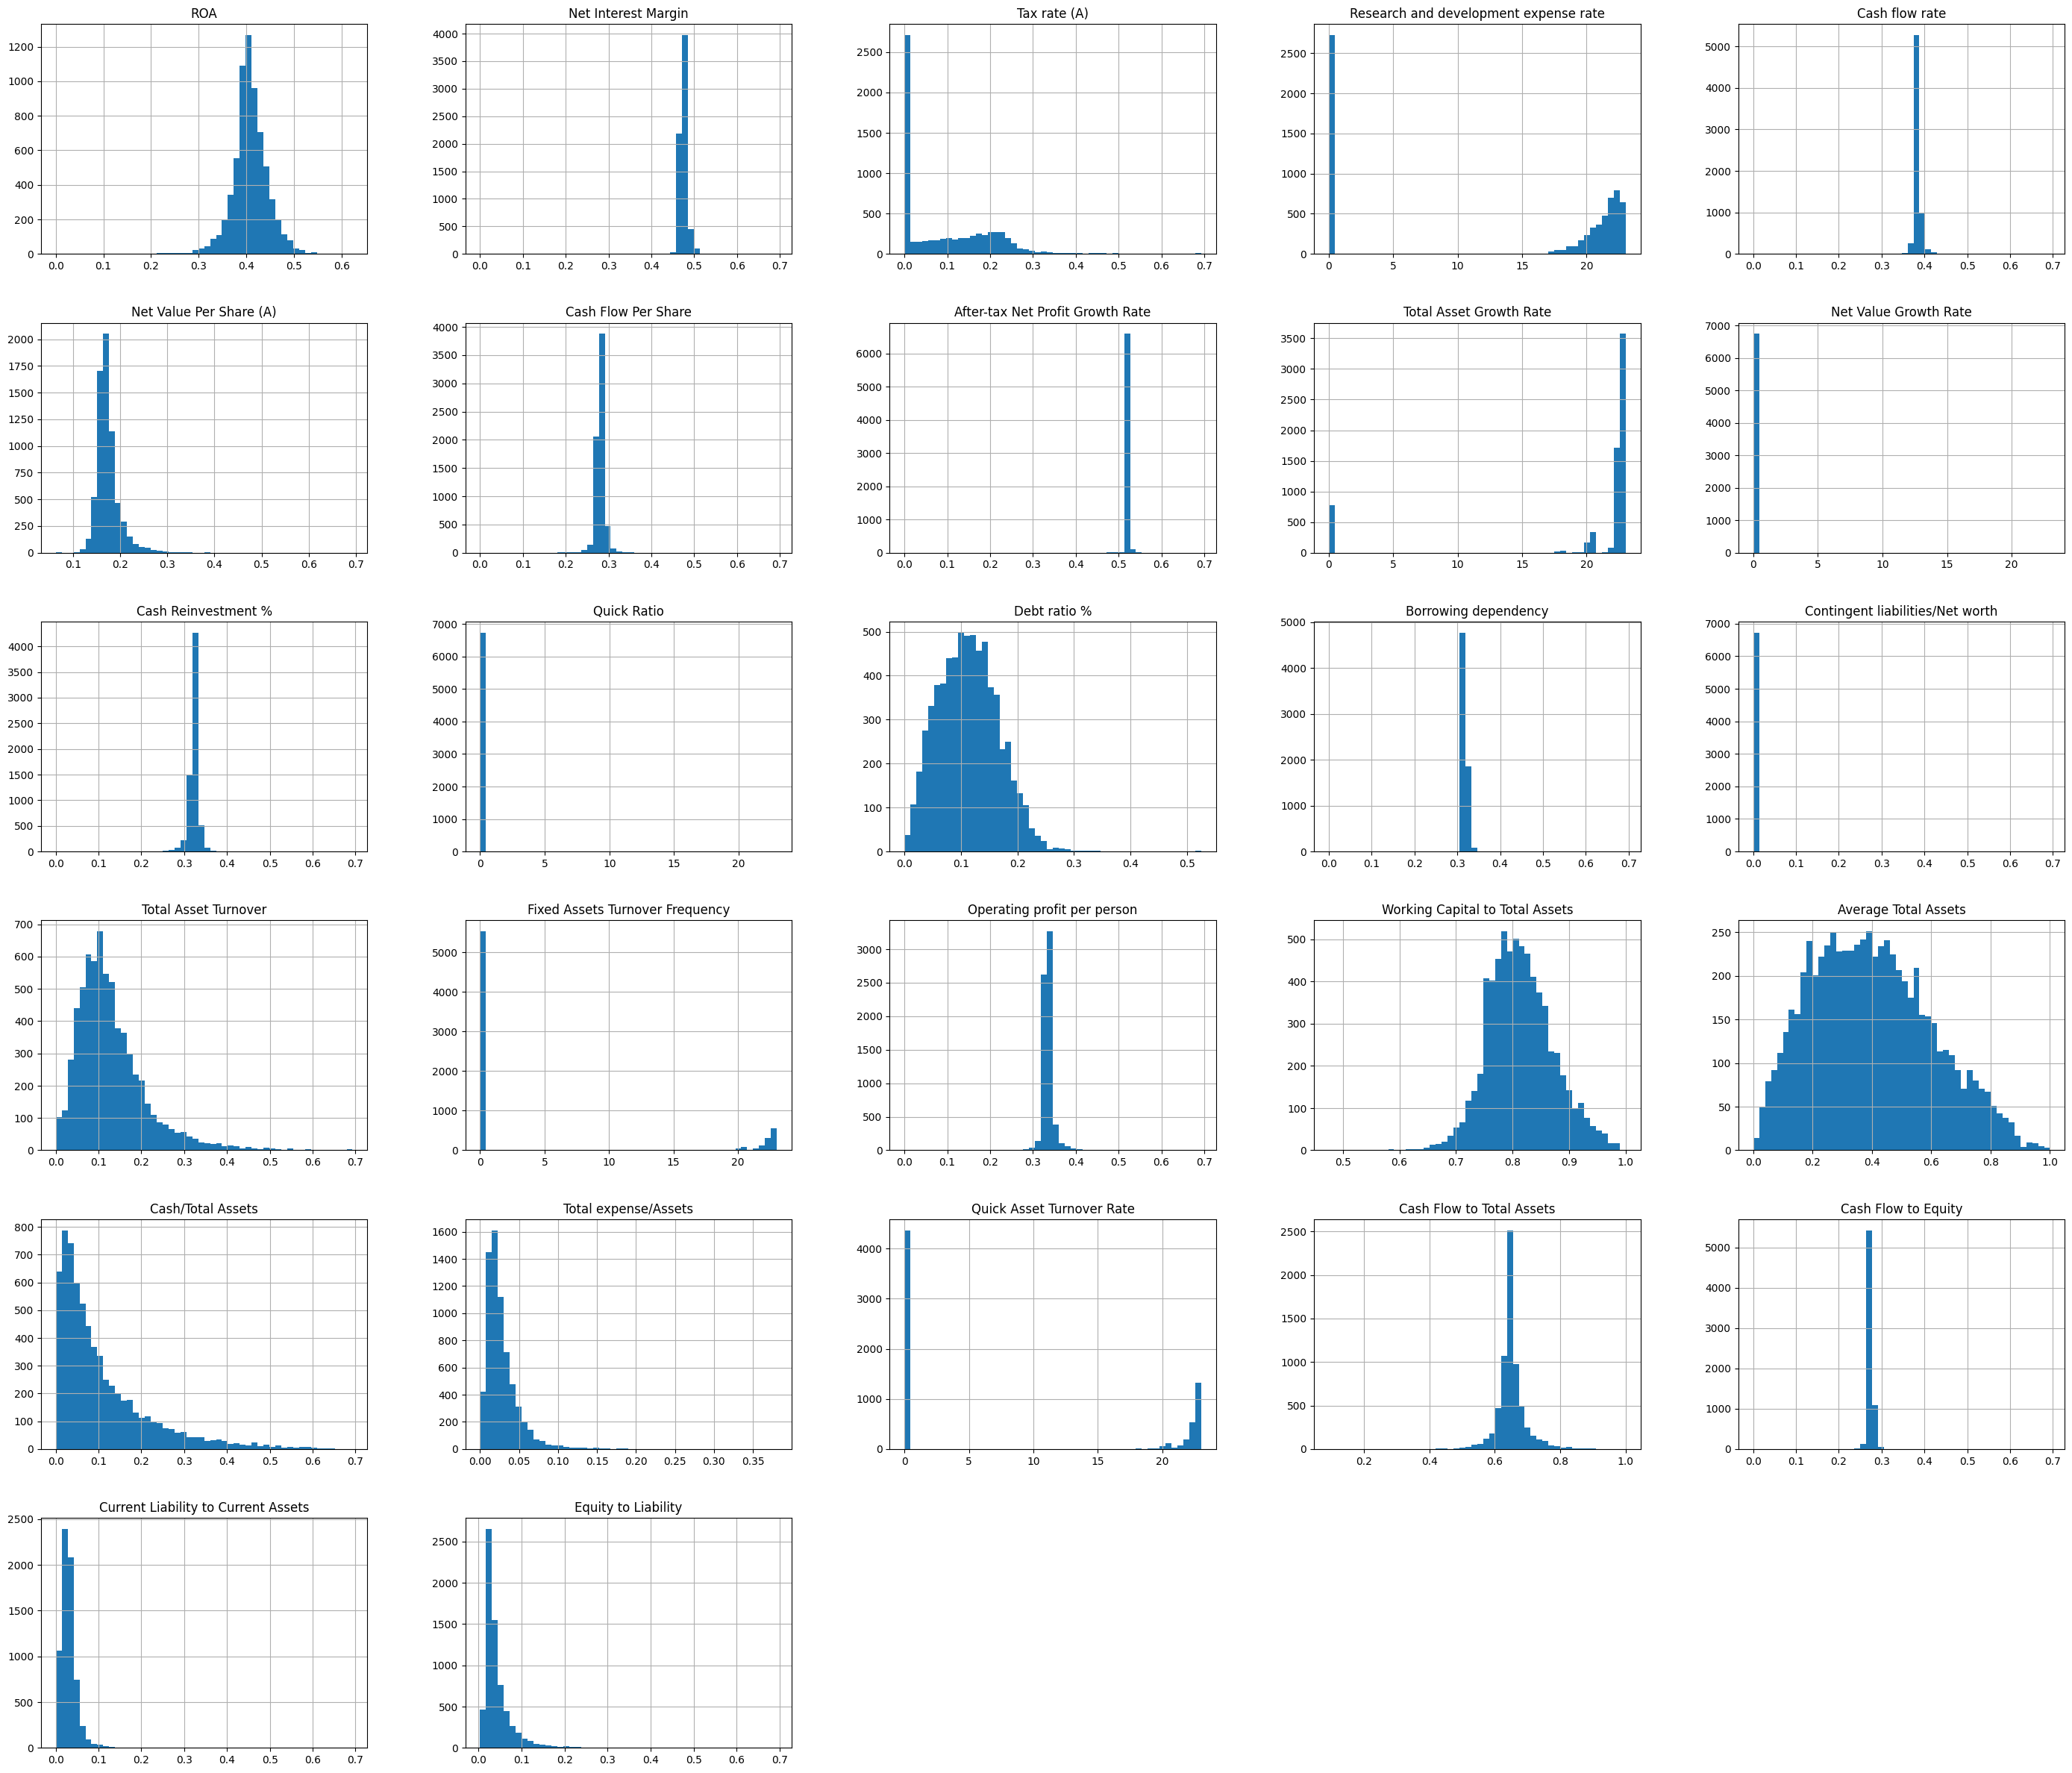

In [ ]:
data_norm.hist(figsize = (35,30),bins = 50)
plt.show()

In [ ]:
X_raw,X_test,y_raw,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)

In [ ]:
# Stratified Cross Validation Splitting

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in sss.split(X_raw,y_raw):

    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train_sm, y_val_sm = y_raw.iloc[train_index], y_raw.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [   0    1    3 ... 6067 6068 6069] Test: [   2   23   29 ... 6056 6063 6070]
Train: [   0    1    2 ... 6068 6069 6070] Test: [   6    7    9 ... 6039 6048 6055]
Train: [   0    1    2 ... 6068 6069 6070] Test: [  12   14   17 ... 6058 6059 6065]
Train: [   0    2    3 ... 6068 6069 6070] Test: [   1   15   18 ... 6047 6061 6066]
Train: [   1    2    6 ... 6065 6066 6070] Test: [   0    3    4 ... 6067 6068 6069]
------------------------------------------------------------------------------------
Label Distributions: 

[0.96829319 0.03170681]
[0.96787479 0.03212521]


In [ ]:
#Logistic Regression
accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])

    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('---' * 45)
print('')
print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))
print('')
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression (SMOTE) results:

accuracy: 0.8422829970375456
precision: 0.1478966641204017
recall: 0.810752688172043
f1: 0.2498128648805918

---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Printing the classification report

label = ['Fin.Stable', 'Fin.Unstable']
pred_reg_sm = best_est_reg.predict(X_val_sm)
print(classification_report(y_val_sm, pred_reg_sm, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.81      0.89      1175
Fin.Unstable       0.13      0.82      0.22        39

    accuracy                           0.81      1214
   macro avg       0.56      0.82      0.56      1214
weighted avg       0.96      0.81      0.87      1214



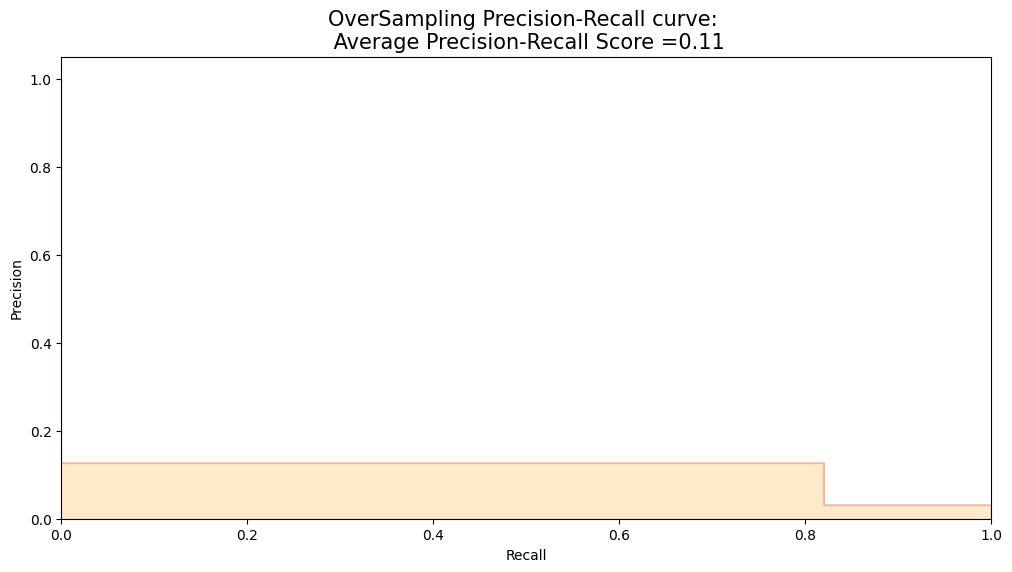

In [ ]:
# Plotting Precision-Recall curve

y_score_reg = best_est_reg.predict(X_val_sm)

average_precision = average_precision_score(y_val_sm, y_score_reg)

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_val_sm, y_score_reg)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=15)

plt.show()

In [ ]:
# List to append the score and then find the average

accuracy_lst_rfc = []
precision_lst_rfc = []
recall_lst_rfc = []
f1_lst_rfc = []
auc_lst_rfc = []

rfc_sm = RandomForestClassifier()
#rfc_params = {}
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True,False]}


rand_rfc = RandomizedSearchCV(rfc_sm, rfc_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_rfc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_rfc) # SMOTE happens during Cross Validation not before..
    model_rfc = pipeline_rfc.fit(X_train_sm, y_train_sm)
    best_est_rfc = rand_rfc.best_estimator_
    prediction_rfc = best_est_rfc.predict(X_train_sm[val])

    accuracy_lst_rfc.append(pipeline_rfc.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_rfc.append(precision_score(y_train_sm[val], prediction_rfc))
    recall_lst_rfc.append(recall_score(y_train_sm[val], prediction_rfc))
    f1_lst_rfc.append(f1_score(y_train_sm[val], prediction_rfc))
    auc_lst_rfc.append(roc_auc_score(y_train_sm[val], prediction_rfc))

print('---' * 45)
print('')
print('Random Forest results:')
print("accuracy: {}".format(np.mean(accuracy_lst_rfc)))
print("precision: {}".format(np.mean(precision_lst_rfc)))
print("recall: {}".format(np.mean(recall_lst_rfc)))
print("f1: {}".format(np.mean(f1_lst_rfc)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
smote_prediction_rfc = best_est_rfc.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_rfc, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.97      0.98      1175
Fin.Unstable       0.37      0.51      0.43        39

    accuracy                           0.96      1214
   macro avg       0.68      0.74      0.70      1214
weighted avg       0.96      0.96      0.96      1214



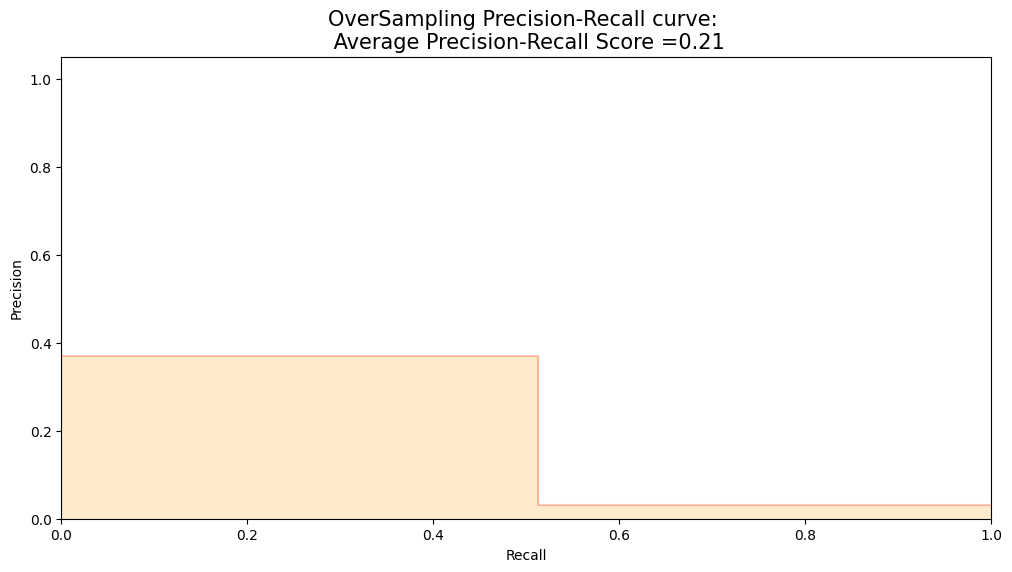

In [ ]:
# Plotting Precision-Recall curve

y_score_rfc = best_est_rfc.predict(X_val_sm)

average_precision_rfc = average_precision_score(y_val_sm, y_score_rfc)

fig = plt.figure(figsize=(12,6))

precision_rfc, recall_rfc, _ = precision_recall_curve(y_val_sm, y_score_rfc)

plt.step(recall_rfc, precision_rfc, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall_rfc, precision_rfc, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_rfc), fontsize=15)

plt.show()

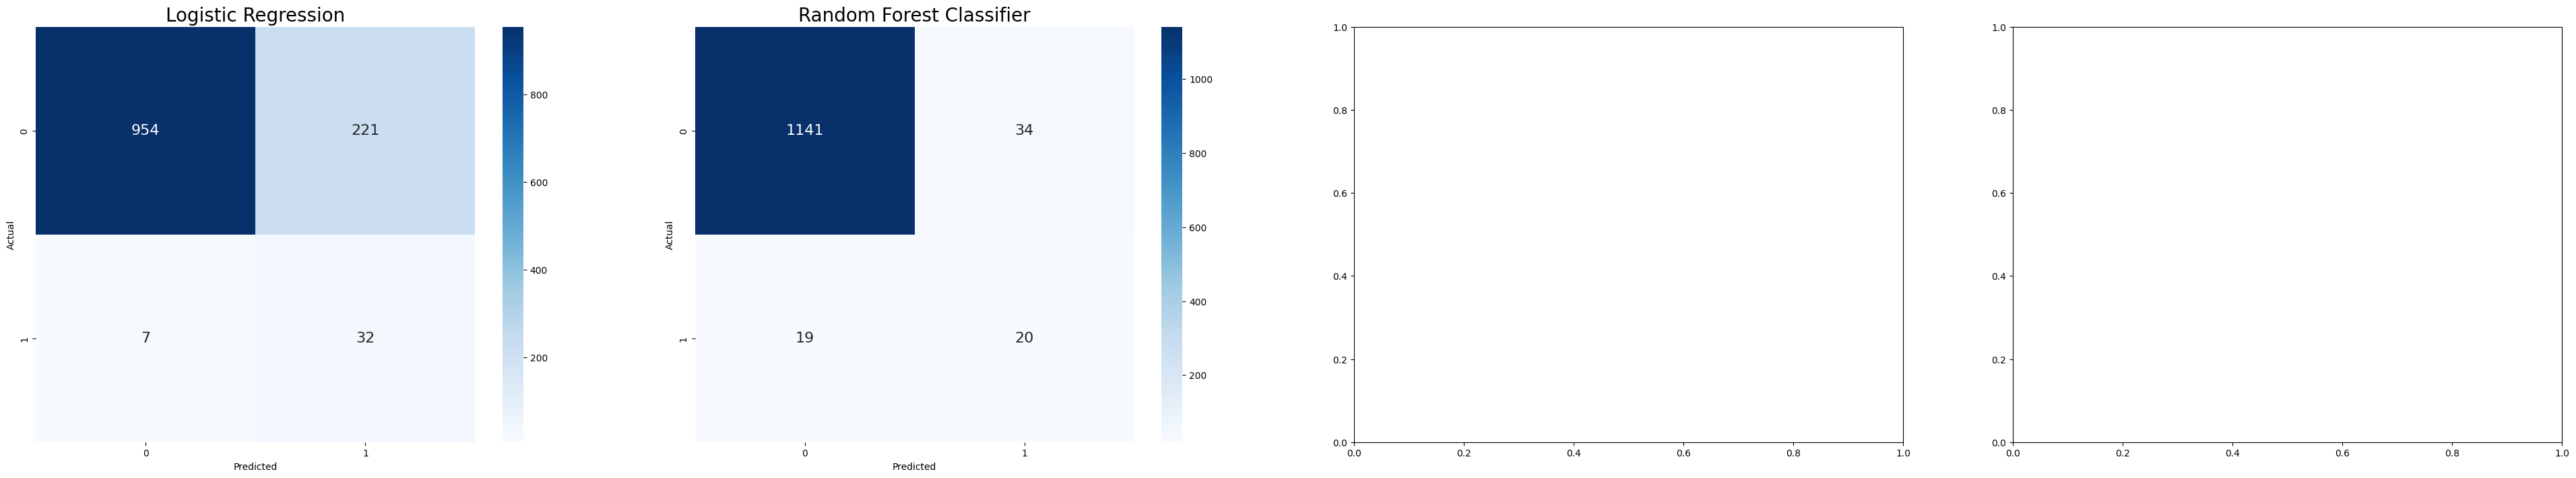

In [ ]:
# Plotting confusion matrix for each classifier

conf_mx0 = confusion_matrix(y_val_sm,pred_reg_sm)
conf_mx1 = confusion_matrix(y_val_sm,smote_prediction_rfc)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

f, ax = plt.subplots(1, 4, figsize=(20,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Logistic Regression', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('Random Forest Classifier', fontsize = 20)


plt.show()

In [ ]:
# List to append the score and then find the average

accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []

xgb_sm = xgb.XGBClassifier(random_state = 42)
xgb_params = {'eta' : [0.1,0.01,0.001],  # Learning rate
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],      # L2 regularization (higher values make model more conservative)
              'alpha' : [0,0.5,1]}        # L1 regularization (higher values make model more conservative)
              #'reg' : ['squarederror']}
              #'random_state': [42]}

rand_xgb = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_xgb = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb) # SMOTE happens during Cross Validation not before..
    model_xgb = pipeline_xgb.fit(X_train_sm, y_train_sm)
    best_est_xgb = rand_xgb.best_estimator_
    prediction_xgb = best_est_xgb.predict(X_train_sm[val])

    accuracy_lst_xgb.append(pipeline_xgb.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_xgb.append(precision_score(y_train_sm[val], prediction_xgb))
    recall_lst_xgb.append(recall_score(y_train_sm[val], prediction_xgb))
    f1_lst_xgb.append(f1_score(y_train_sm[val], prediction_xgb))
    auc_lst_xgb.append(roc_auc_score(y_train_sm[val], prediction_xgb))

print('---' * 45)
print('')
print('XGBoost results:')
print("accuracy: {}".format(np.mean(accuracy_lst_xgb)))
print("precision: {}".format(np.mean(precision_lst_xgb)))
print("recall: {}".format(np.mean(recall_lst_xgb)))
print("f1: {}".format(np.mean(f1_lst_xgb)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

XGBoost results:
accuracy: 0.9540897975444261
precision: 0.4866572190822037
recall: 0.9870967741935484
f1: 0.6191434929141986
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Printing classification report

smote_prediction_xgb = best_est_xgb.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_xgb, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.96      0.97      1175
Fin.Unstable       0.32      0.62      0.42        39

    accuracy                           0.94      1214
   macro avg       0.65      0.79      0.69      1214
weighted avg       0.97      0.94      0.95      1214



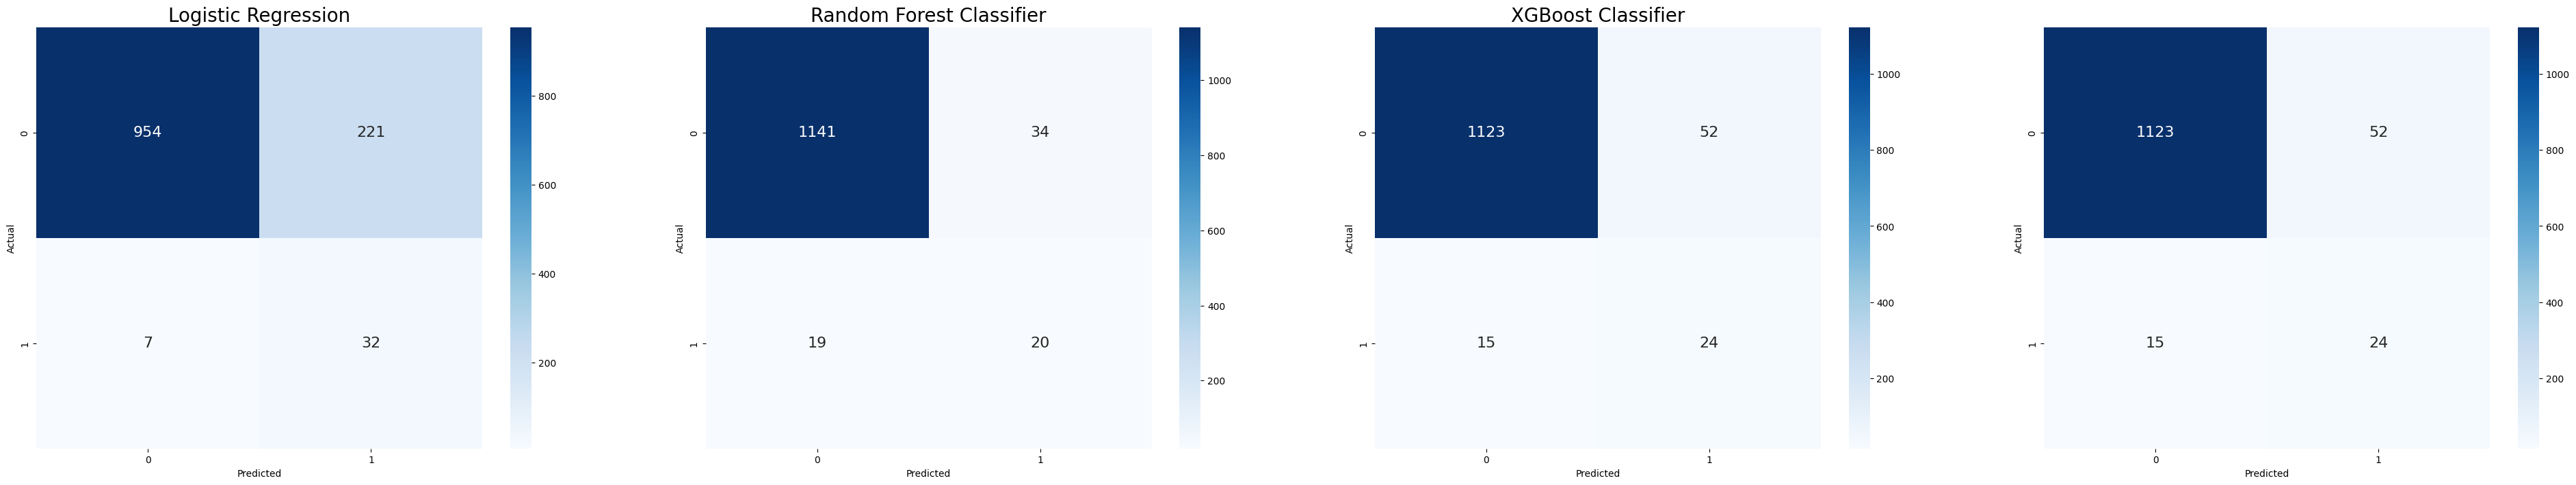

In [ ]:
# Plotting confusion matrix for each classifier

conf_mx0 = confusion_matrix(y_val_sm,pred_reg_sm)
conf_mx1 = confusion_matrix(y_val_sm,smote_prediction_rfc)
conf_mx2 = confusion_matrix(y_val_sm,smote_prediction_xgb)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

heat_cm3 = pd.DataFrame(conf_mx2, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm3.index.name = 'Actual'
heat_cm3.columns.name = 'Predicted'

f, ax = plt.subplots(1, 4, figsize=(20,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Logistic Regression', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('Random Forest Classifier', fontsize = 20)
sns.heatmap(heat_cm3, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2])
ax[2].set_title('XGBoost Classifier', fontsize = 20)
sns.heatmap(heat_cm3, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[3])

plt.show()